In [23]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt


DataSet_path = "./Dataset/MES_data_0408/*.xlsx"
excel_data = glob.glob(DataSet_path)
data_dict = {}
downtime_list = [
                "2022-04-06 12:00:00",
                "2022-04-06 15:00:00"
                ]
#timewritten
#timegenerated
df = pd.read_excel(excel_data[1],index_col="recordtime").fillna(method="ffill")
machinename_list = df.pivot_table(columns=['machinename'], aggfunc='size')
for mach_name in machinename_list.index:  
    tmp_df = df[df["machinename"]==mach_name]
    tmp_df.index = pd.to_datetime(tmp_df.index)
    tmp_df = tmp_df.resample("h").mean().fillna(method="ffill")
    #df["C_anomaly_label"] = df["Disk (0 C:) - Current Disk Queue Length"].apply(lambda x: 1 if x > 3 else 0)
    tmp_df["downtime_label"] = 0
    tmp_df.loc[downtime_list,"downtime_label"] = 1
    print(tmp_df.head(5))
    data_dict[mach_name] = tmp_df
    


data_dict

                     mem_usage_mb  cpu_usage  downtime_label
recordtime                                                  
2022-04-06 00:00:00     38.940058   0.104046               0
2022-04-06 01:00:00     39.010982   0.104046               0
2022-04-06 02:00:00     38.942299   0.000000               0
2022-04-06 03:00:00     38.597272   0.000000               0
2022-04-06 04:00:00     39.341474   0.277457               0
                     mem_usage_mb  cpu_usage  downtime_label
recordtime                                                  
2022-04-06 00:00:00     45.102098   0.125874               0
2022-04-06 01:00:00     45.118042   0.041958               0
2022-04-06 02:00:00     45.416478   0.169014               0
2022-04-06 03:00:00     45.543663   0.338028               0
2022-04-06 04:00:00     45.090488   0.167247               0
                     mem_usage_mb  cpu_usage  downtime_label
recordtime                                                  
2022-04-06 00:00:00     

{'TWKHH01CMCAPW1V':                      mem_usage_mb  cpu_usage  downtime_label
 recordtime                                                  
 2022-04-06 00:00:00     38.940058   0.104046               0
 2022-04-06 01:00:00     39.010982   0.104046               0
 2022-04-06 02:00:00     38.942299   0.000000               0
 2022-04-06 03:00:00     38.597272   0.000000               0
 2022-04-06 04:00:00     39.341474   0.277457               0
 2022-04-06 05:00:00     39.370581   0.034884               0
 2022-04-06 06:00:00     39.152230   0.046154               0
 2022-04-06 07:00:00     39.206358   0.069364               0
 2022-04-06 08:00:00     39.169538   0.173410               0
 2022-04-06 09:00:00     39.169538   0.173410               0
 2022-04-06 10:00:00     39.634594   0.174419               0
 2022-04-06 11:00:00     39.354138   0.000000               0
 2022-04-06 12:00:00     39.788844   0.693642               1
 2022-04-06 13:00:00     40.178642   0.115607      

In [9]:
data_dict[]

TWKHH01CMCAPW1V
TWKHH01CMCAPW2V
TWKHH01CMCAPW3V
TWKHH01CMCIPW1V
TWKHH01CMCIPW2V
TWKHH01CMMWPW1V
TWKHH01CMMWPW2V
TWKHH01CMPOPW1V
TWKHH01CMPOPW2V
TWKHH01CMPOPW3V
TWKHH01CMPOPW4V
TWKHH01CMPOPW5V
TWKHH01CMPOPW6V
TWKHH01CMPOPW7V
TWKHH01CMPOPW8V
TWKHH01CMPRPW1V
TWKHH01CMPRPW2V
TWKHH01CMWAPW1V
TWKHH01CMWAPW2V
TWKHH01CMWAPW3V
TWKHH01CMWAPW4V
TWKHH01CMWAPW5V
TWKHH01CMWAPW6V
TWKHH01CMWAPW7V
TWKHH01CMWAPW8V


In [33]:
df[df["downtime_label"]==1].index

DatetimeIndex(['2022-04-06 12:00:00', '2022-04-06 15:00:00'], dtype='datetime64[ns]', name='recordtime', freq='3H')

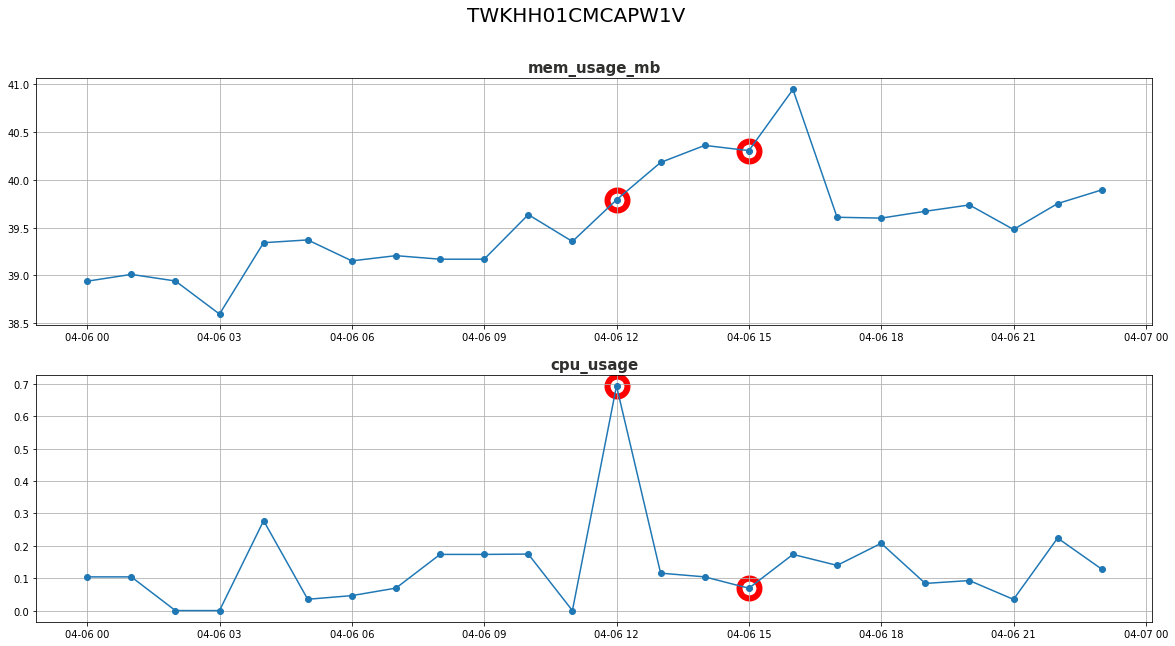

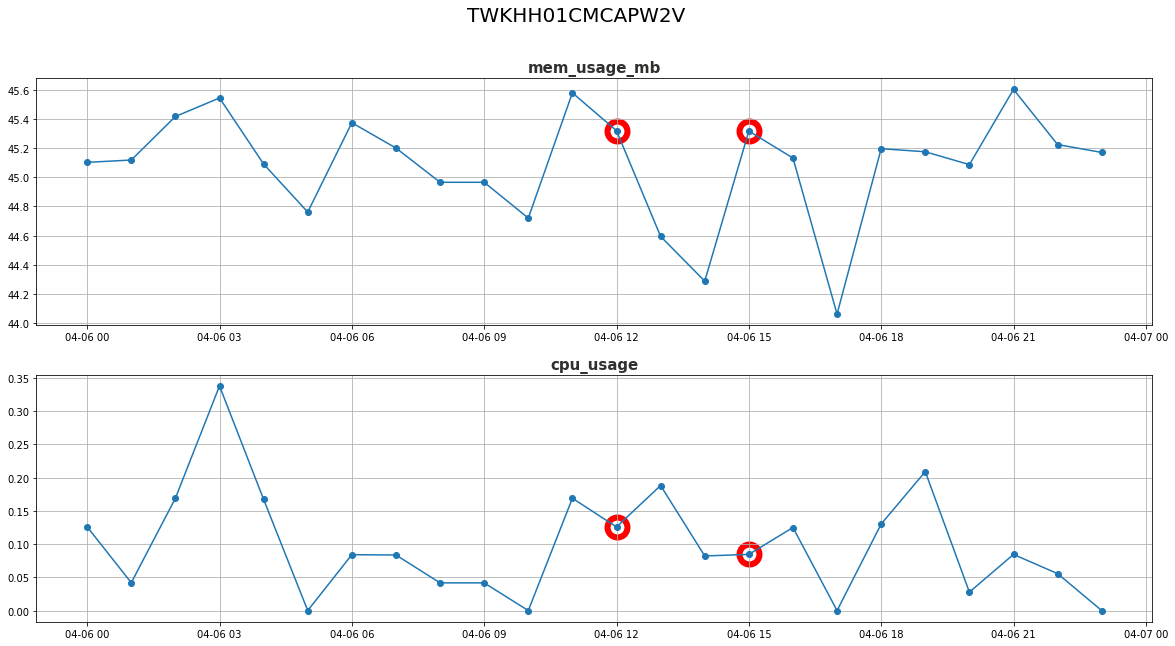

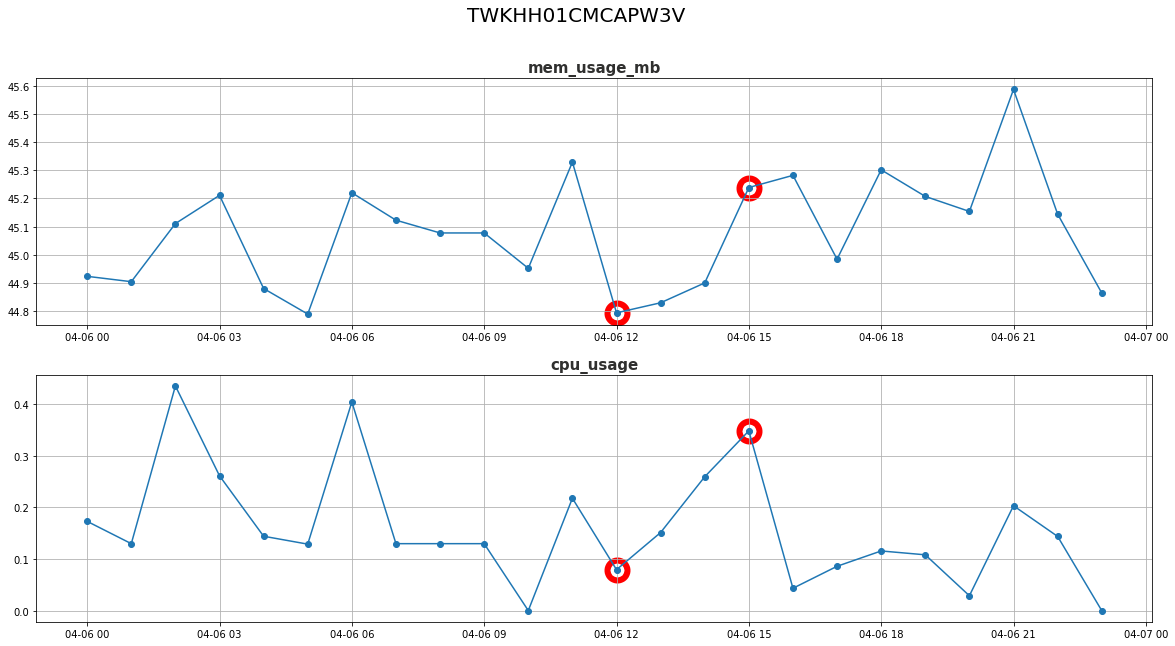

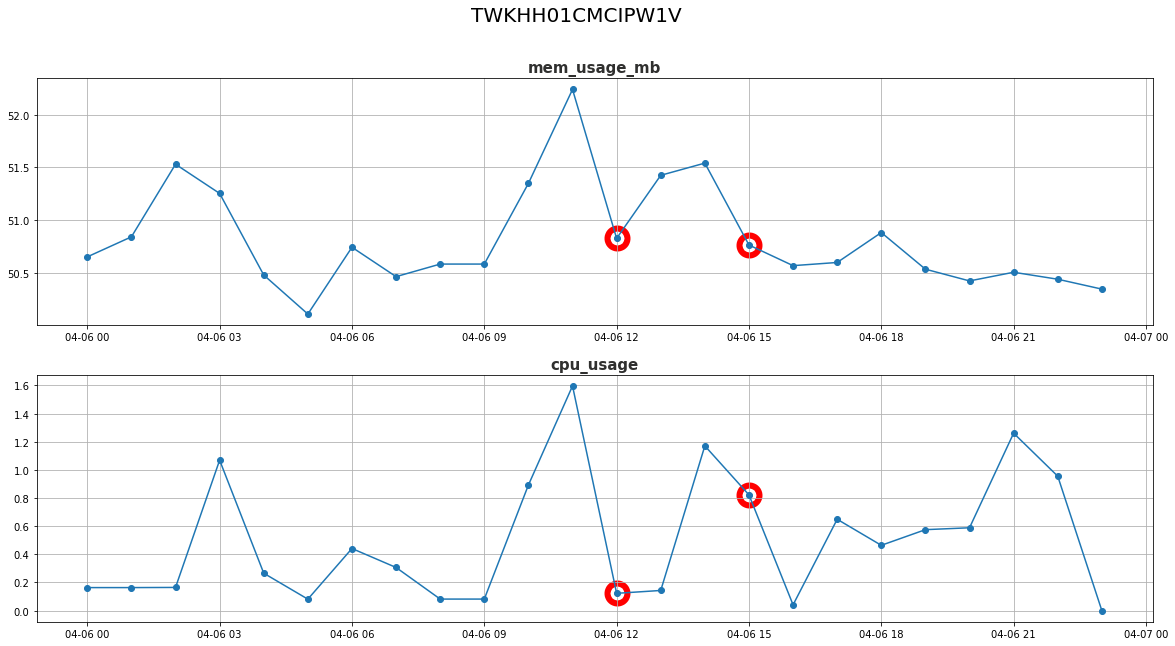

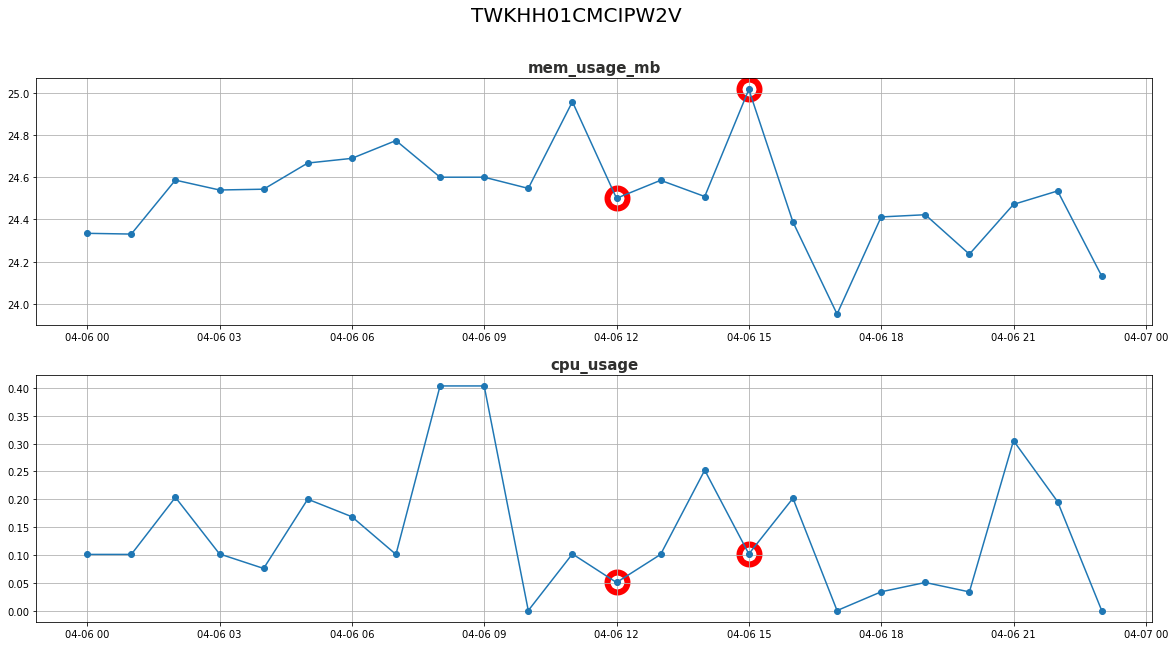

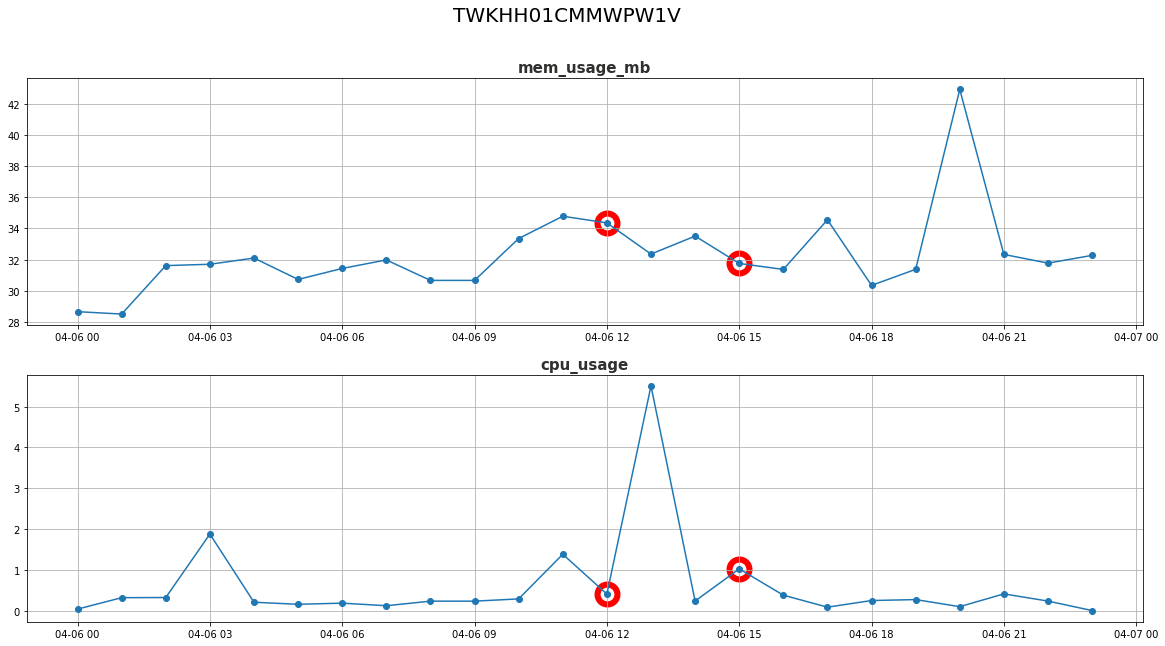

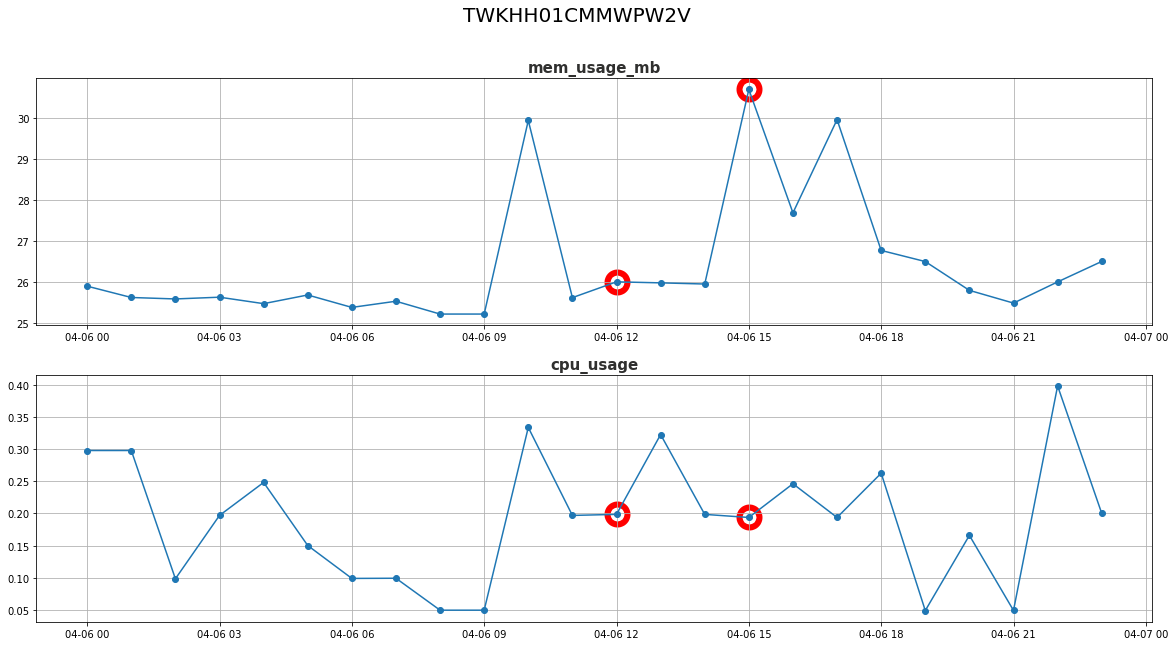

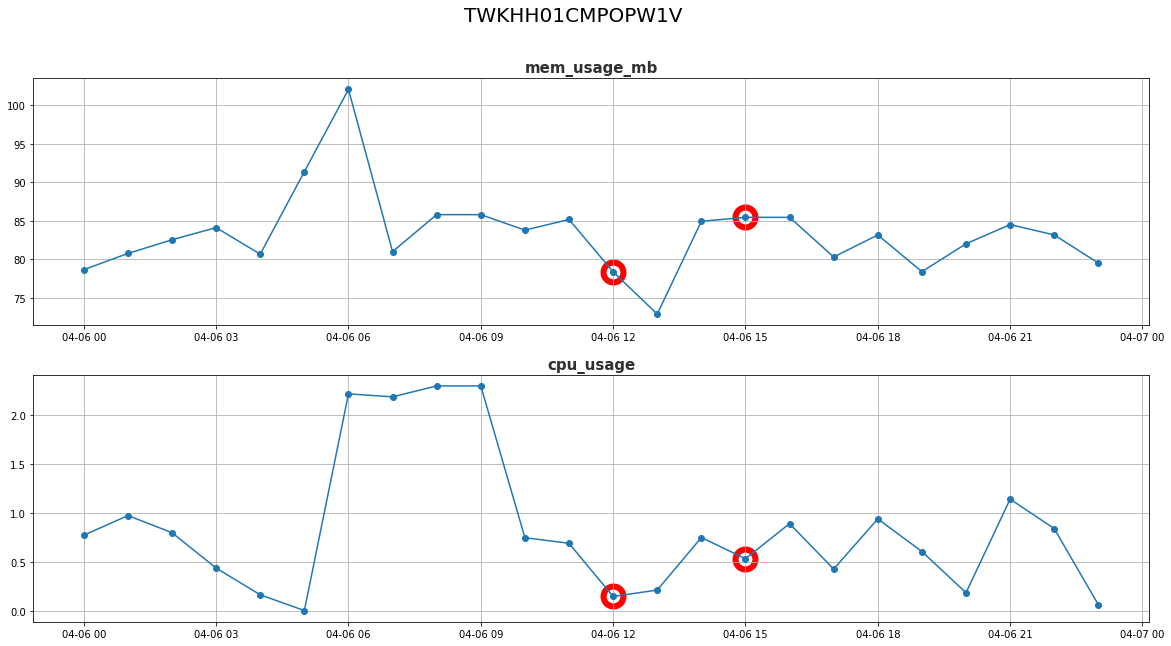

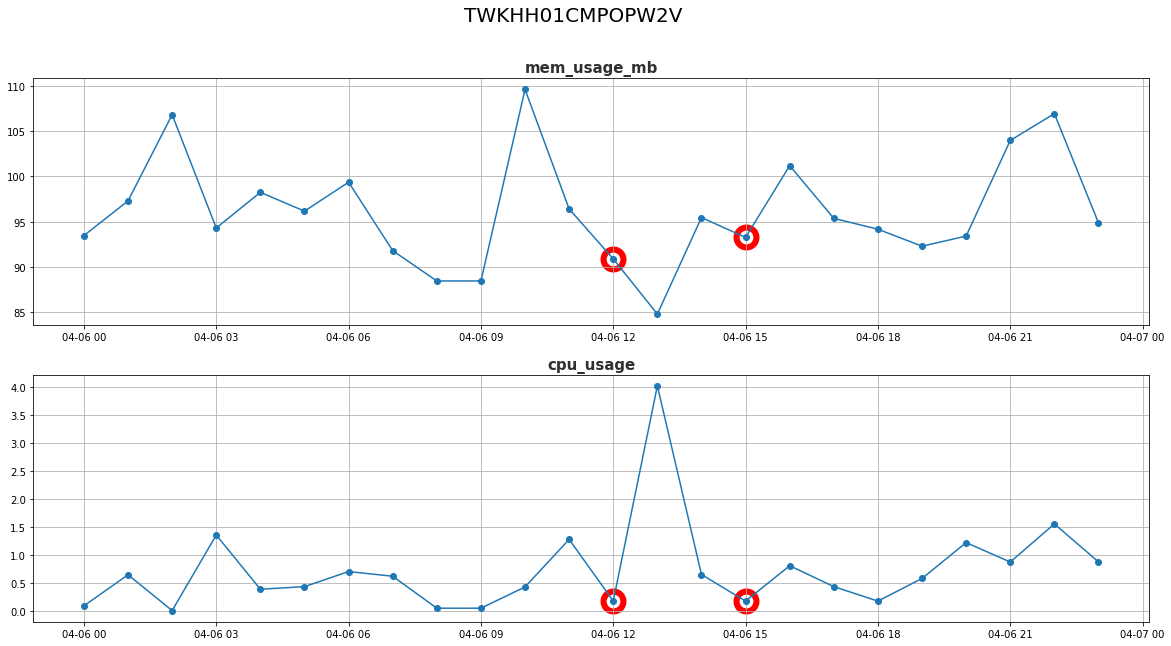

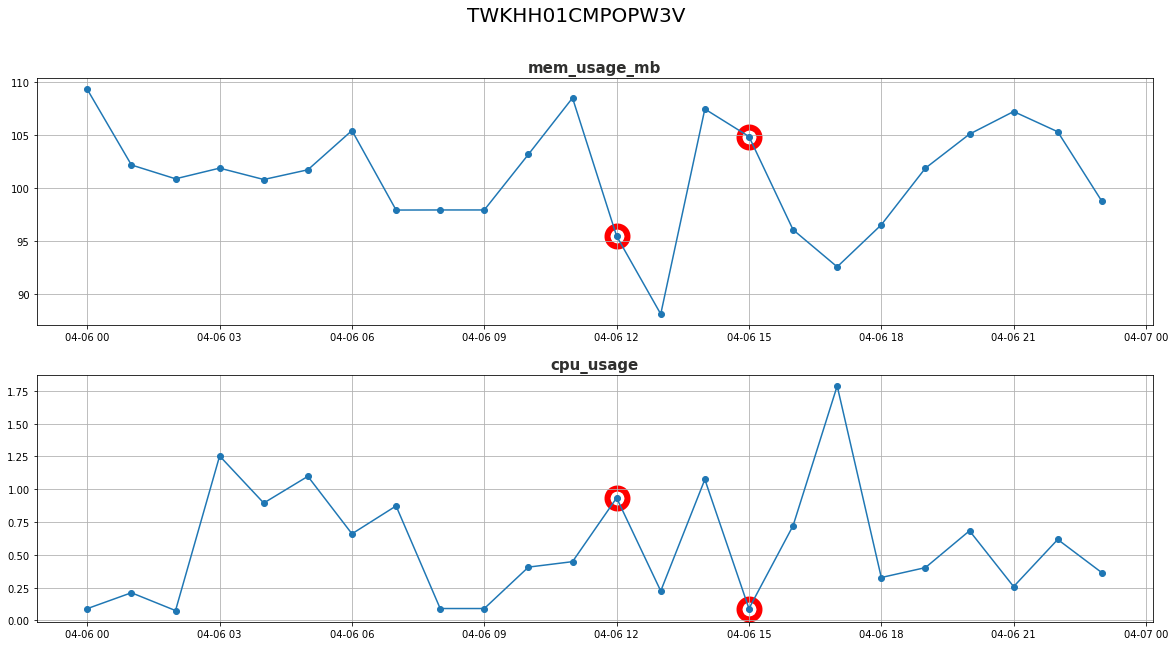

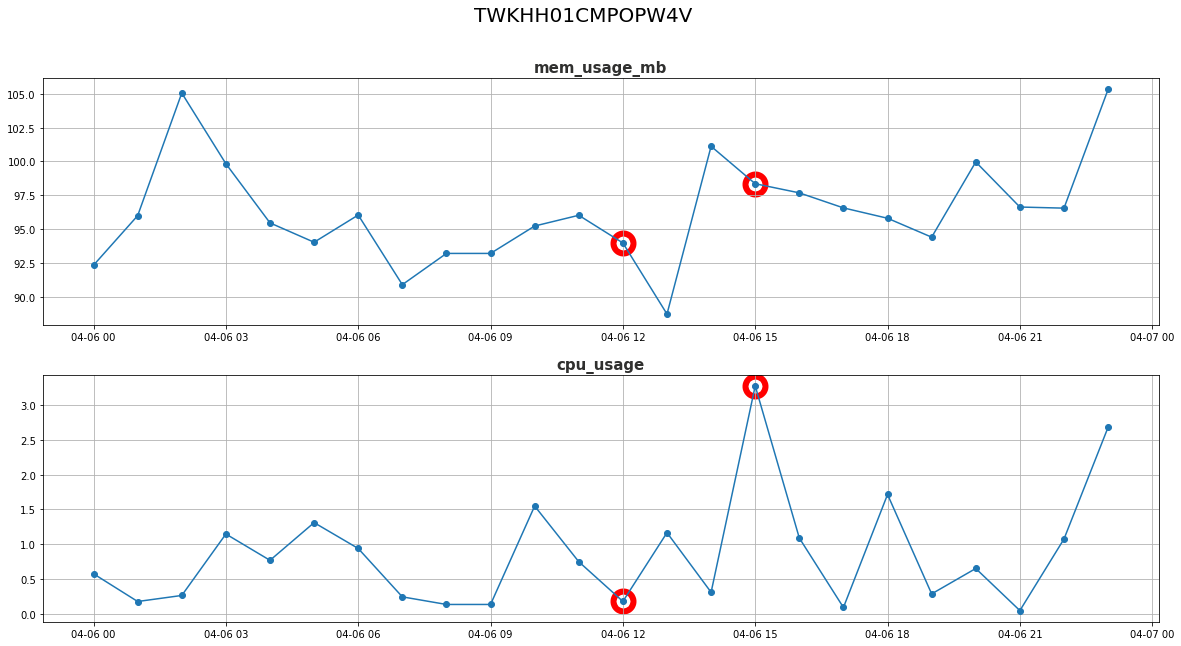

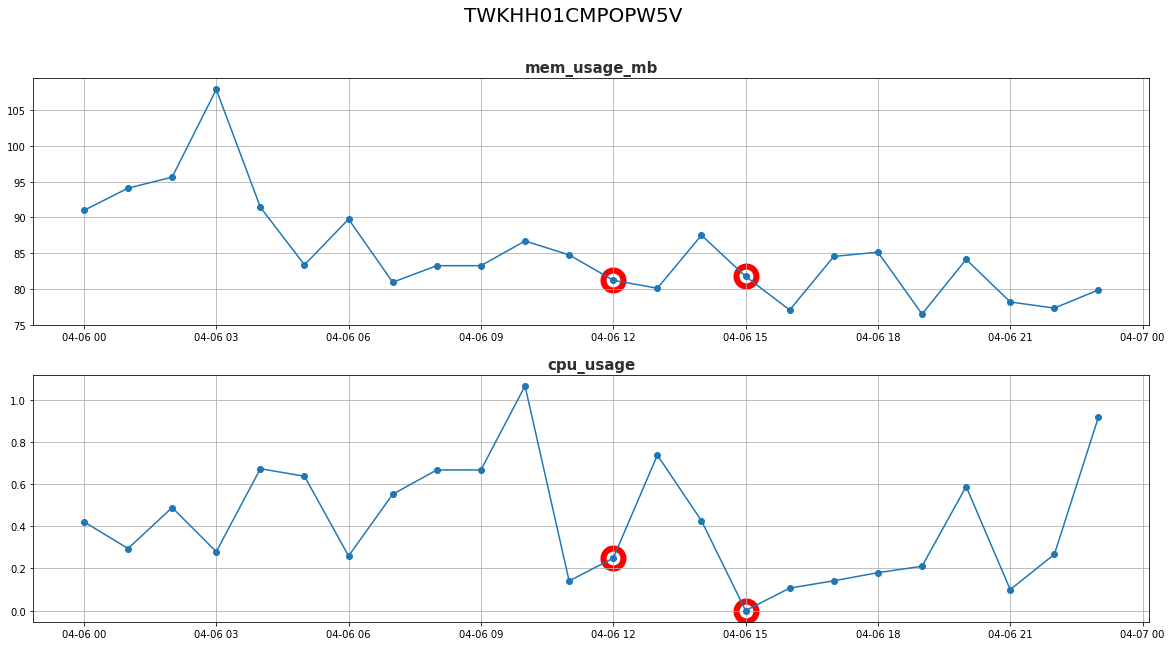

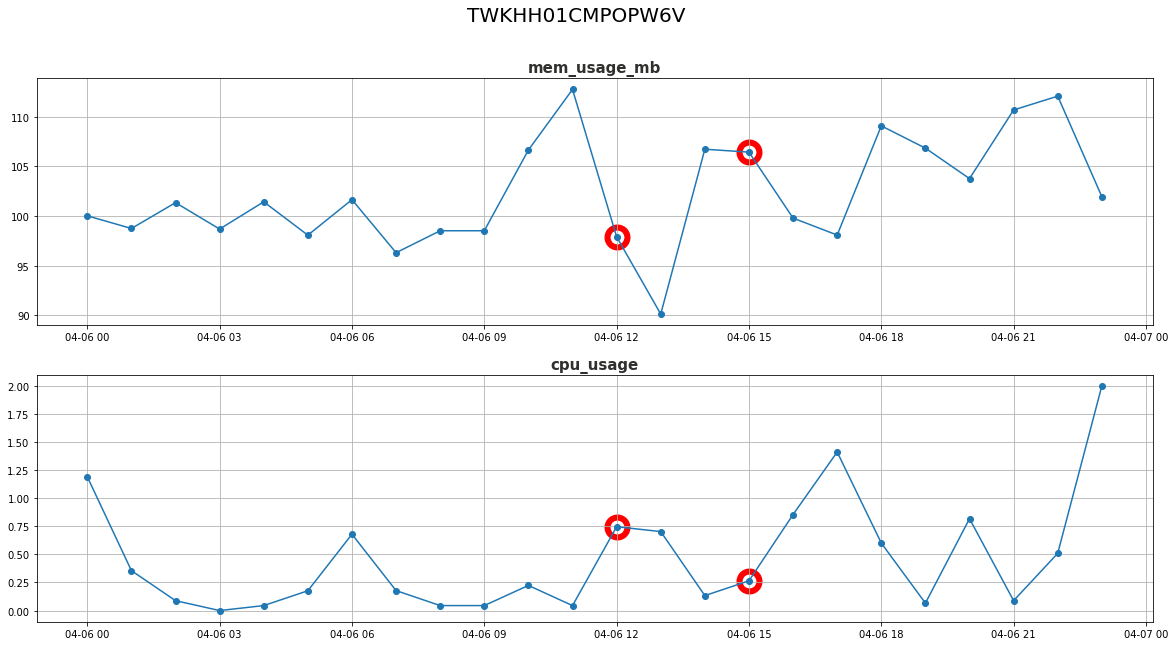

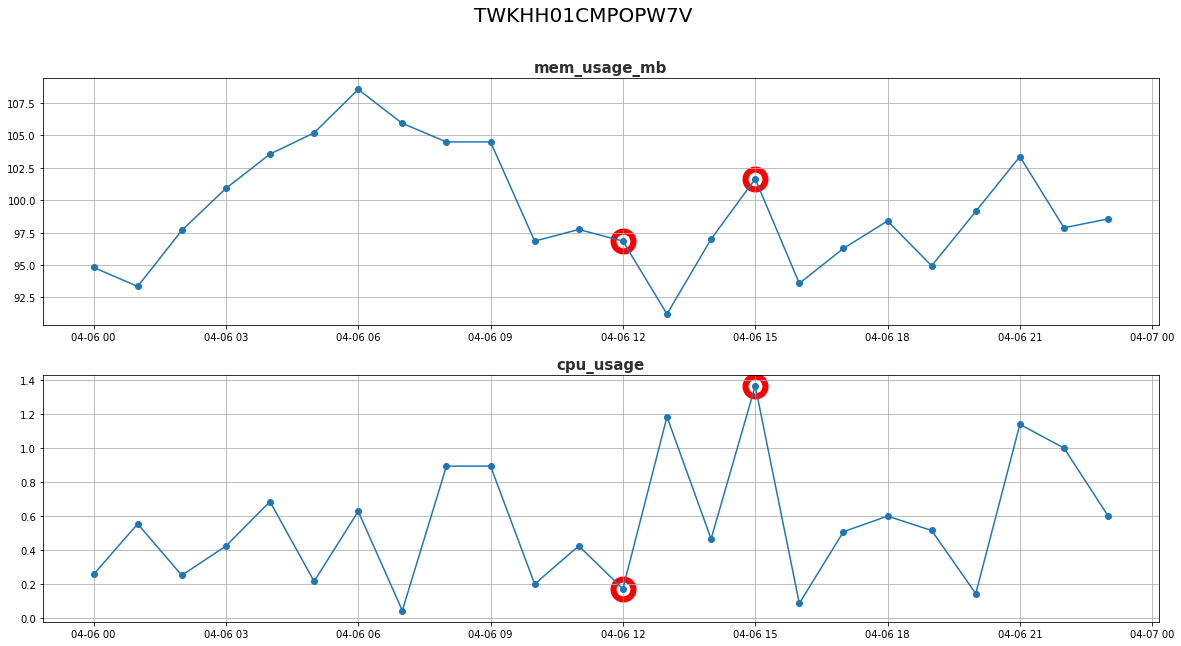

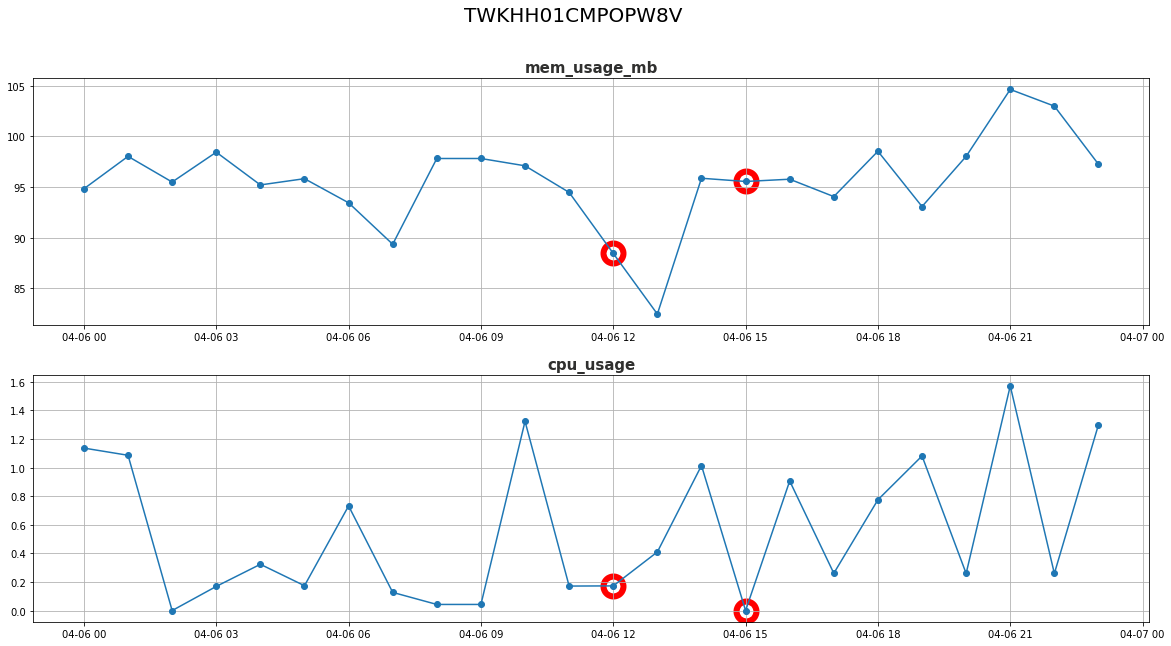

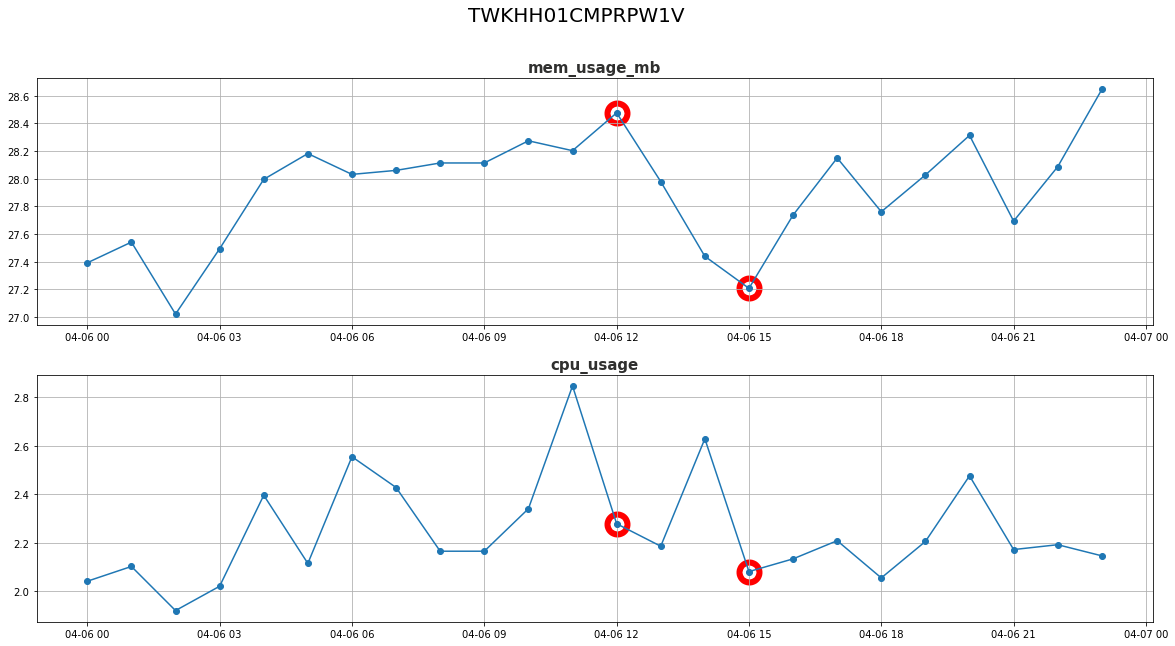

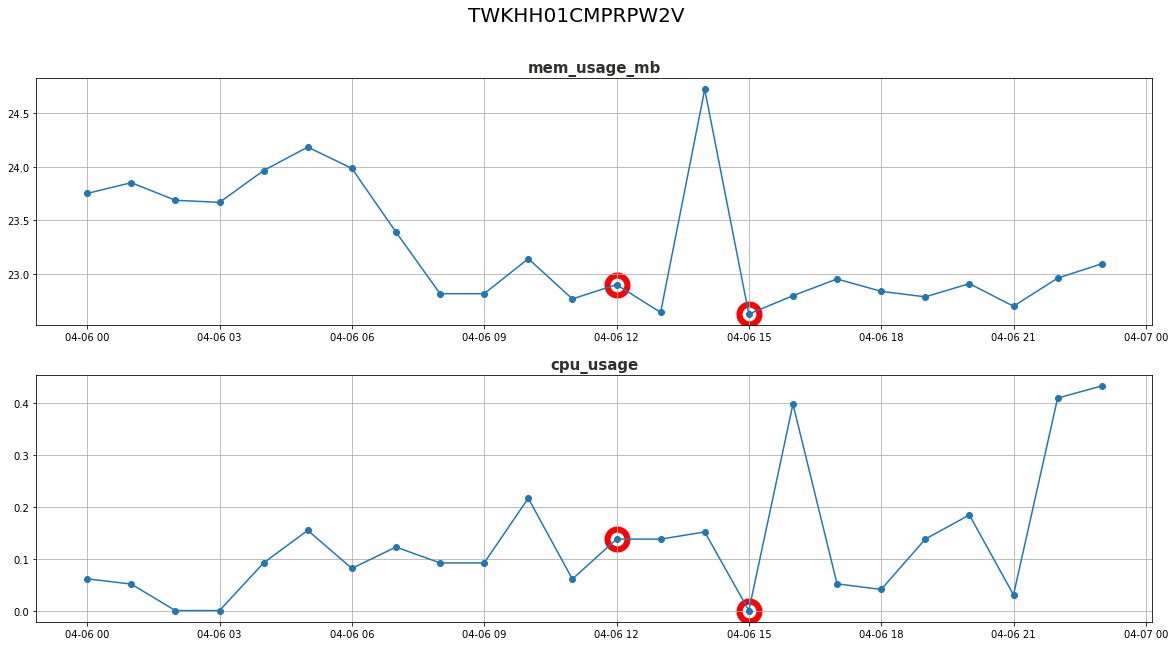

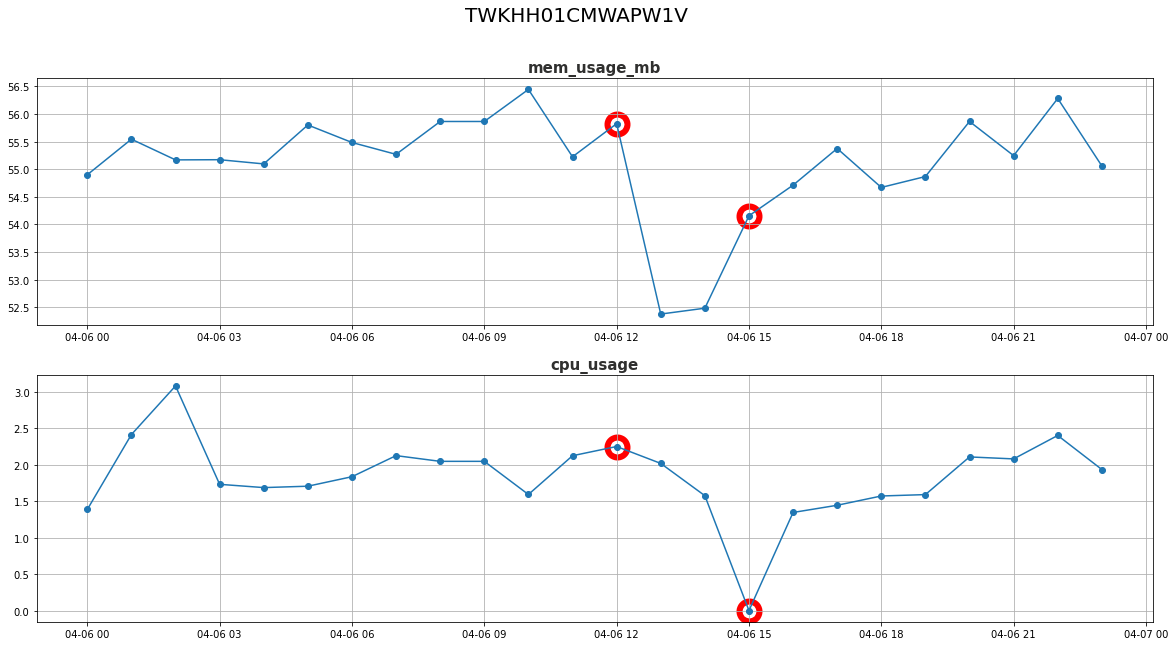

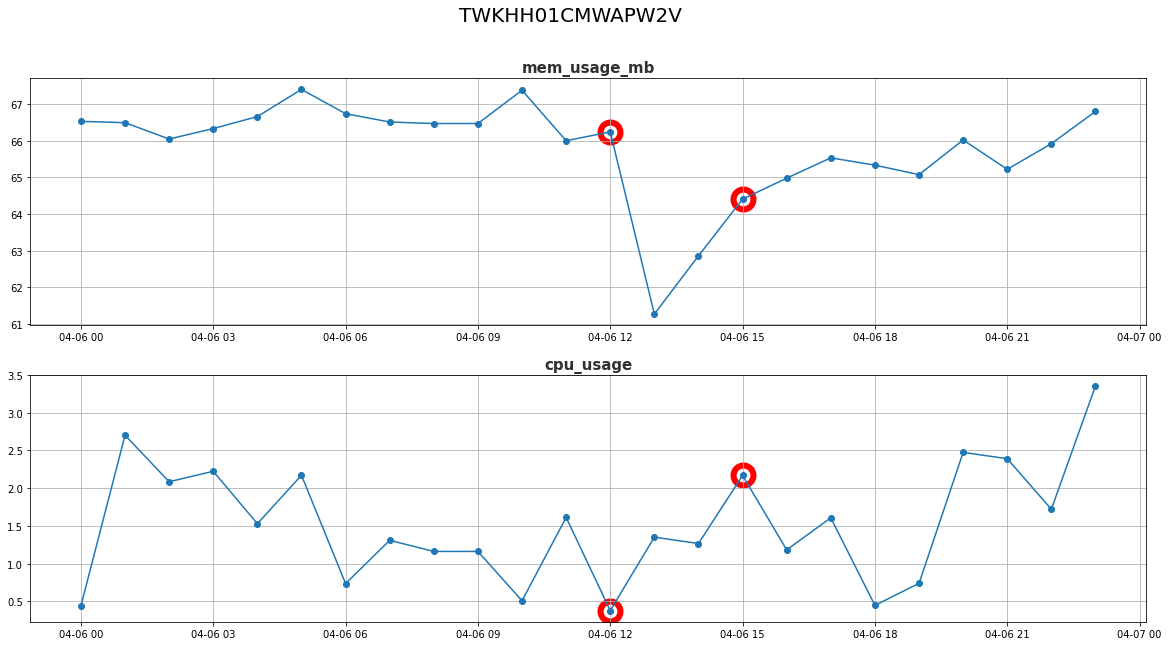

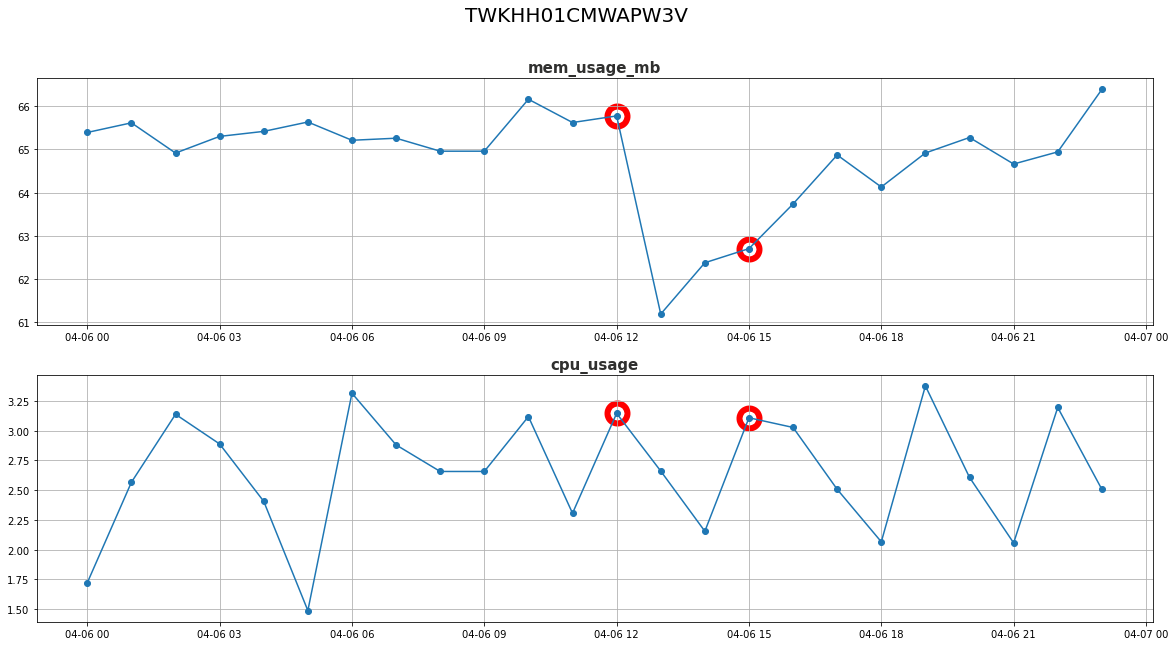

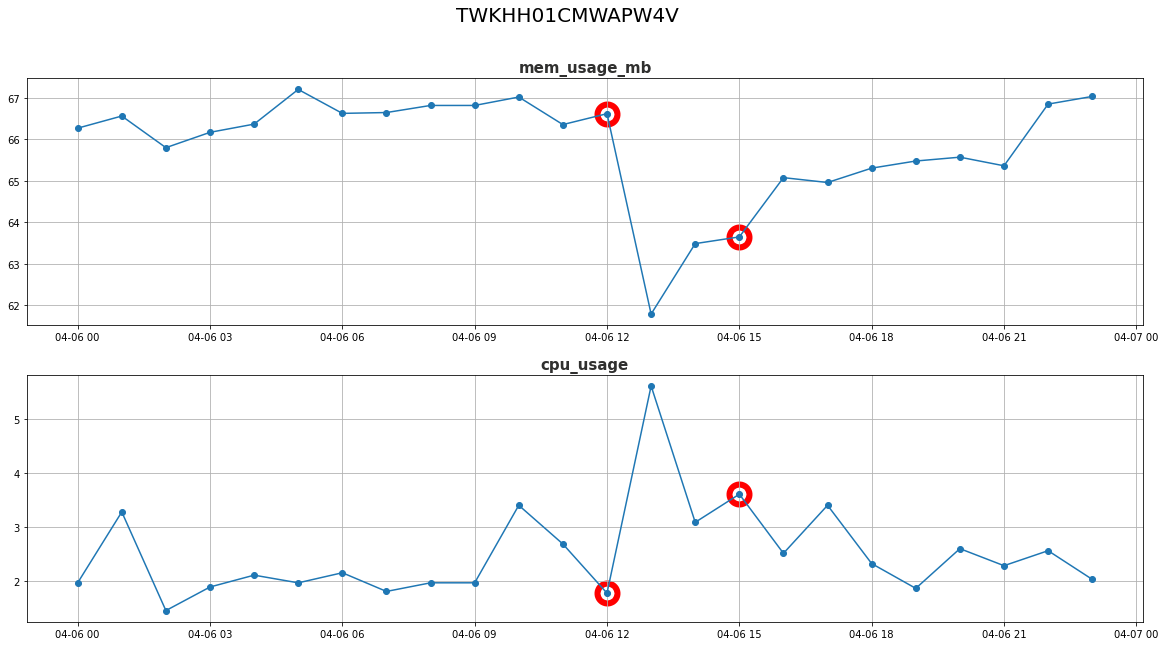

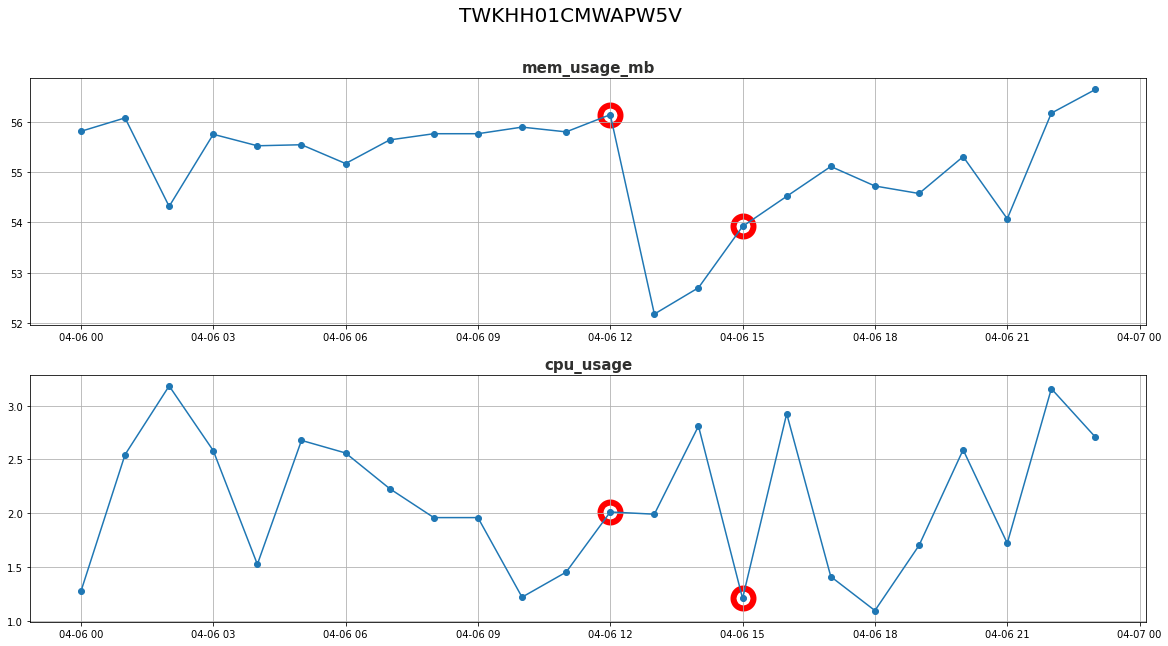

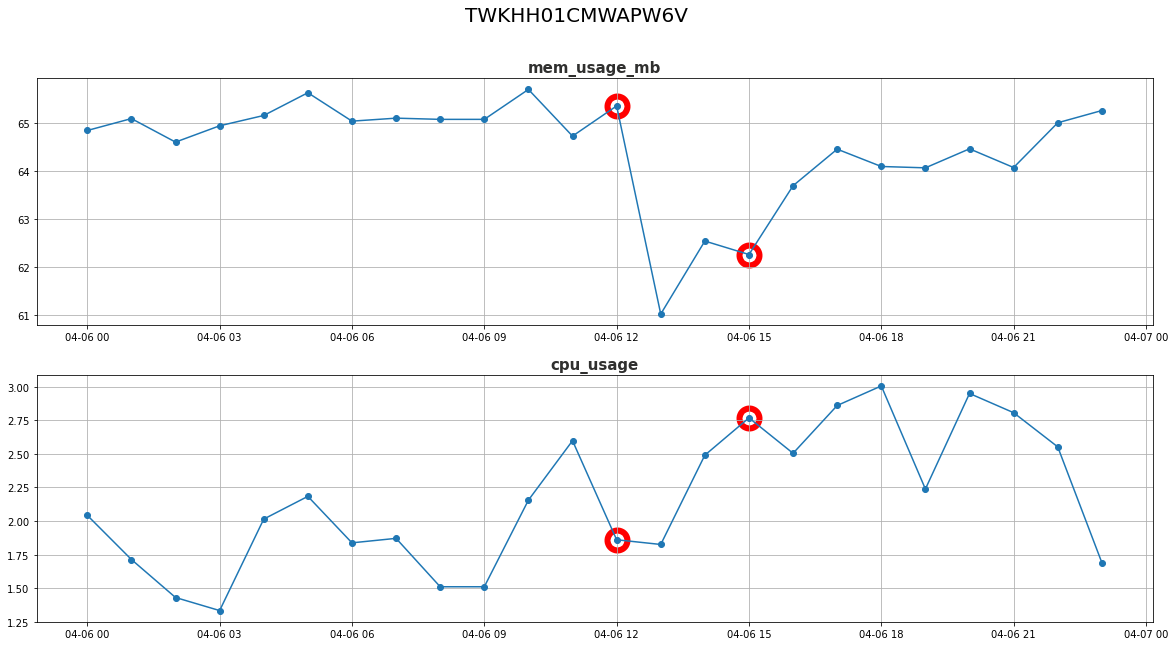

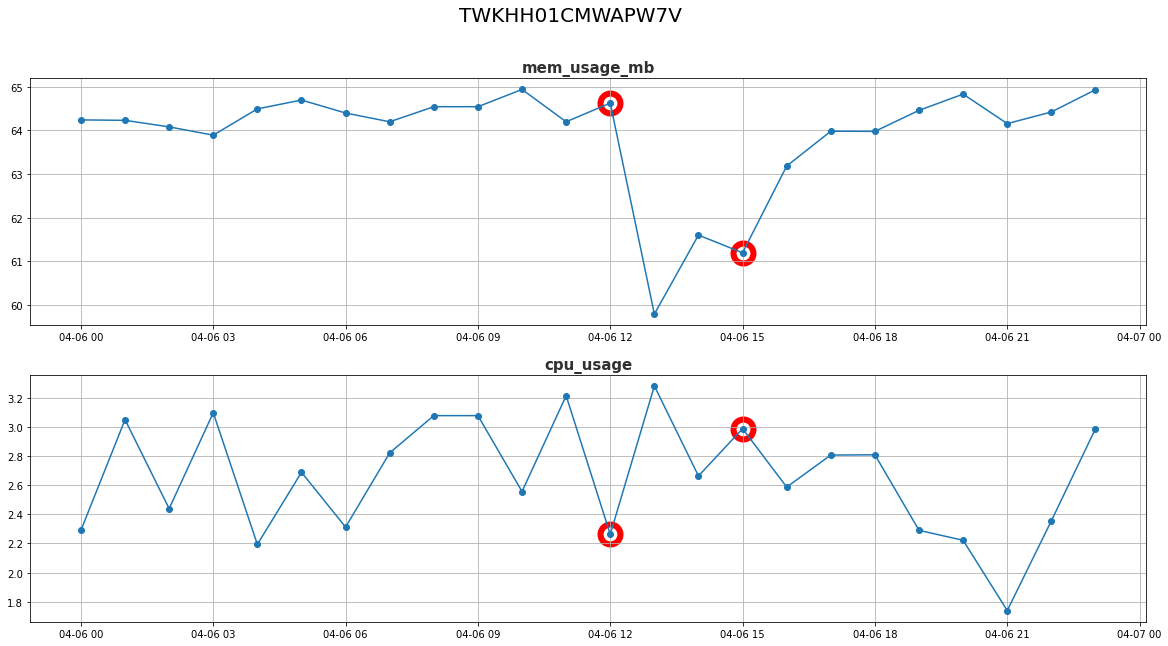

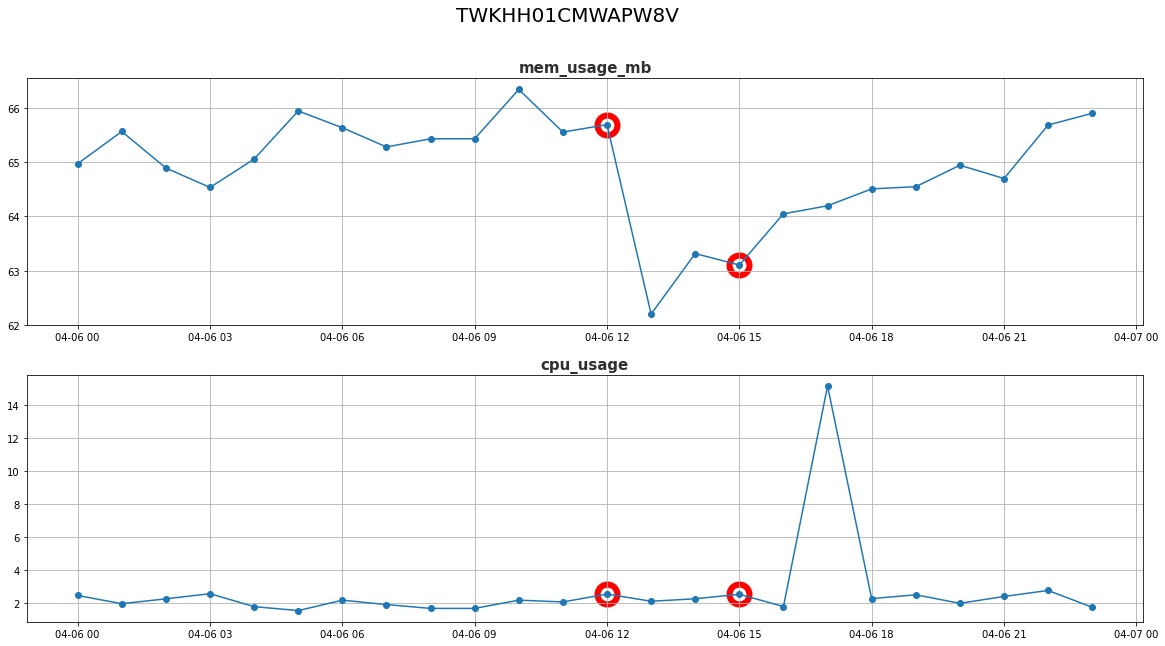

In [38]:
for machinename in data_dict:
    df = data_dict[machinename]
    #plt.vlines("2022-04-06 12:00:00",df["cpu_usage"].values.min()-2, df["cpu_usage"].values.max()+2, color='black', linestyles='--', linewidth=3)
    #plt.scatter(df_1V.index,df_1V["cpu_usage"],c="red")
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
    #plt.title(i)  
    #fig.figure()
    col = 0
    for f,ax in enumerate(axes.flatten(), start=1):
        
        # ax.title.set_text(f'Plot #{i}')
        ax.plot(df.iloc[:,col],"o-")
        ax.scatter(df[df["downtime_label"]==1].index,df.loc[downtime_list,df.columns[col]],color='red',linewidths=20)
        ax.set_title(df.columns[col], fontsize=15, fontweight='bold',
                     color='#30302f', loc='center')
        
        col += 1
        ax.grid()
        
    
    
    fig.suptitle(machinename, fontsize=20)
    
    
    plt.savefig("./Dataset/MES_data_0408/machine_usage/{}_usage.jpg".format(machinename))
    plt.show()


C:\Users\user\AppData\Local\Temp/ipykernel_166964/1776583809.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(25,10))


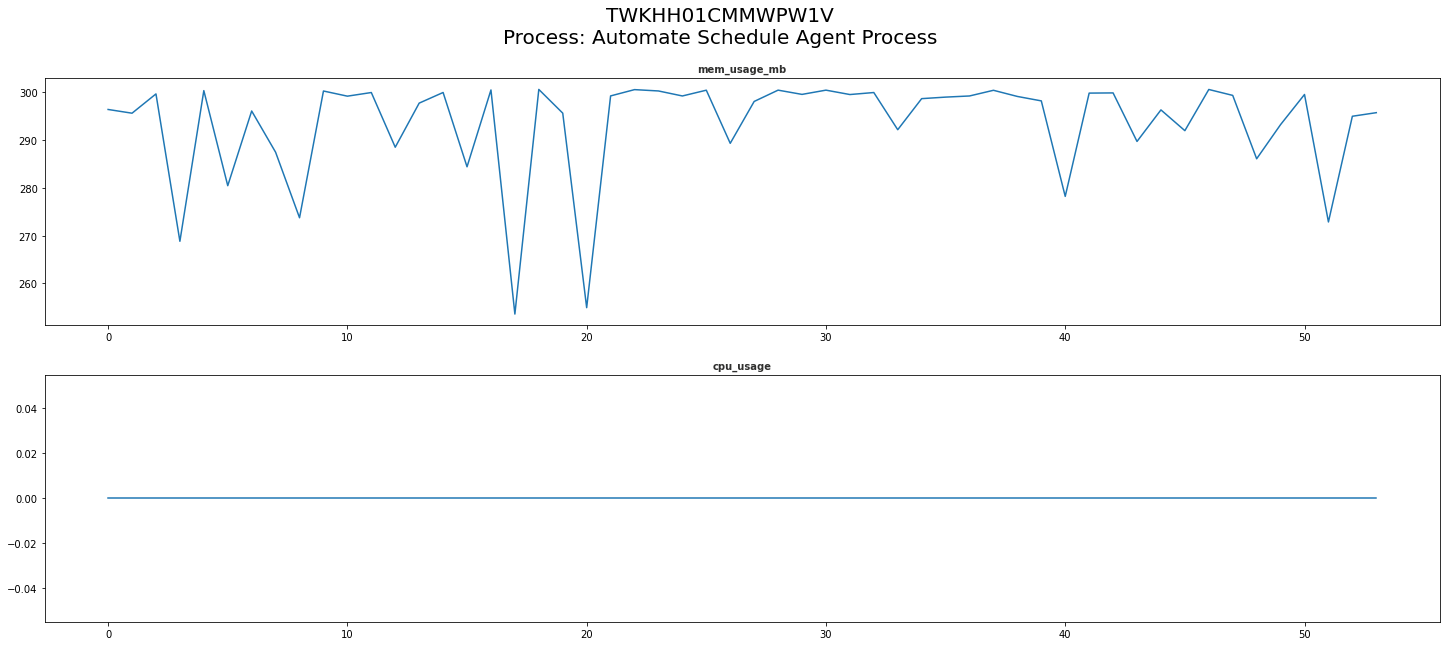

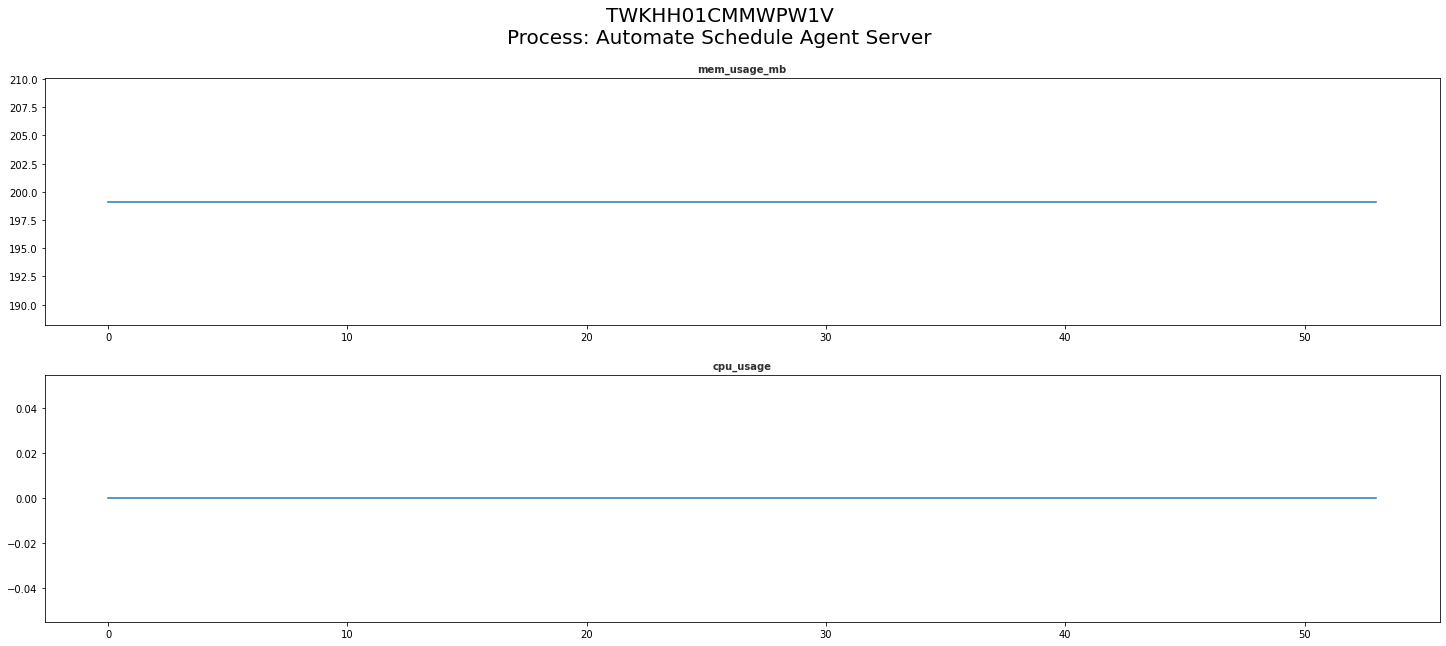

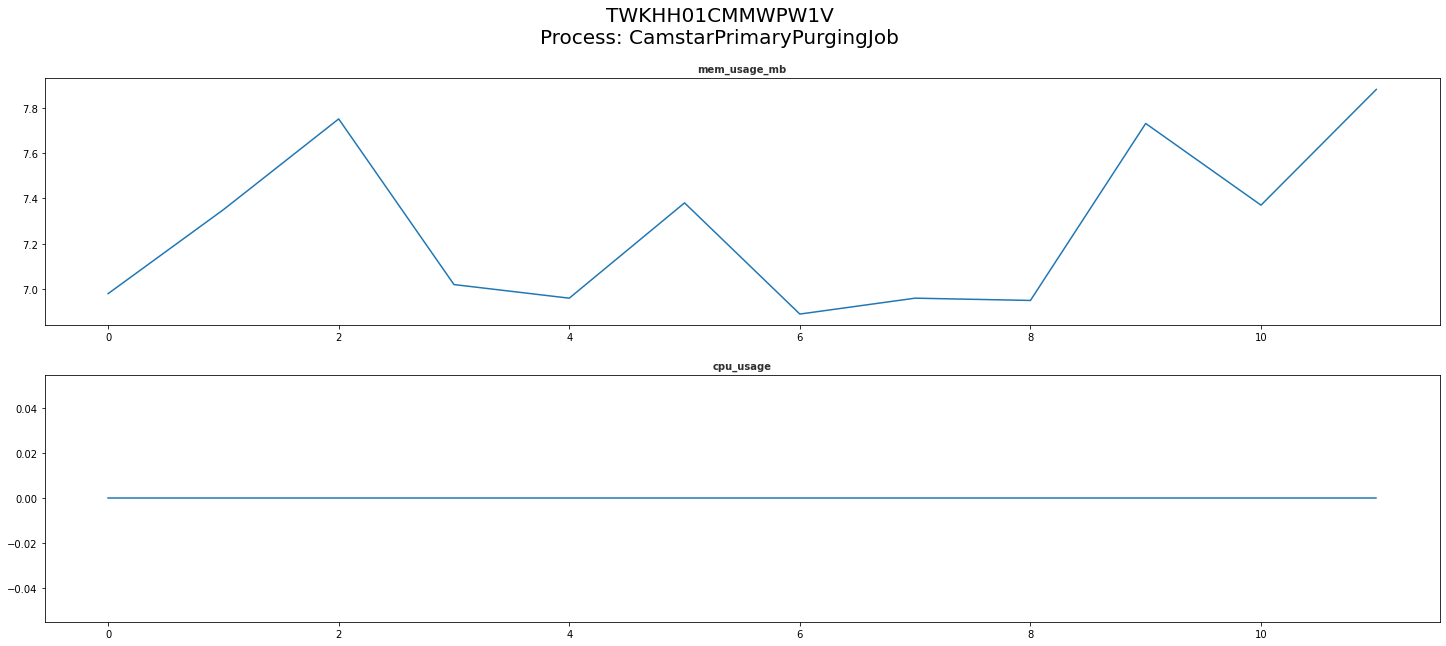

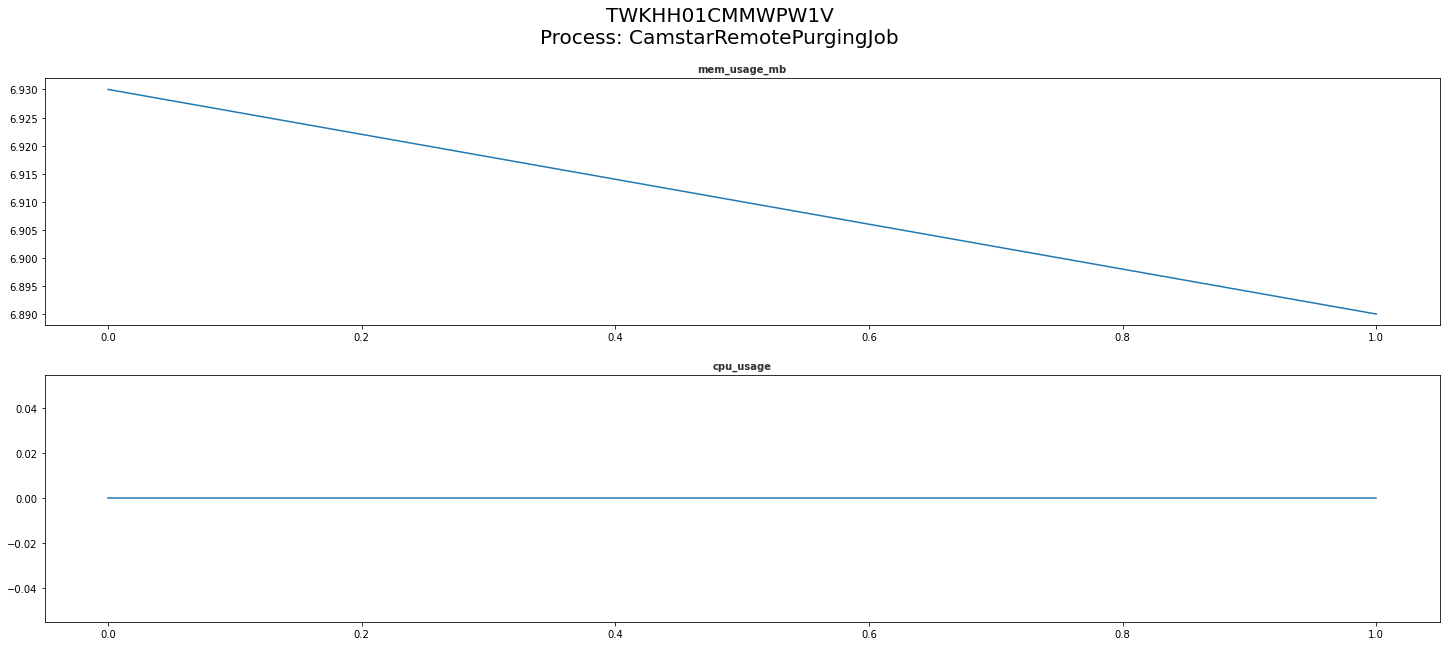

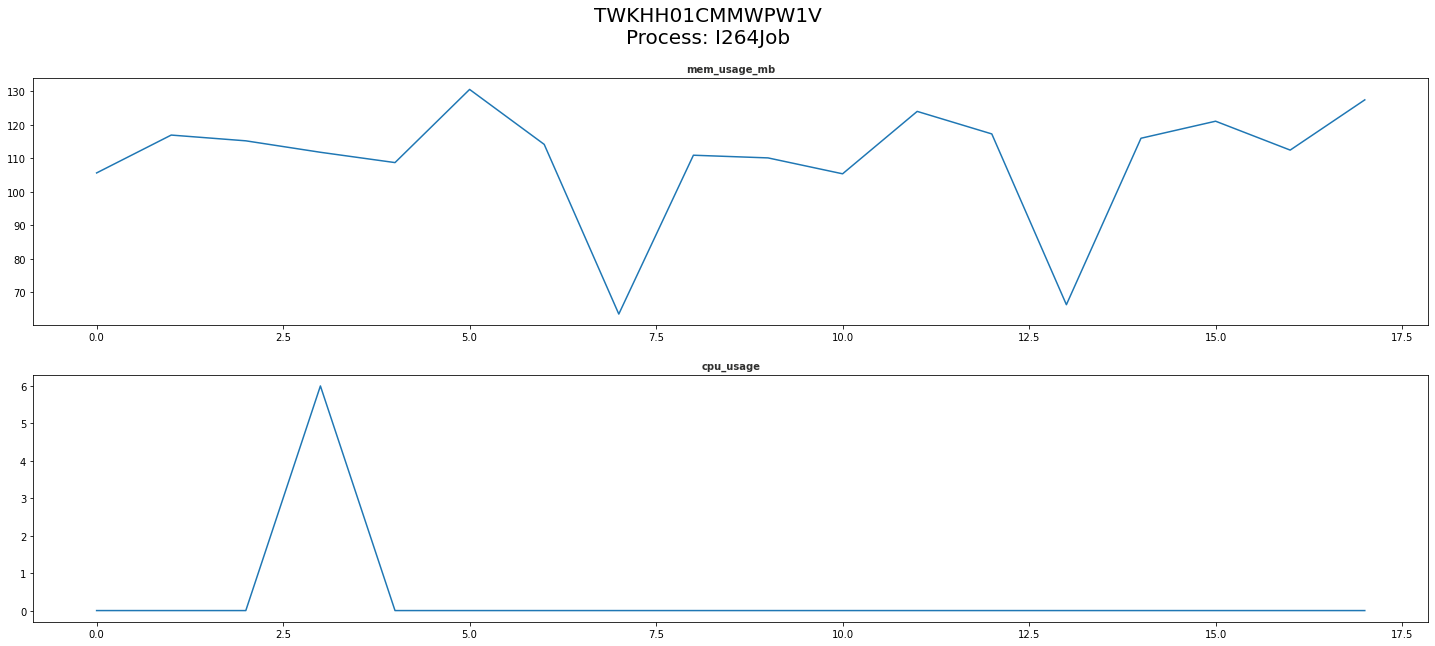

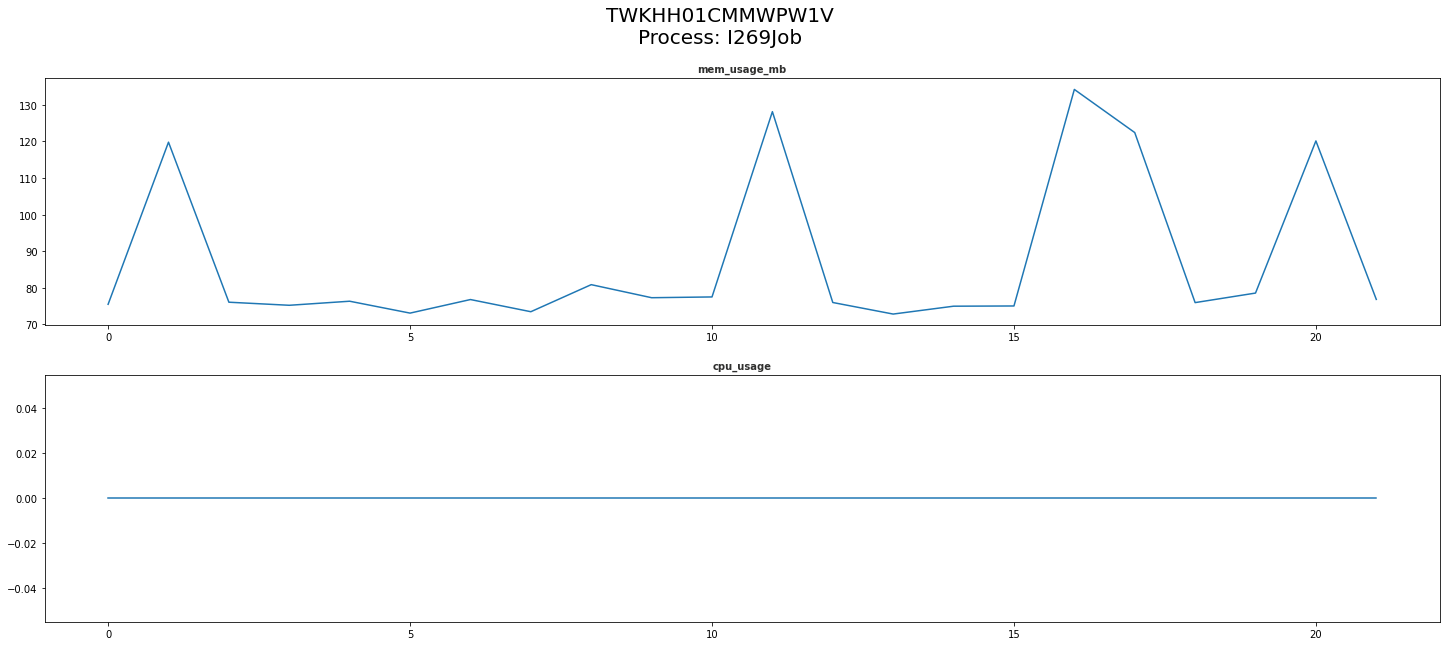

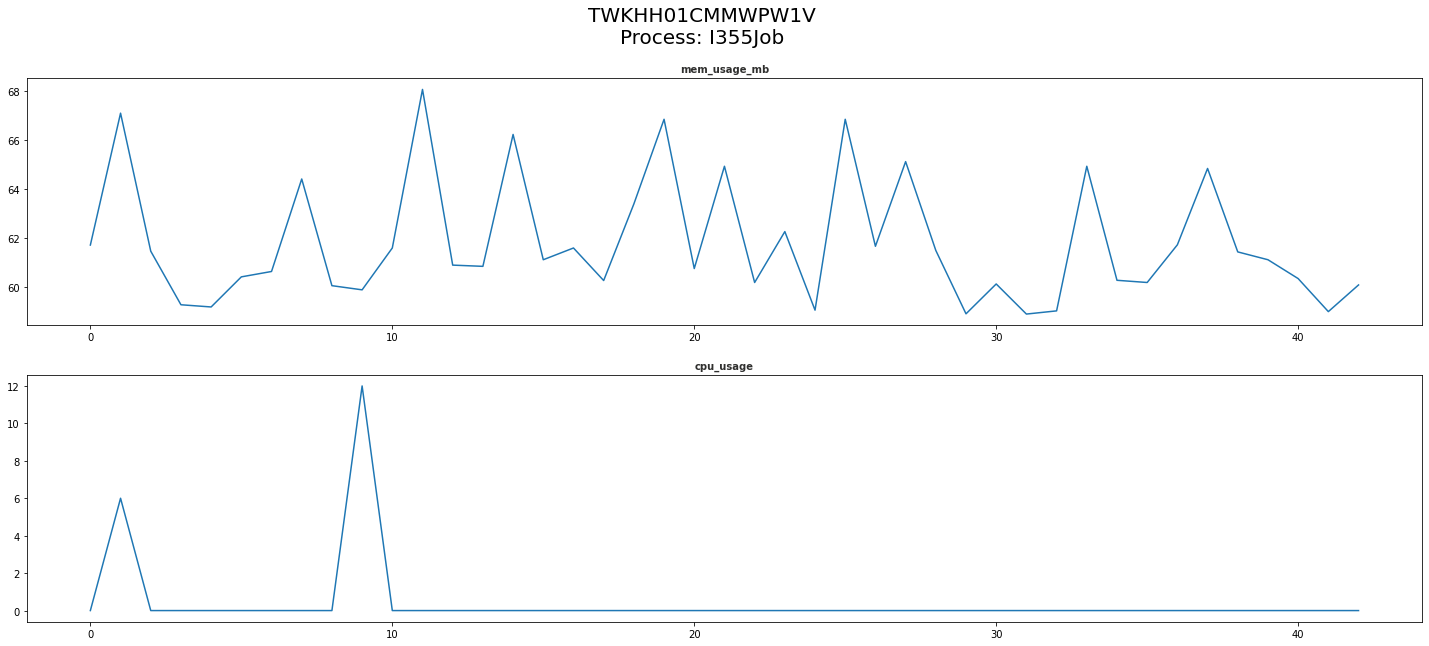

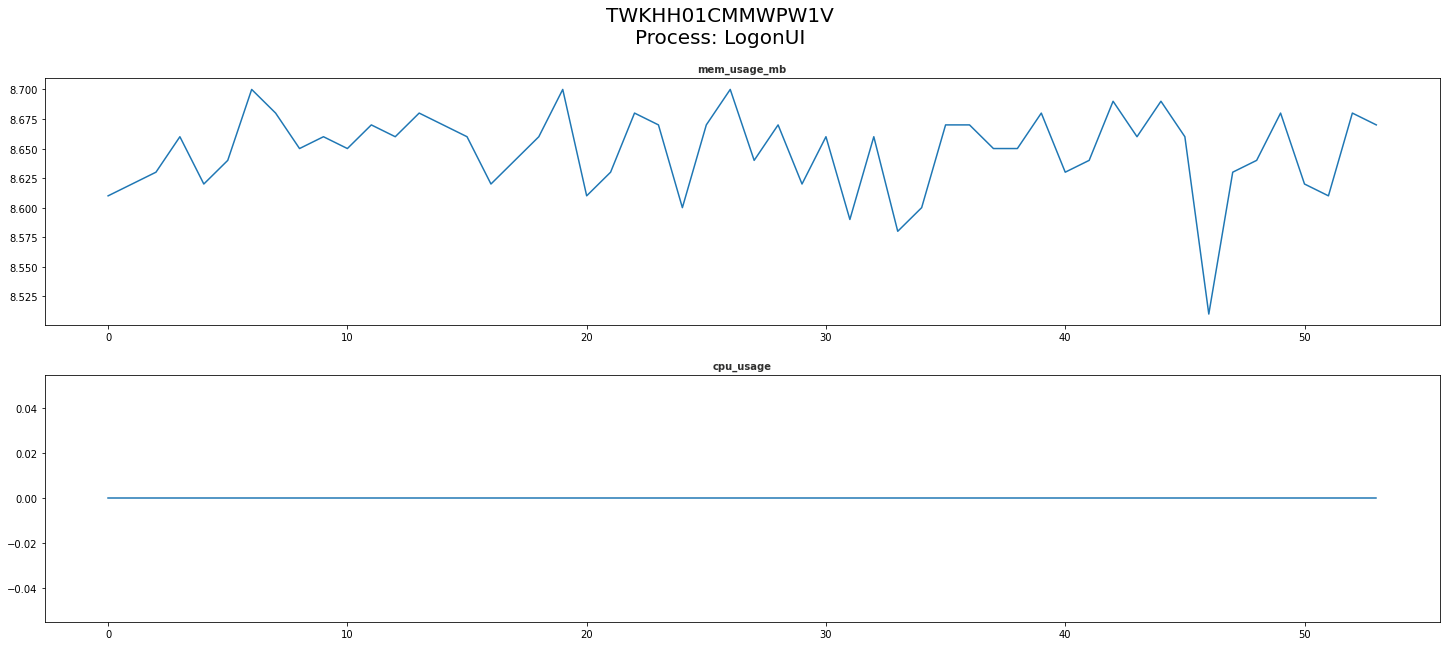

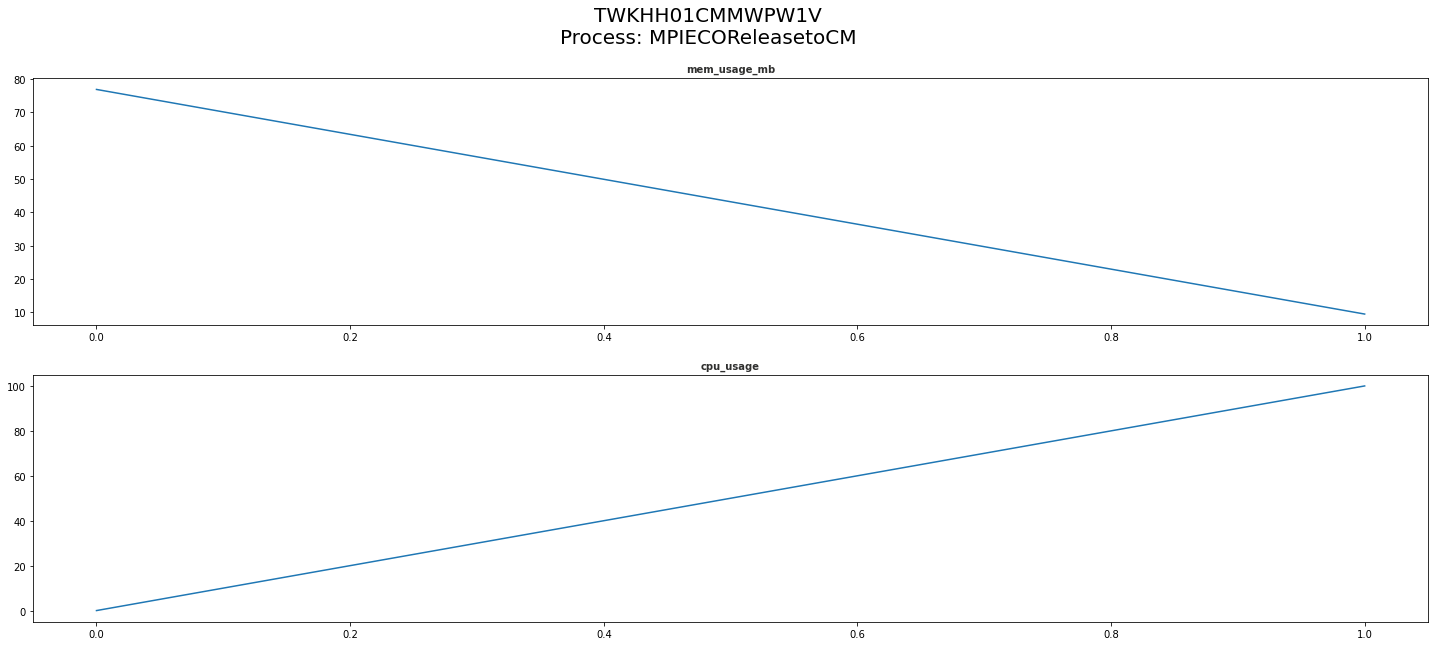

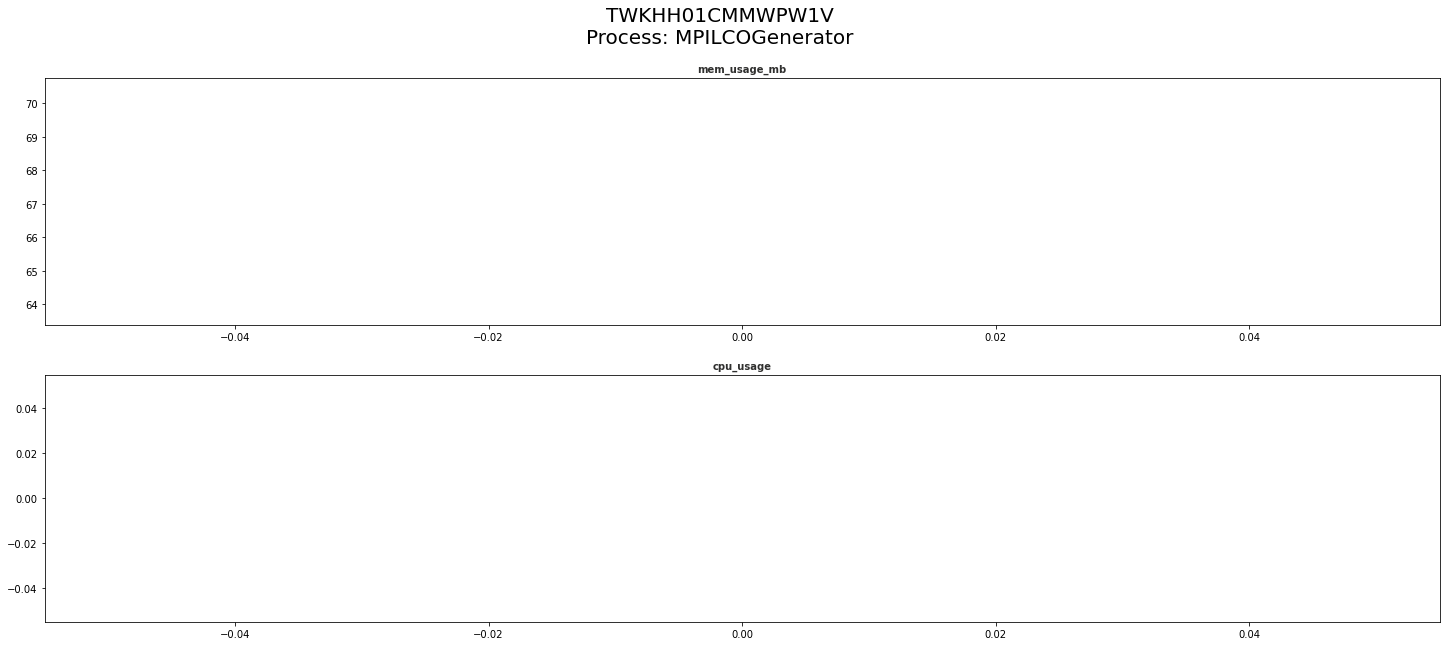

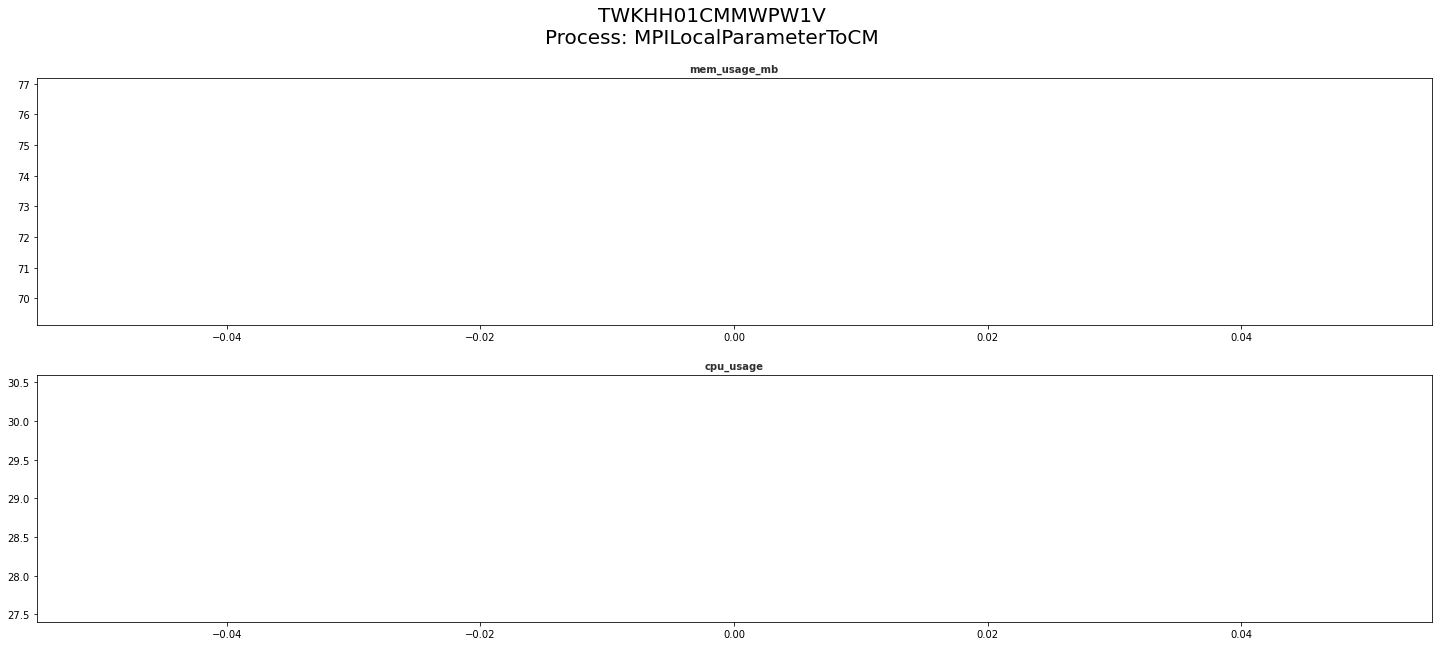

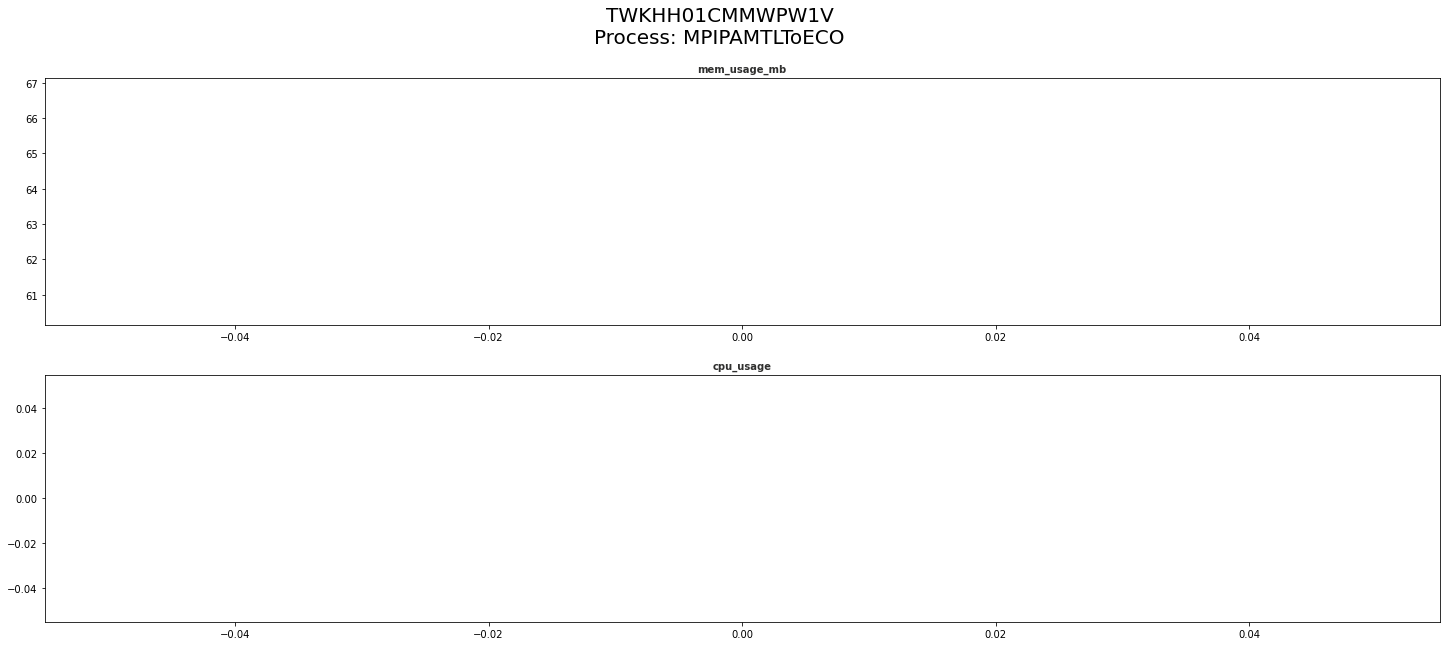

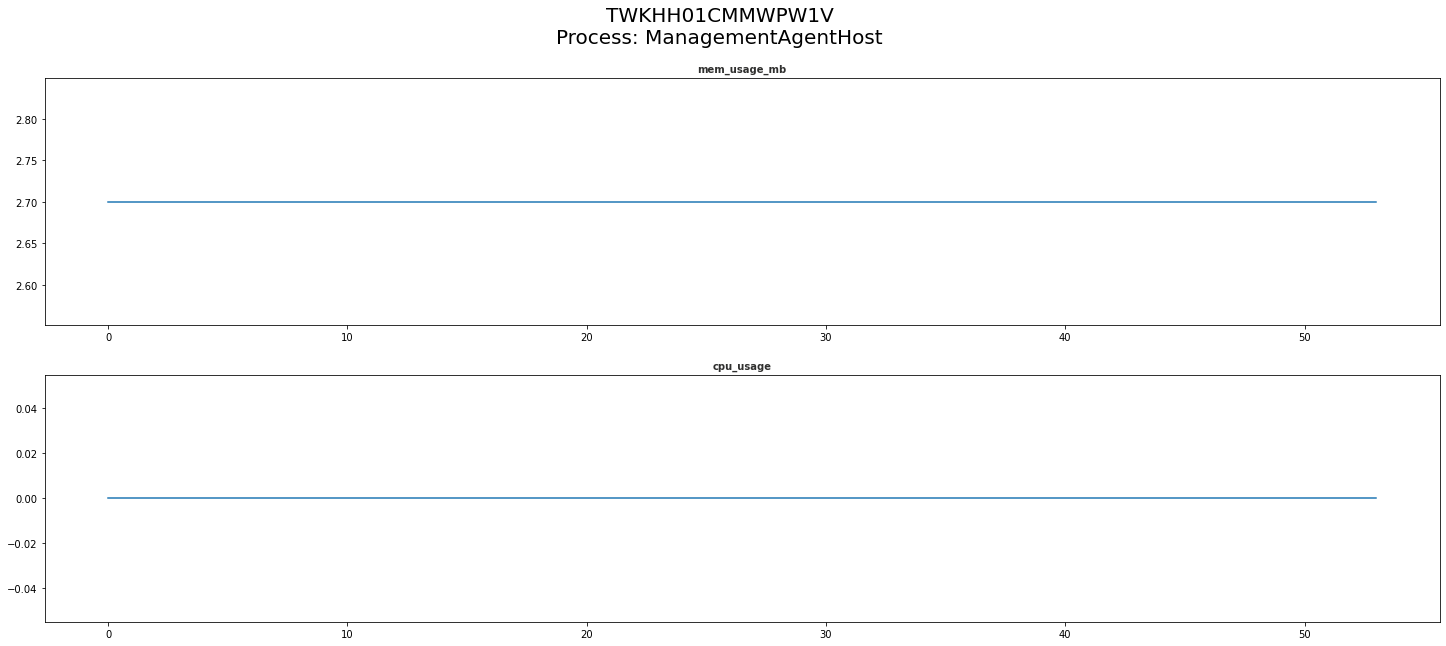

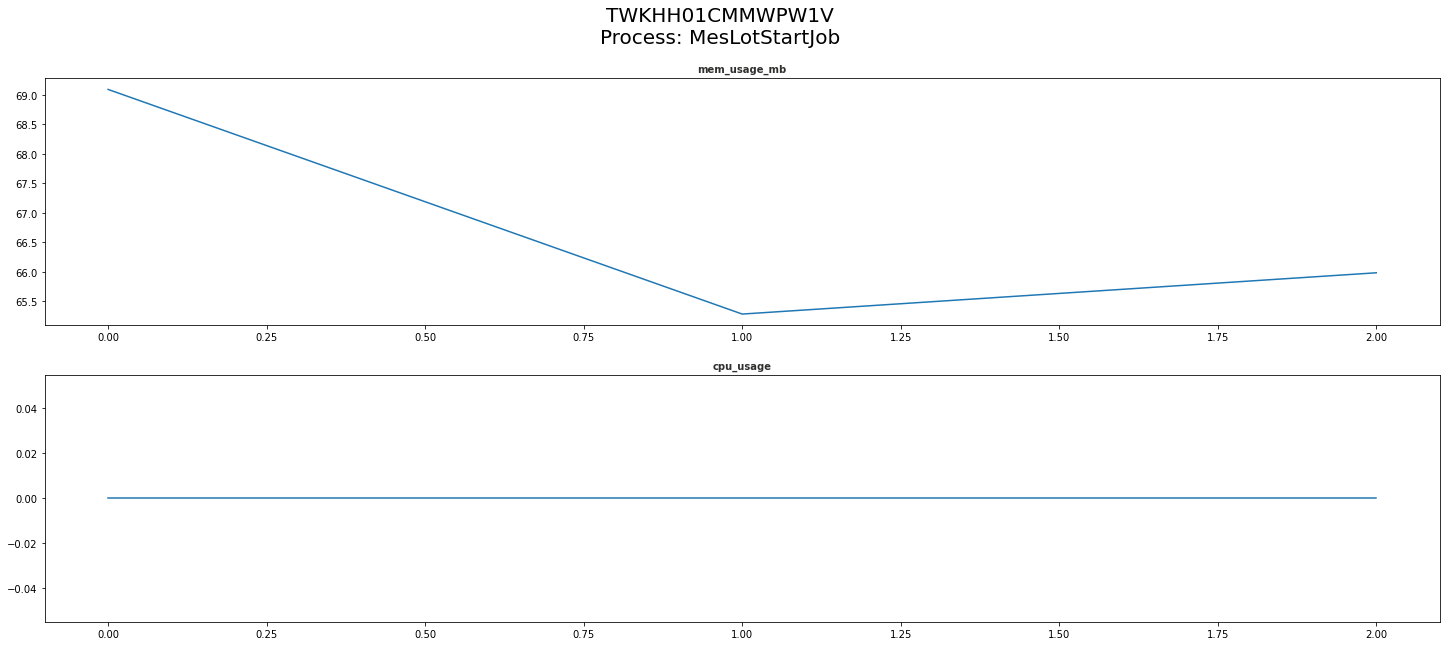

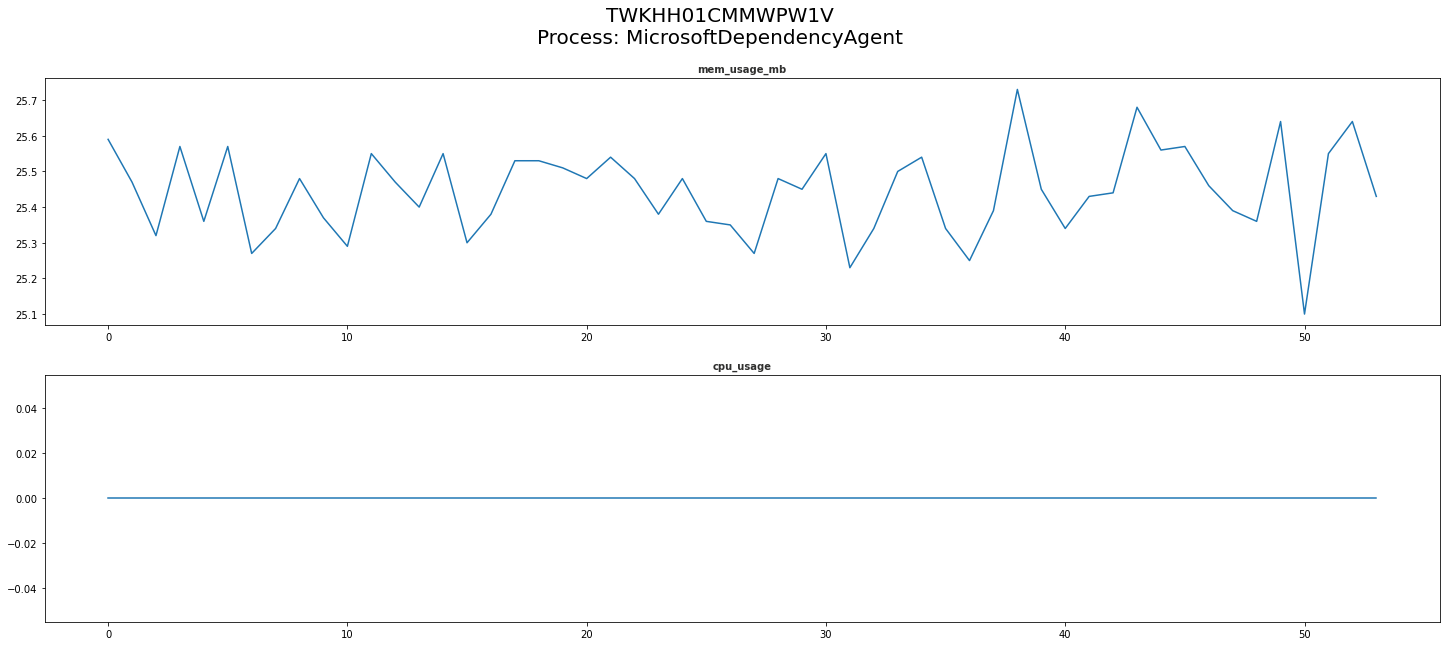

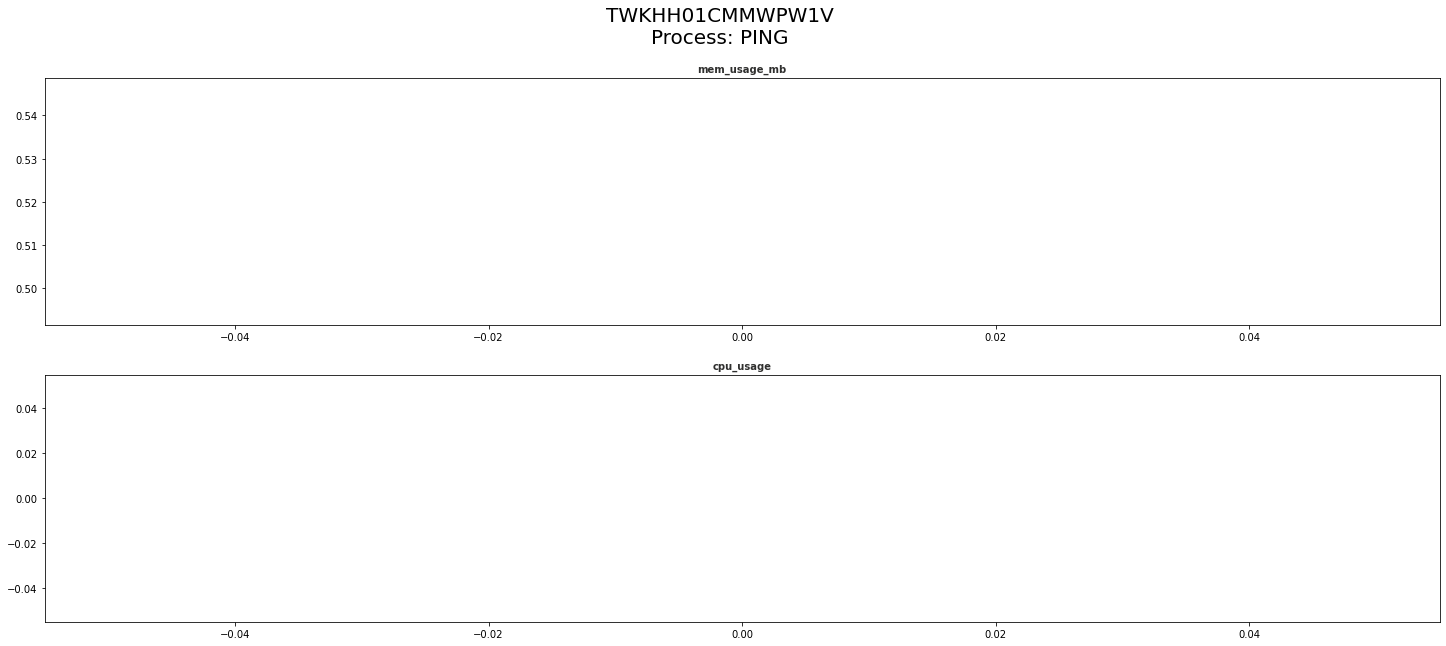

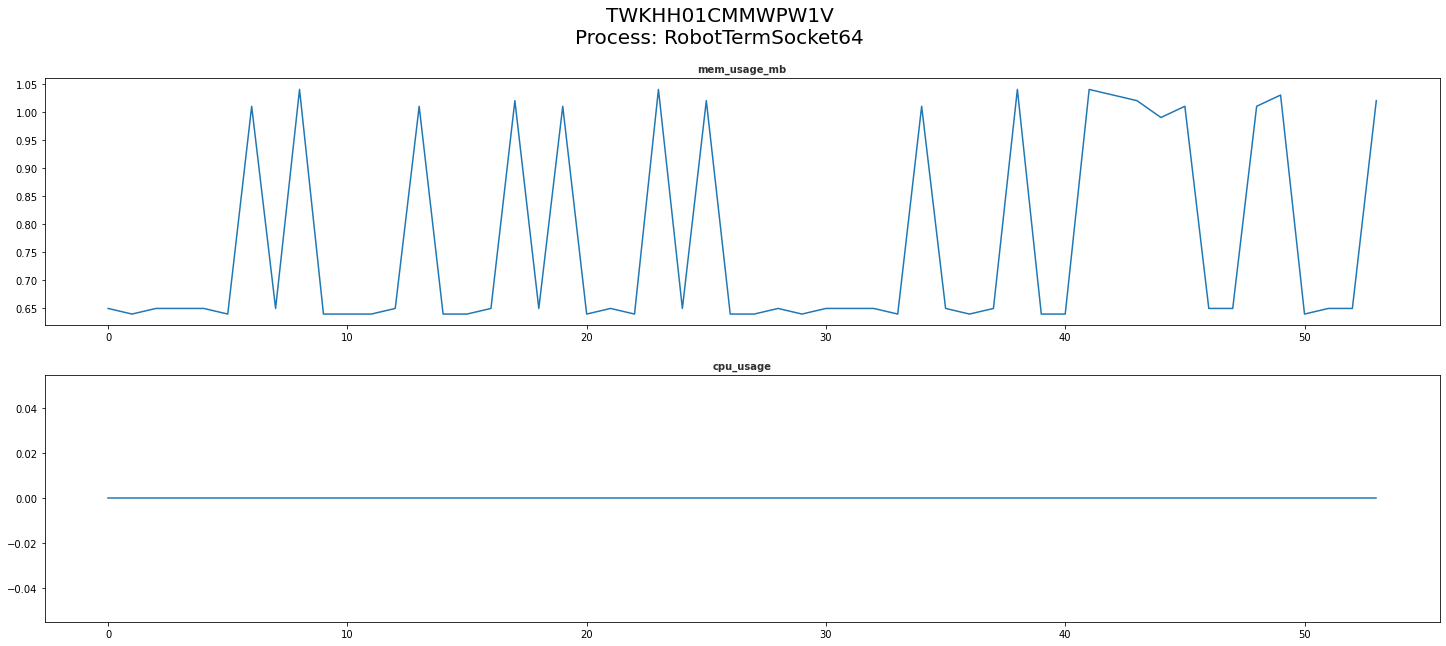

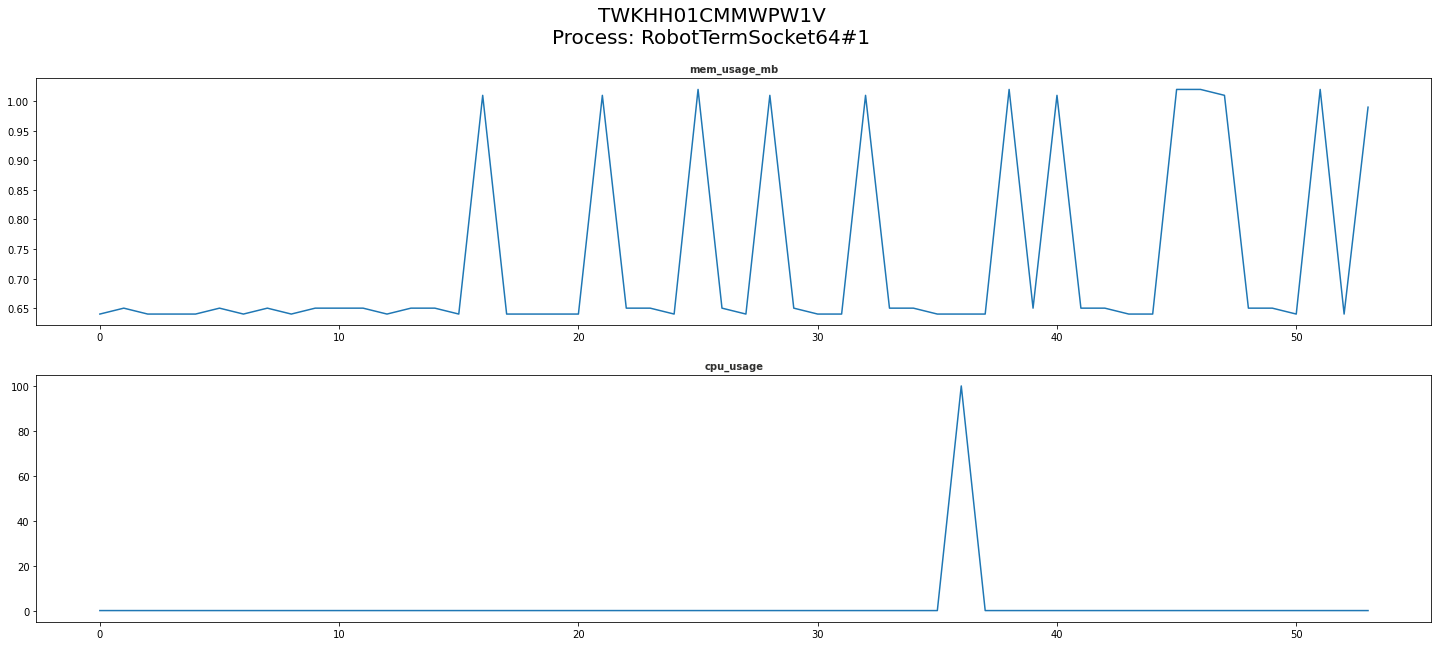

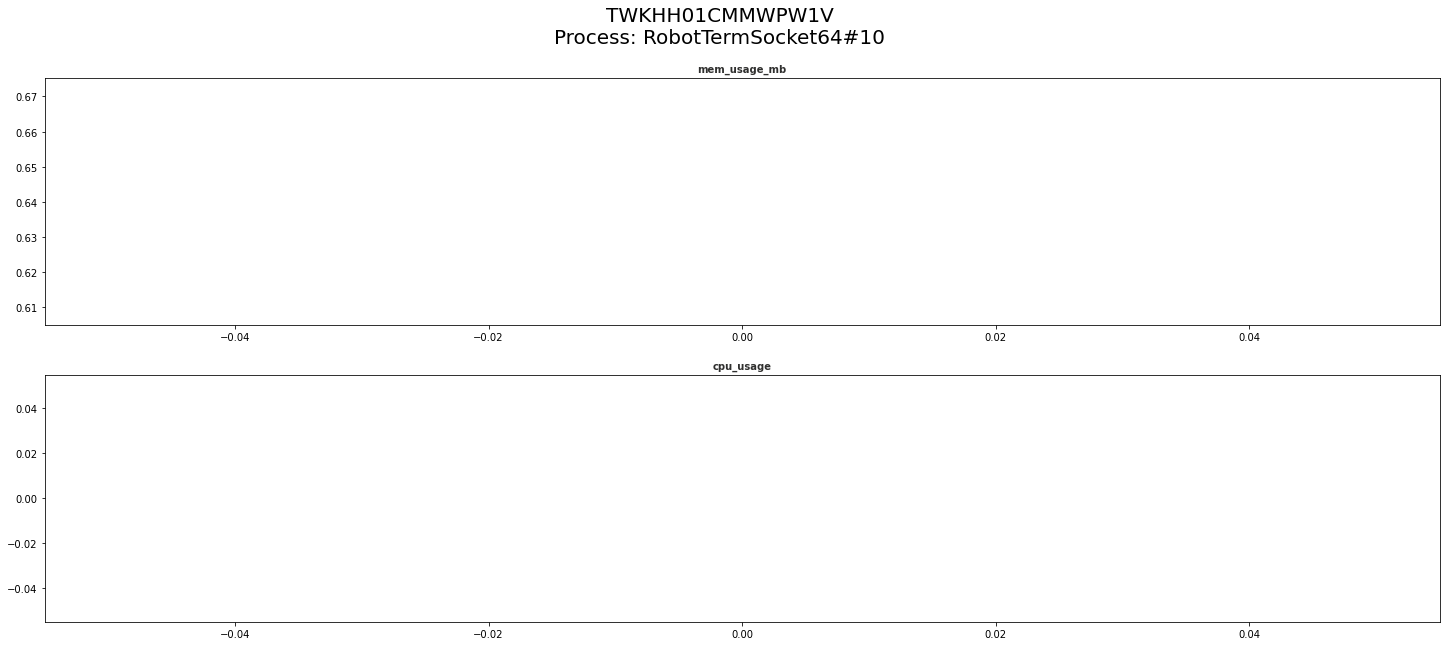

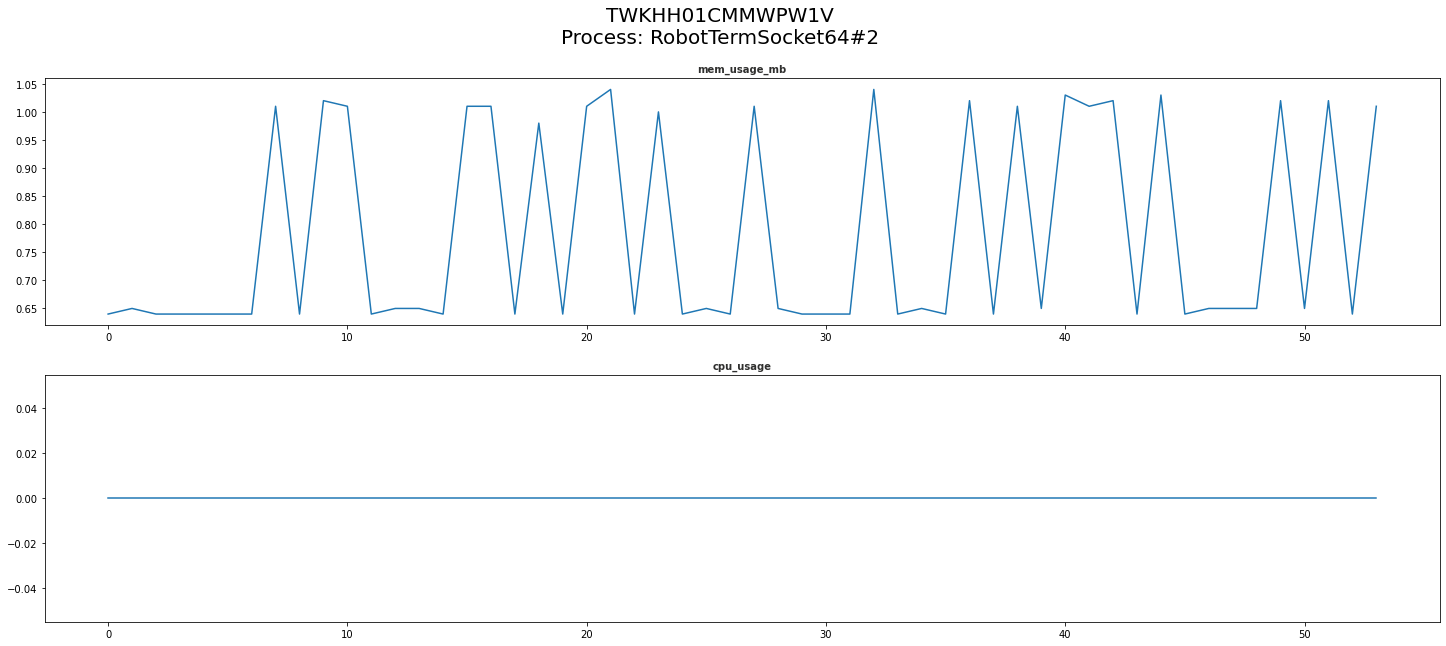

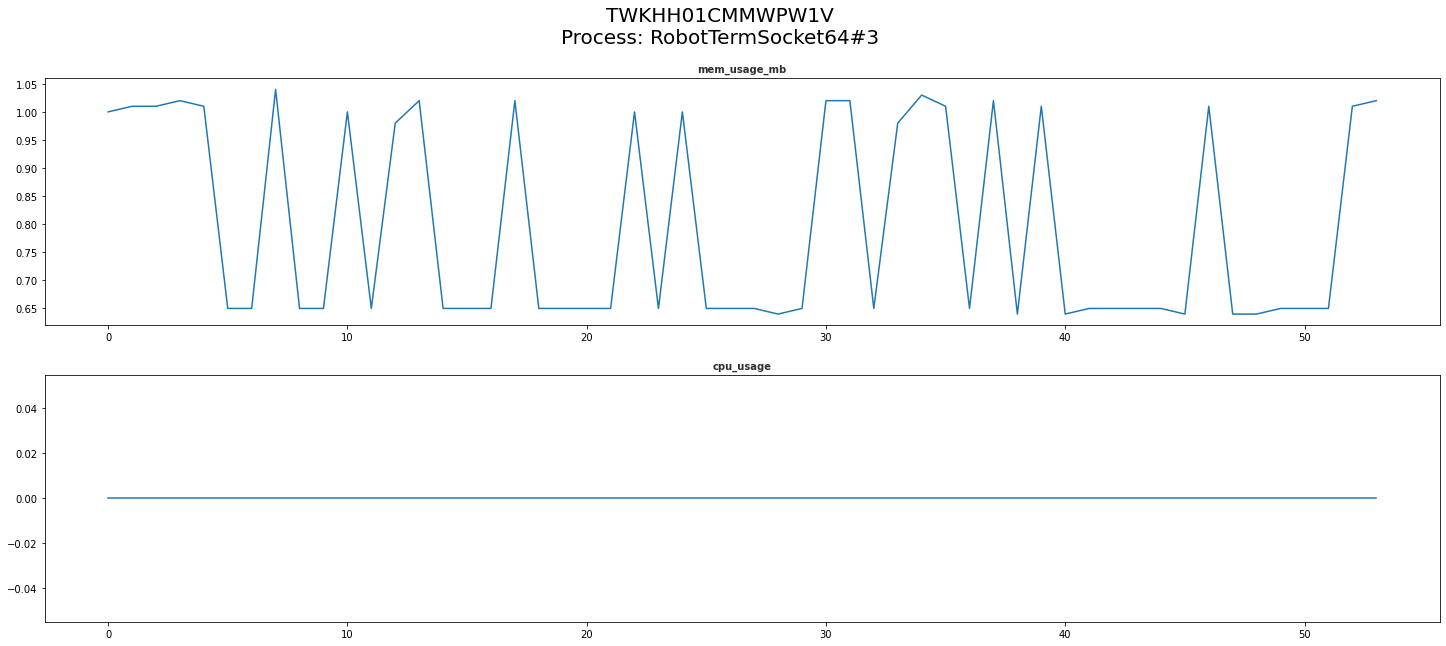

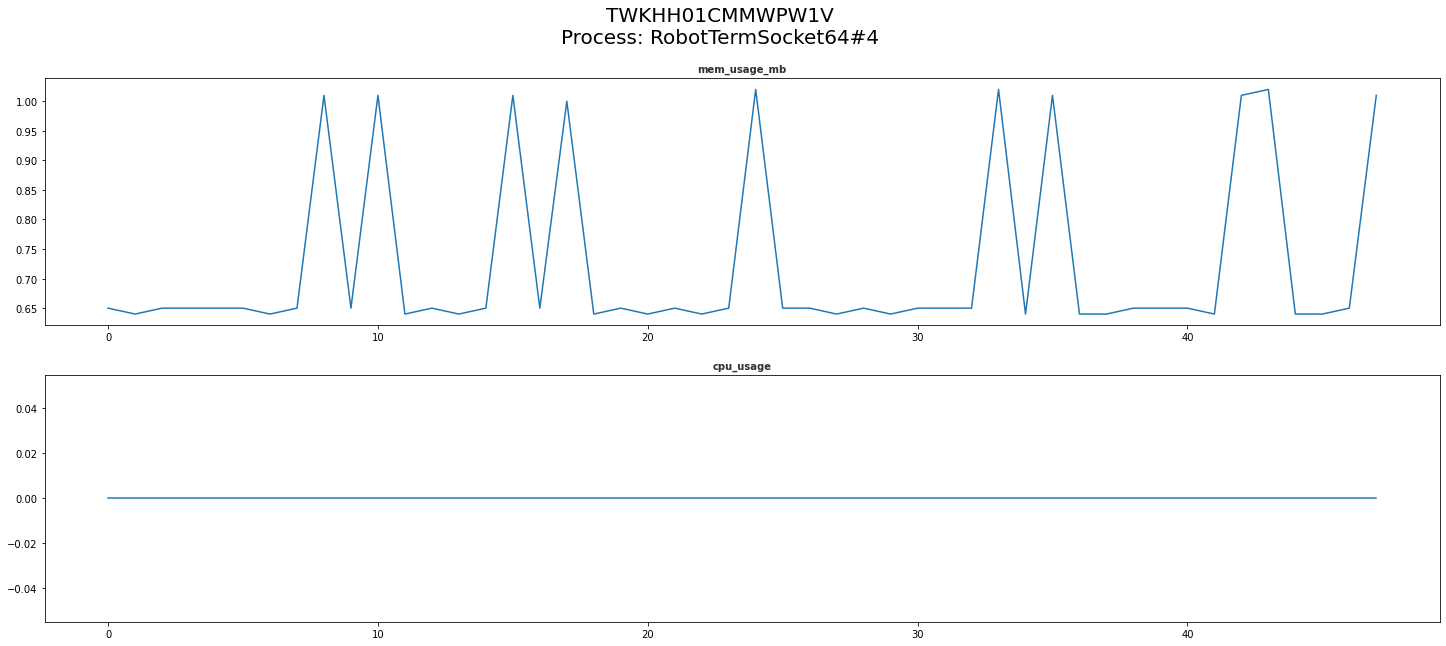

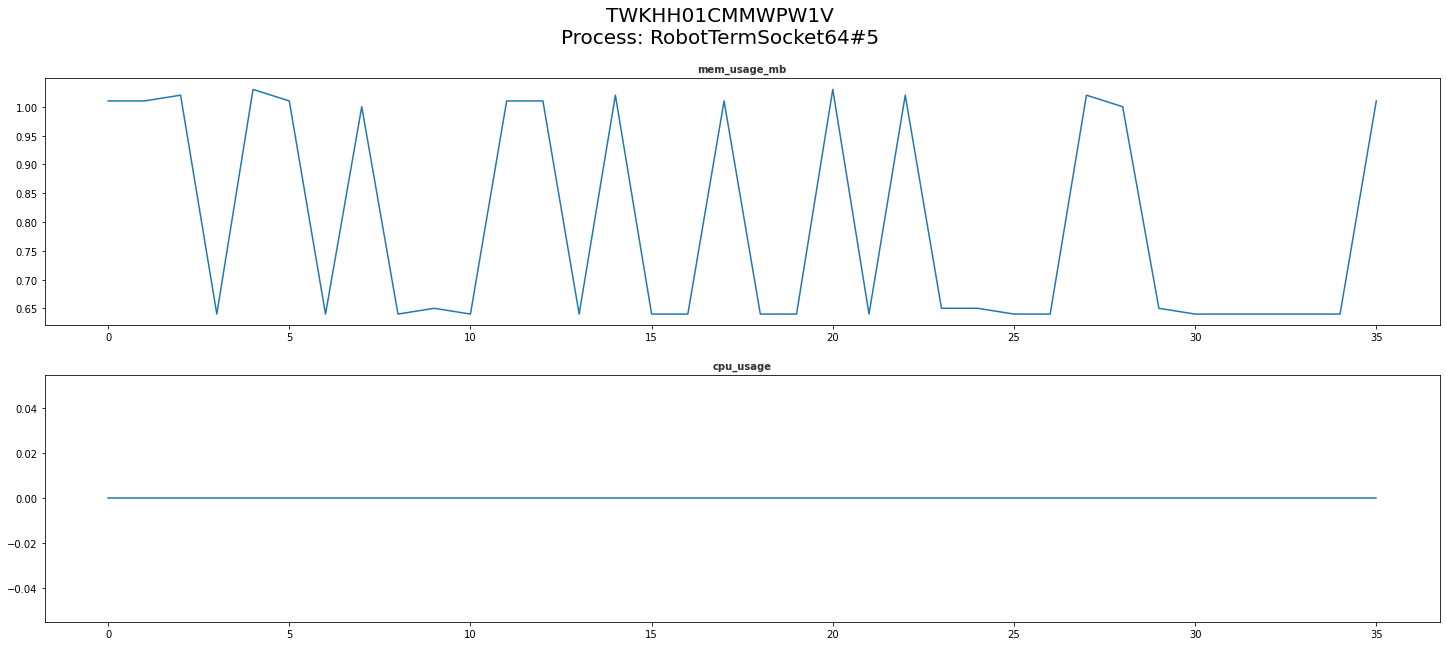

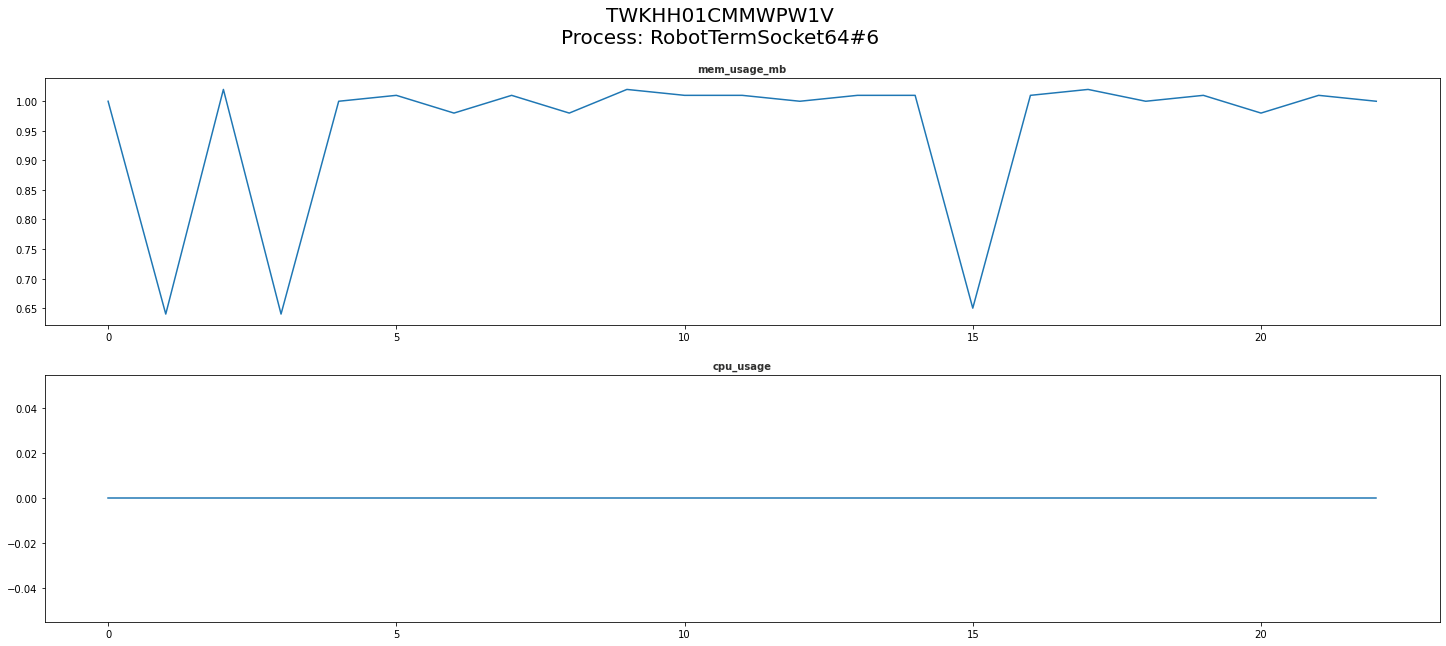

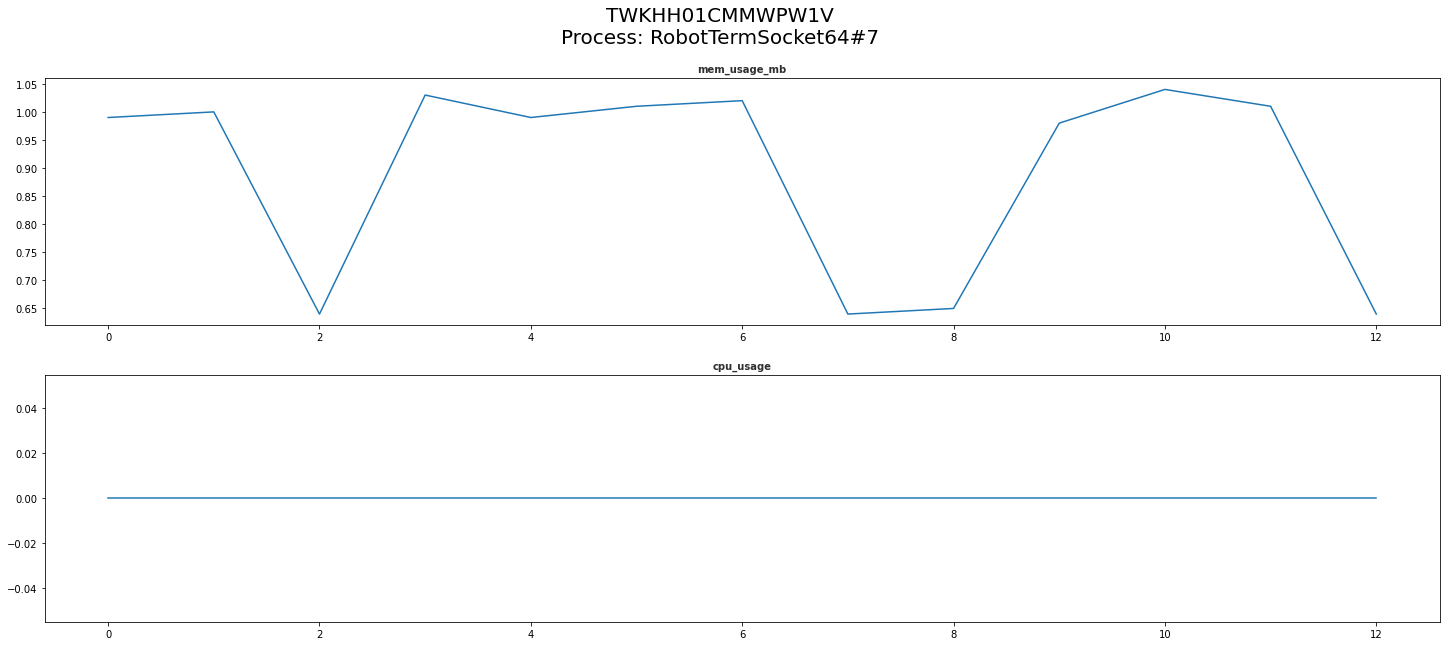

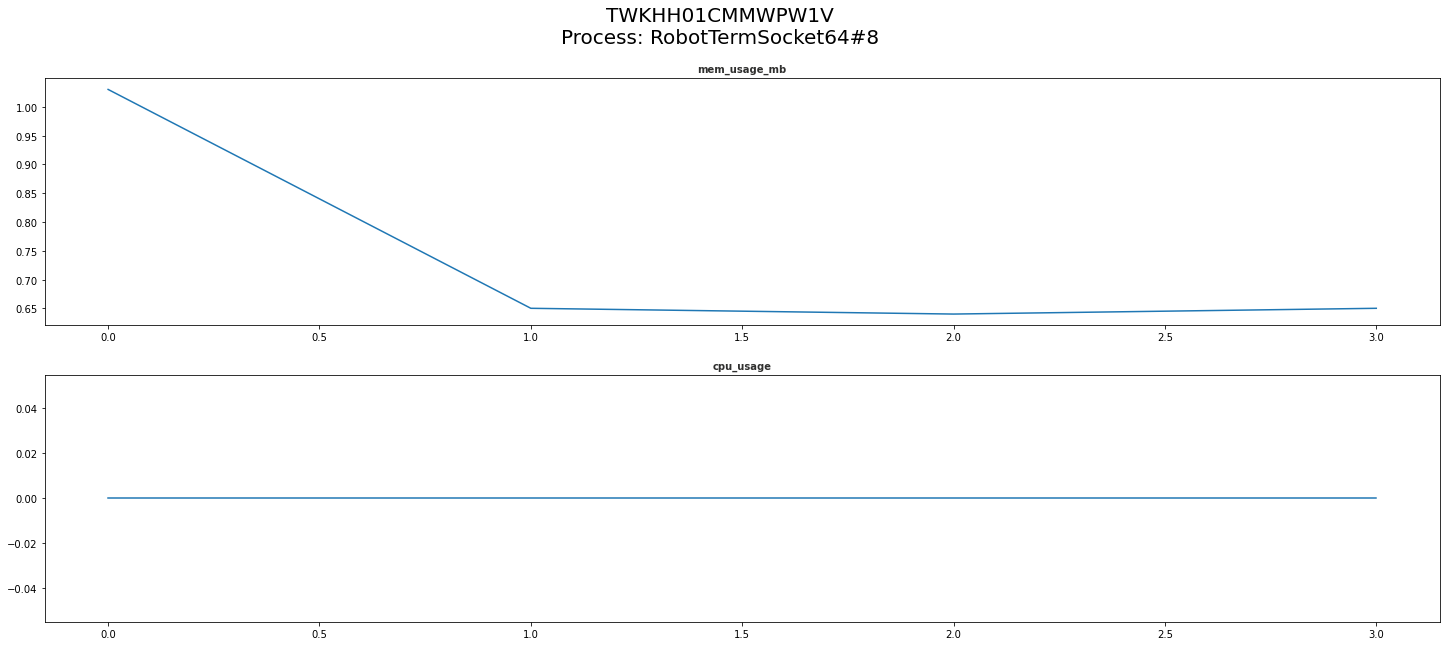

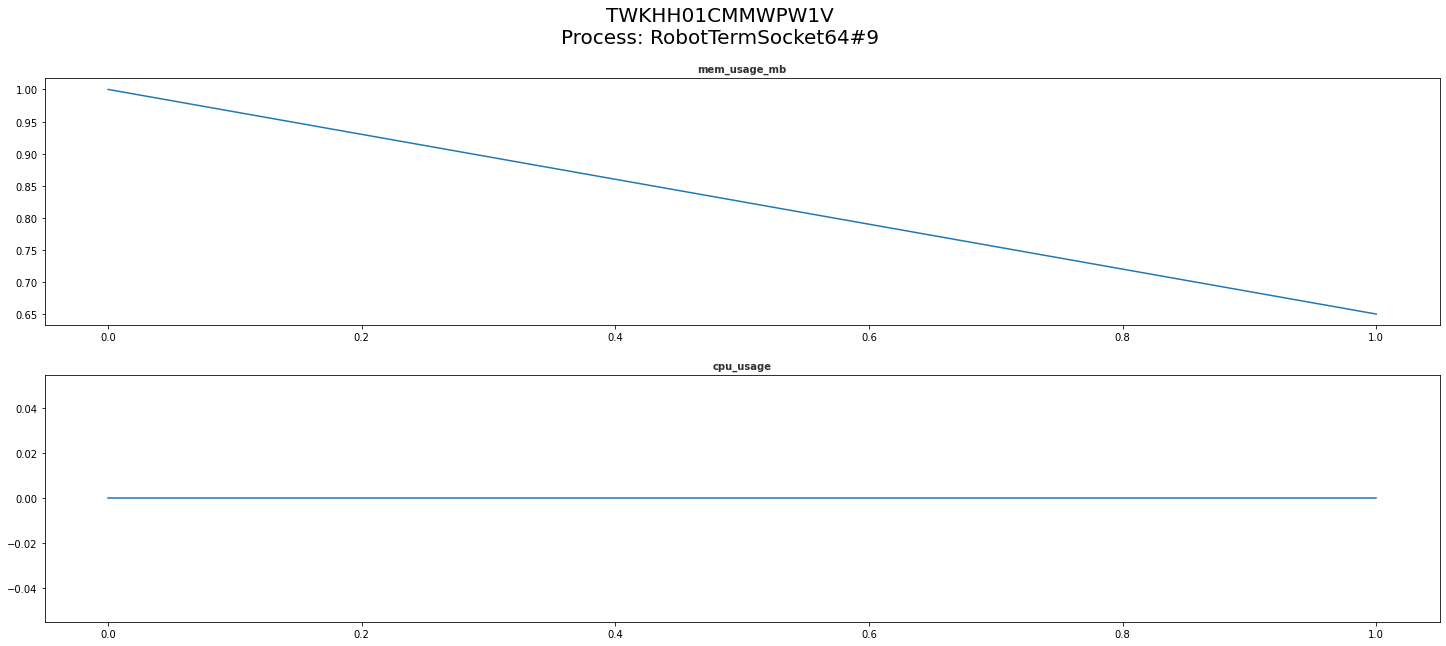

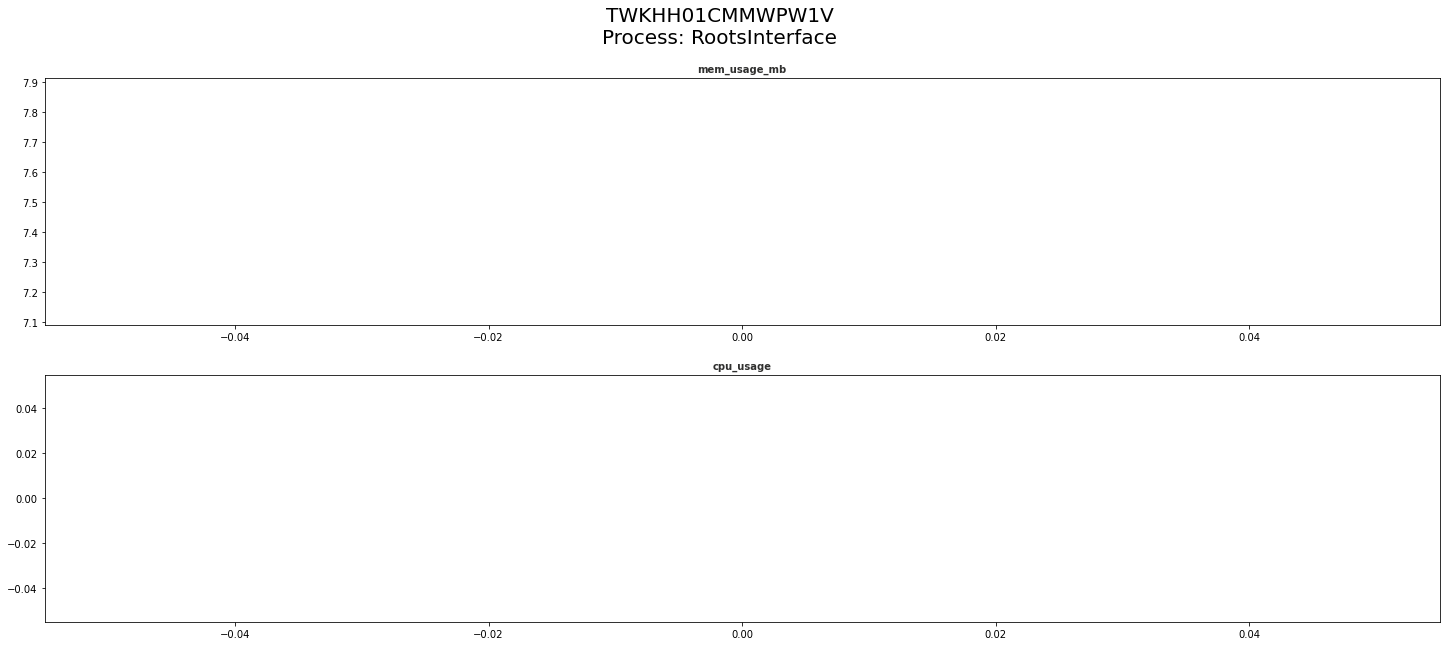

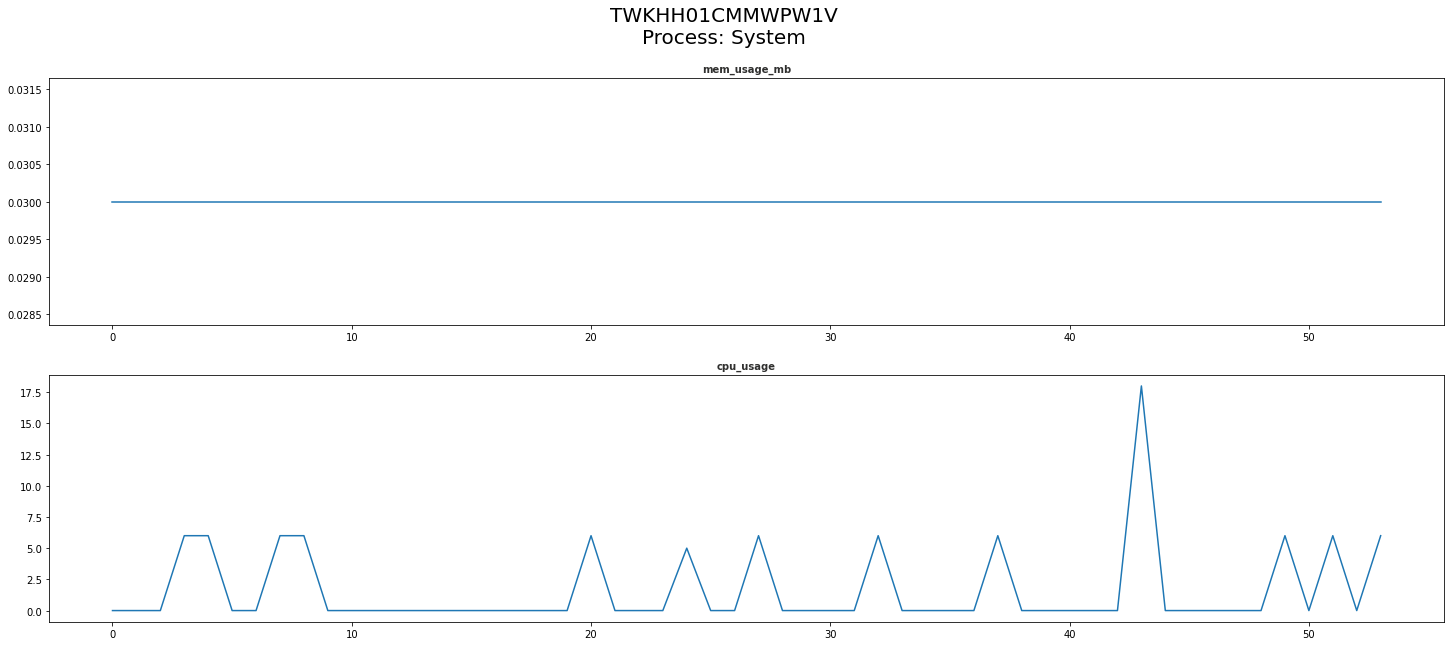

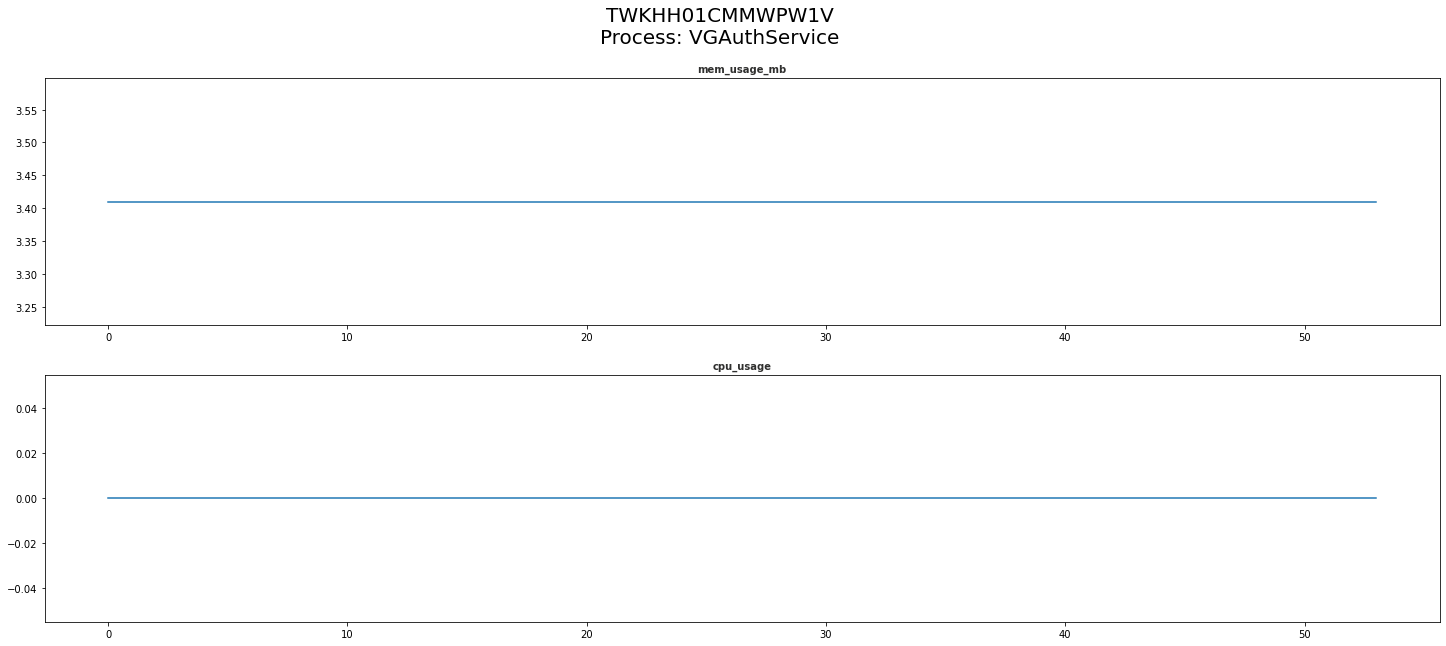

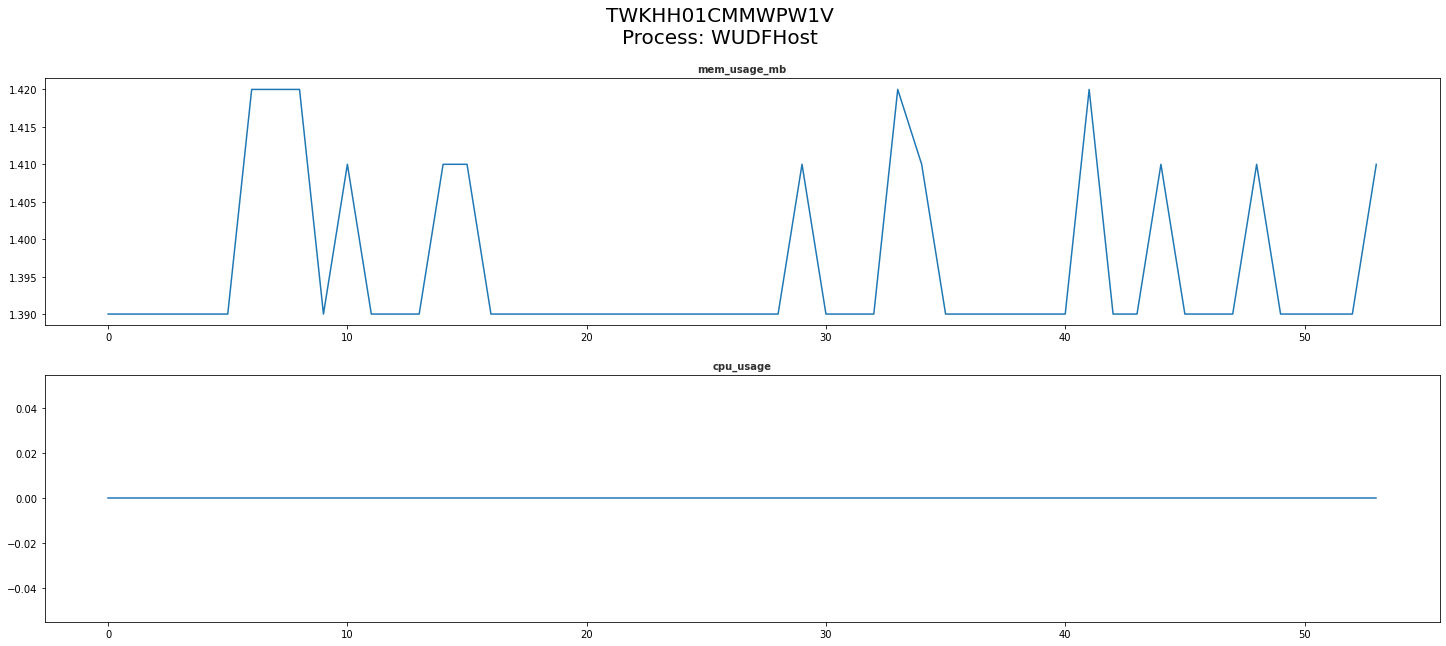

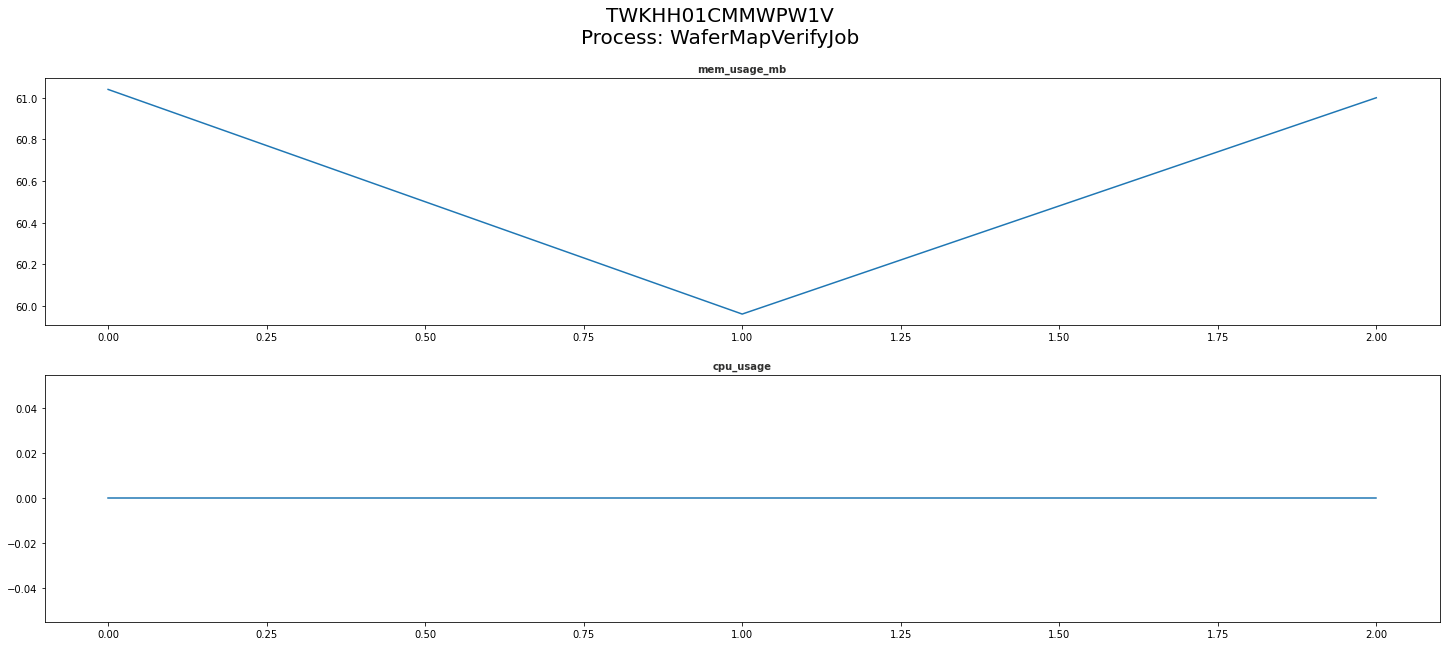

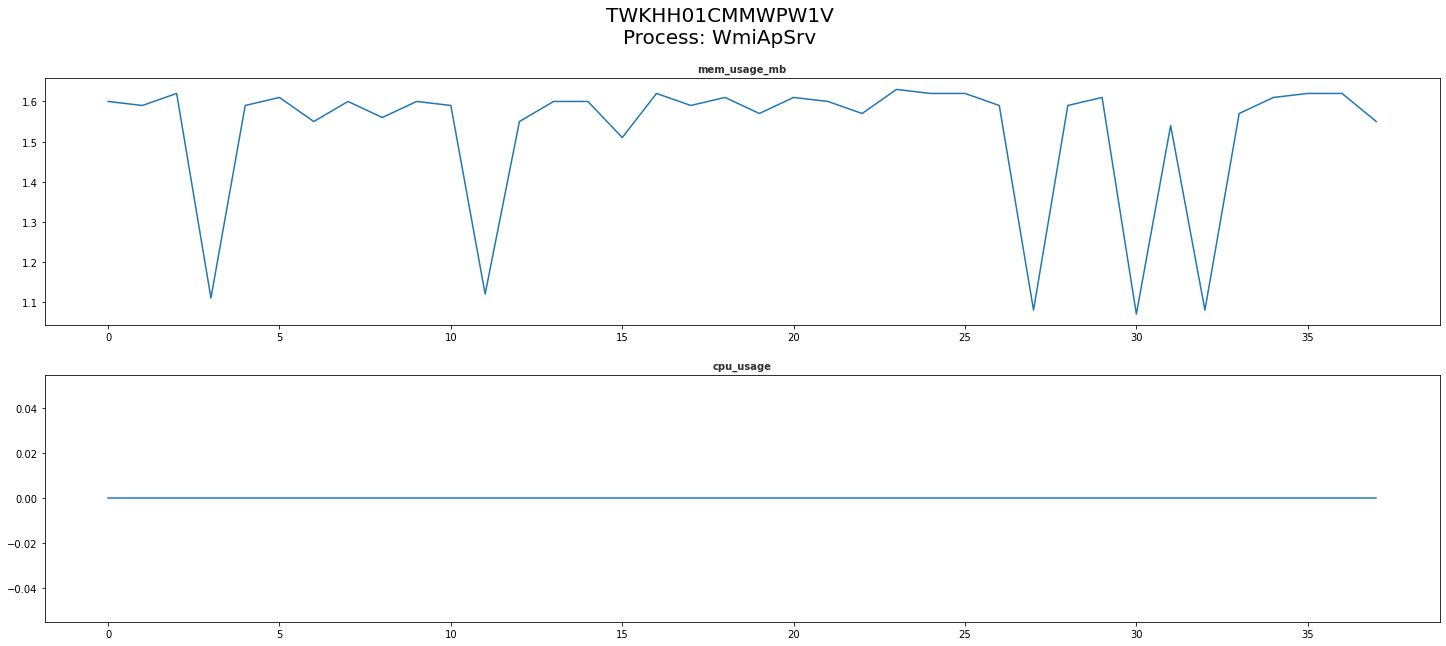

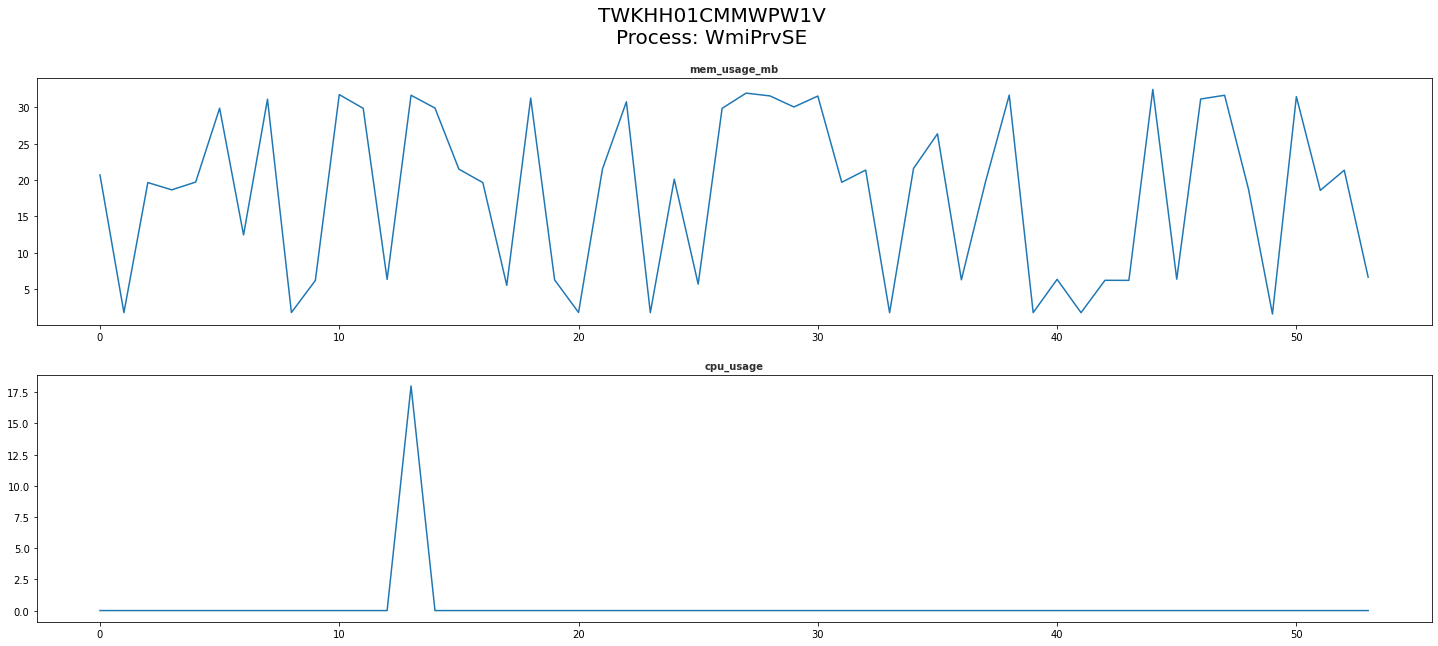

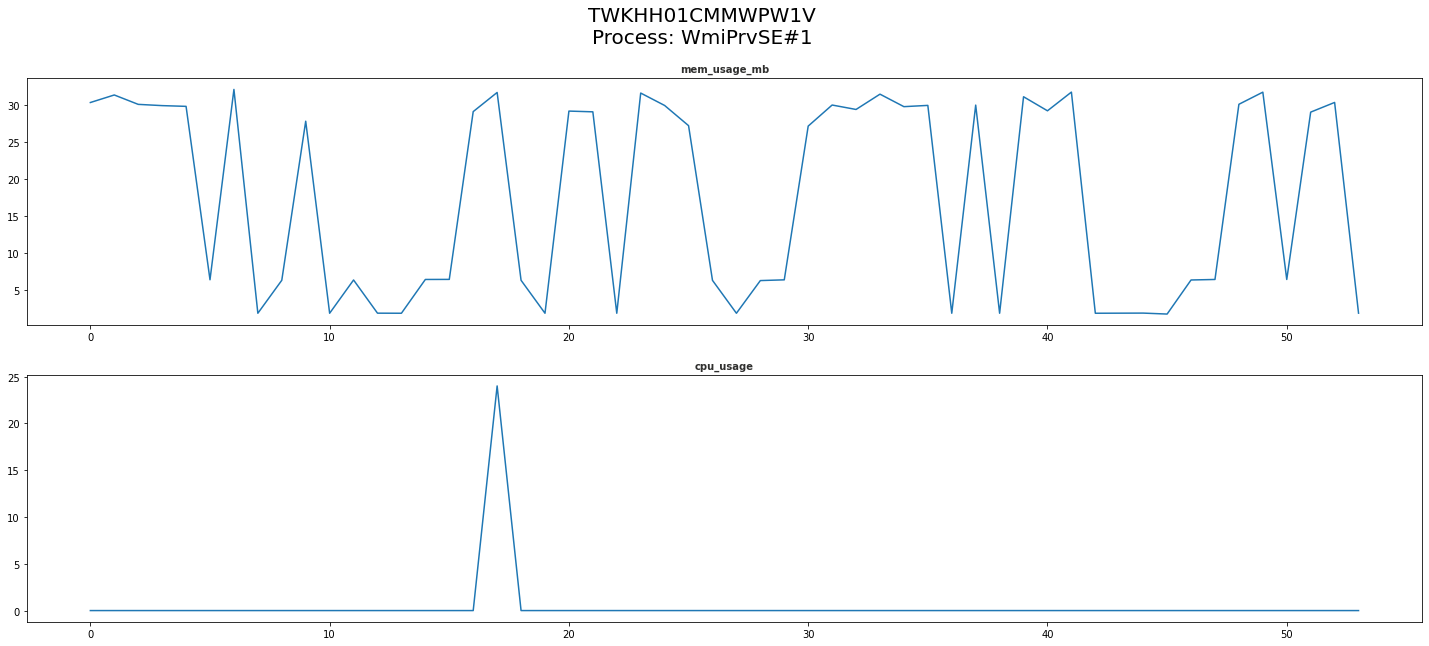

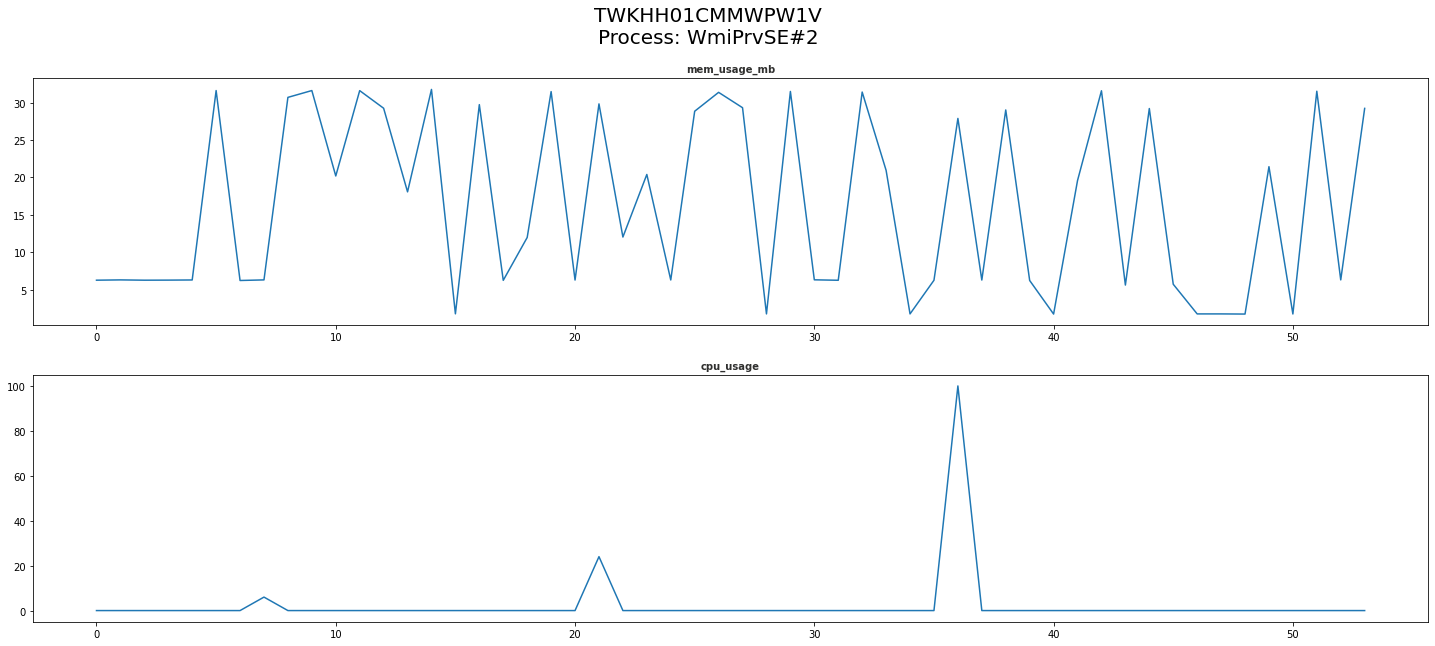

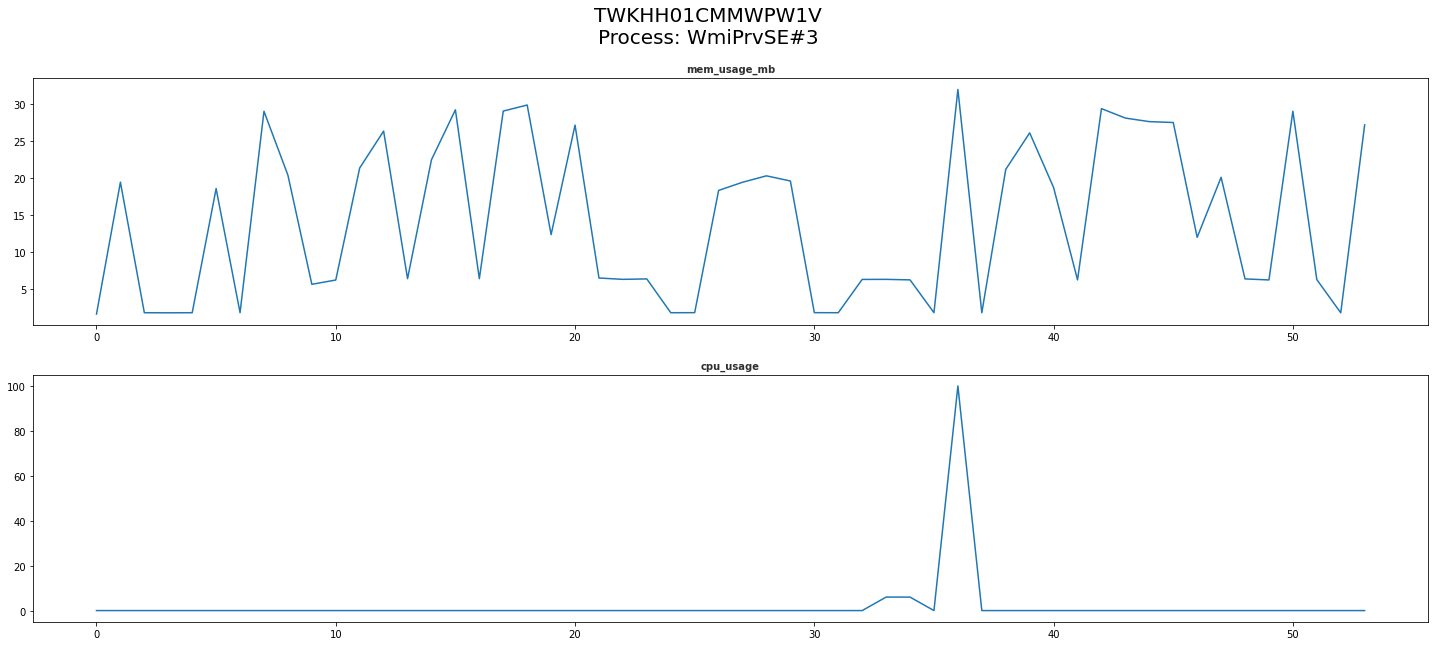

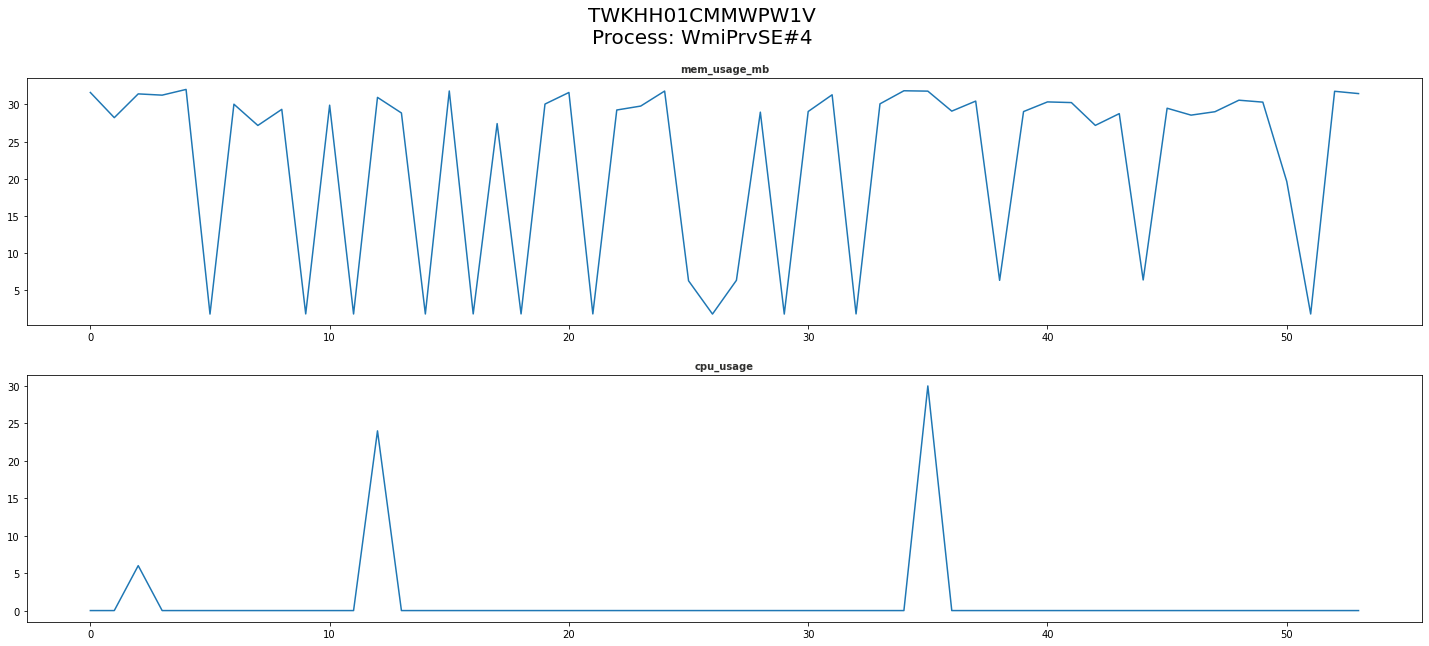

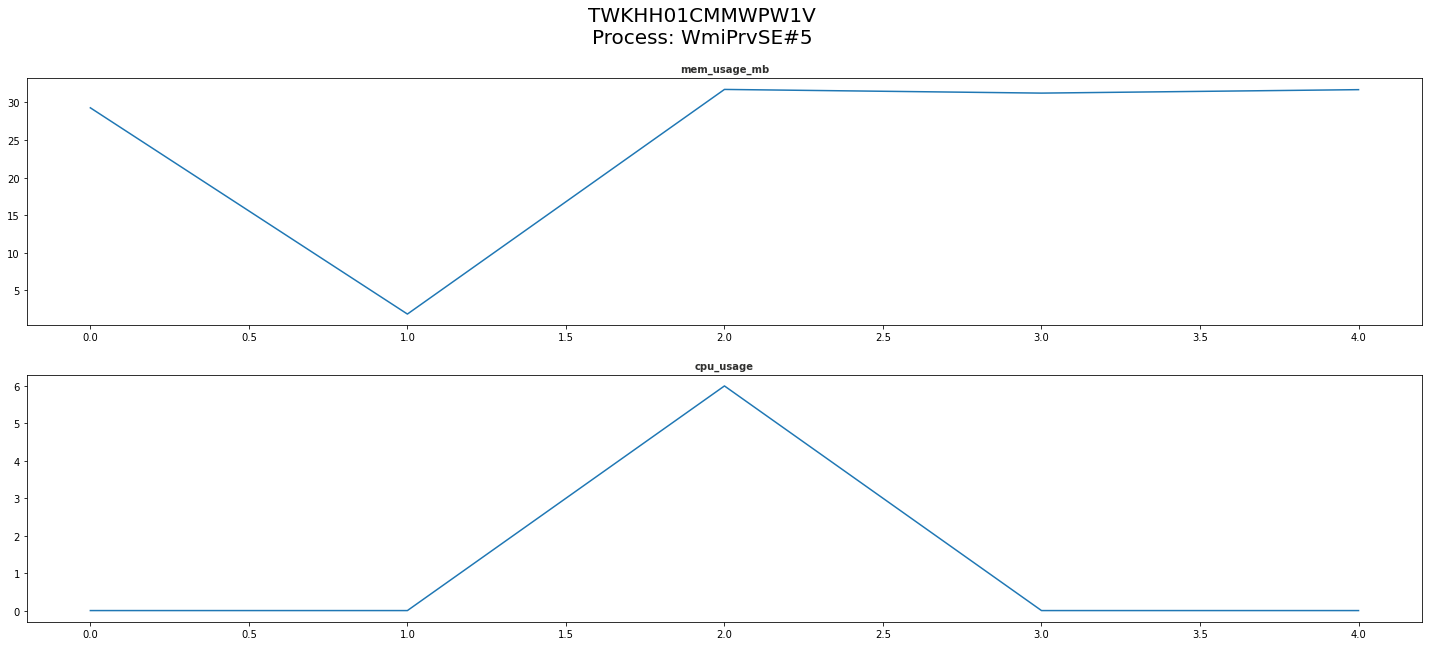

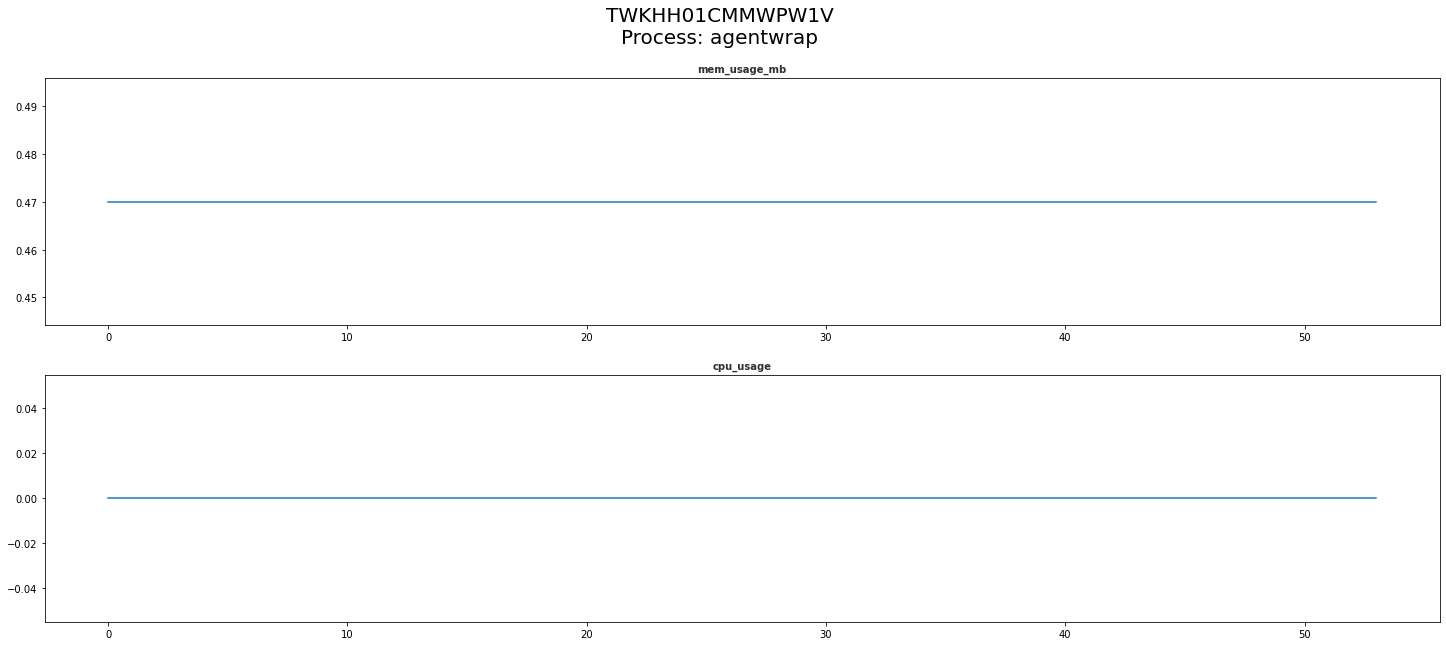

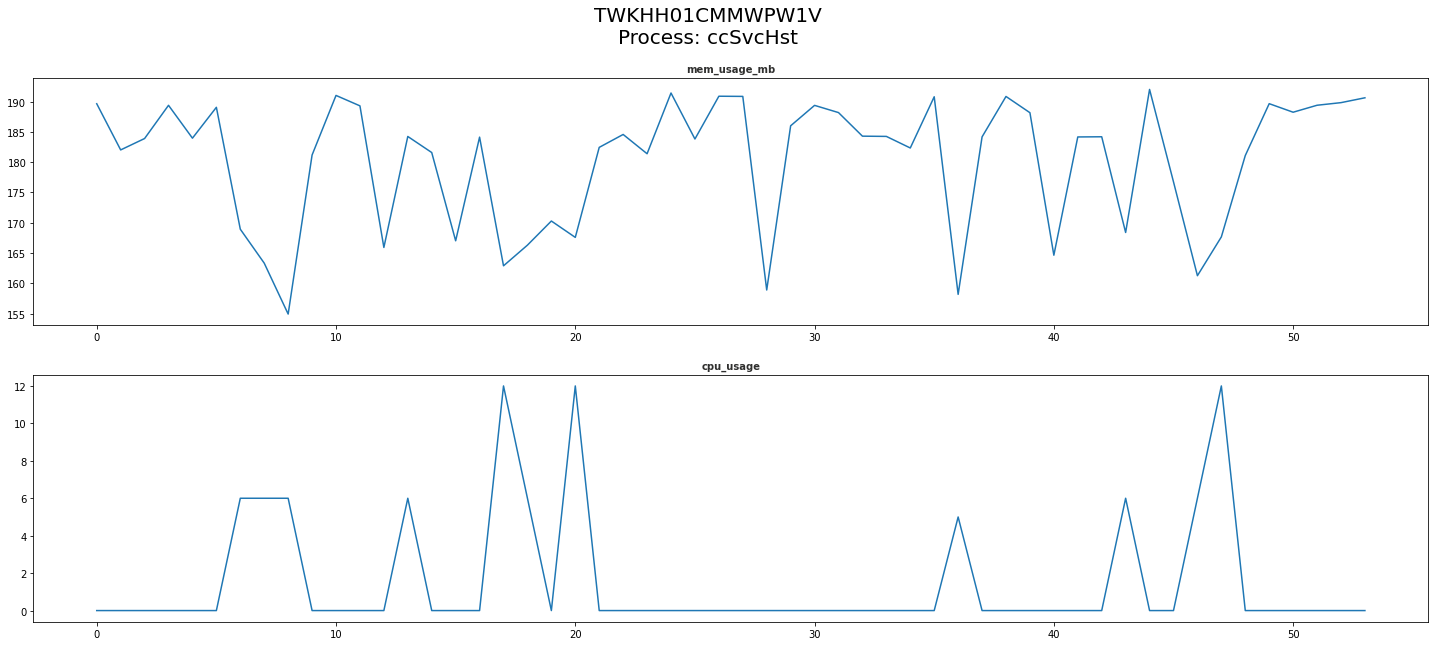

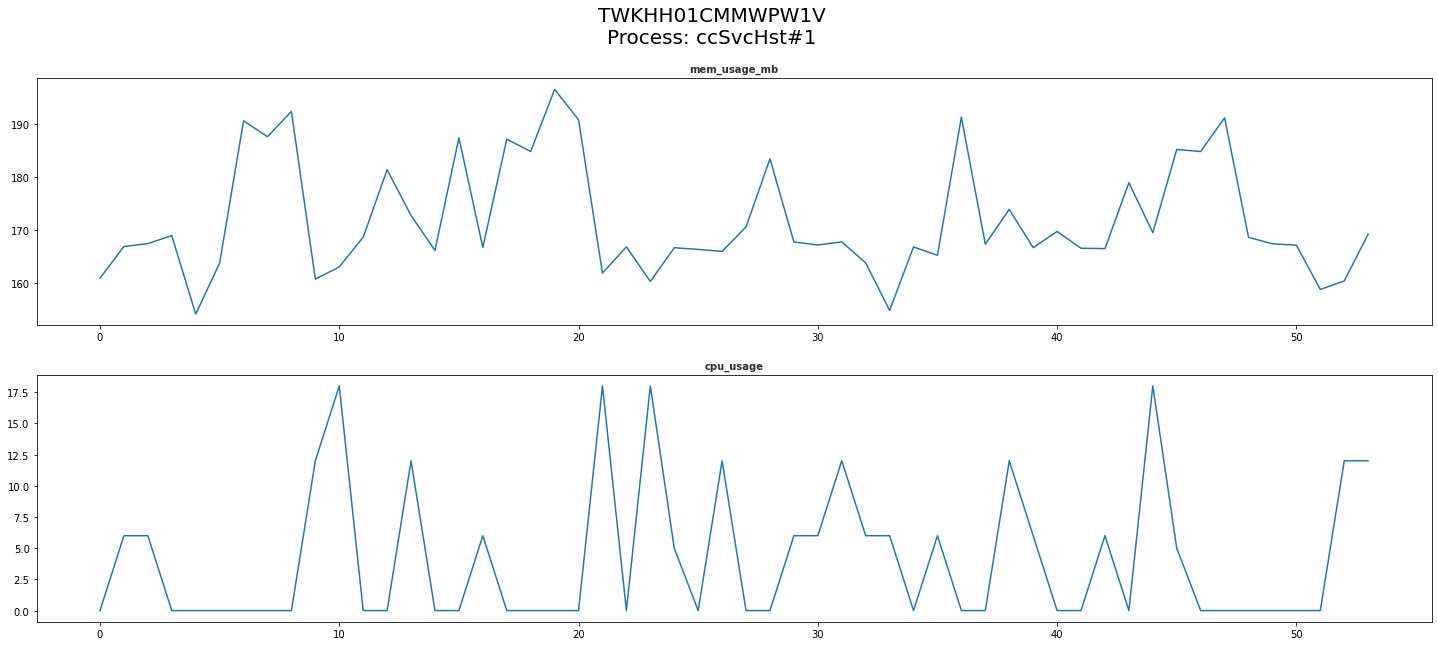

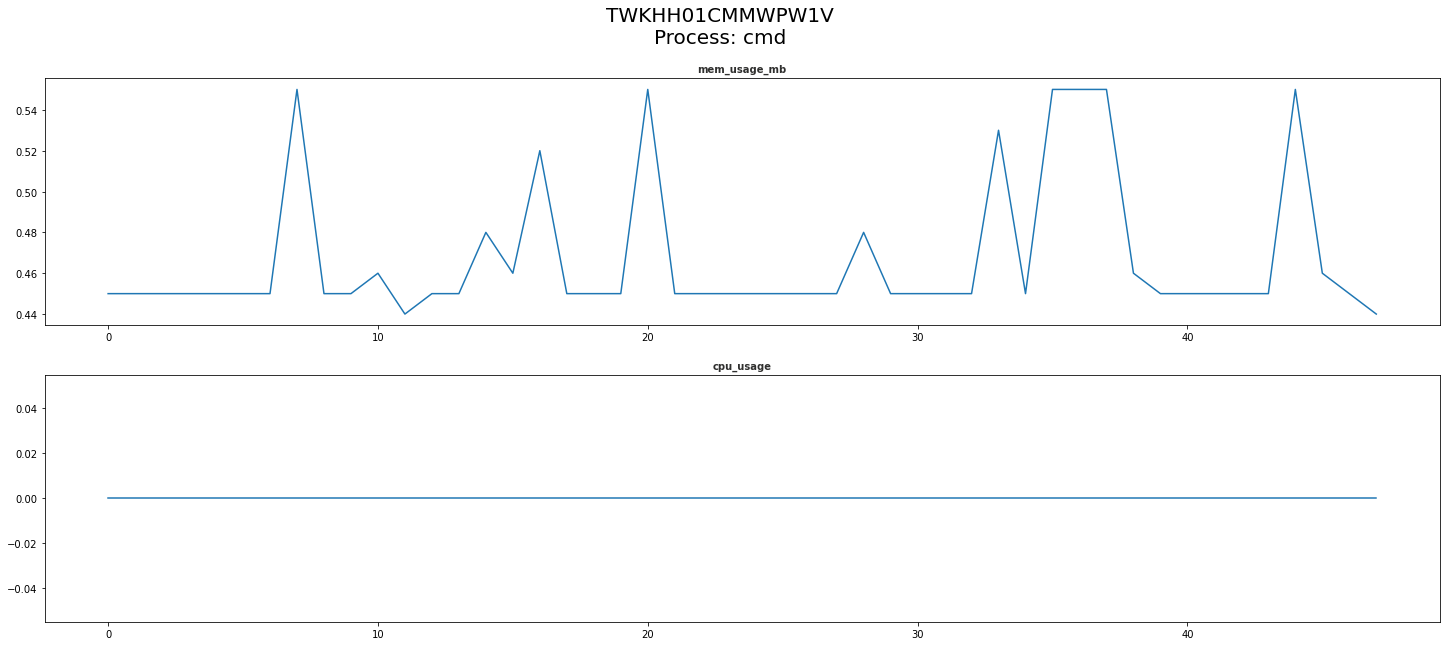

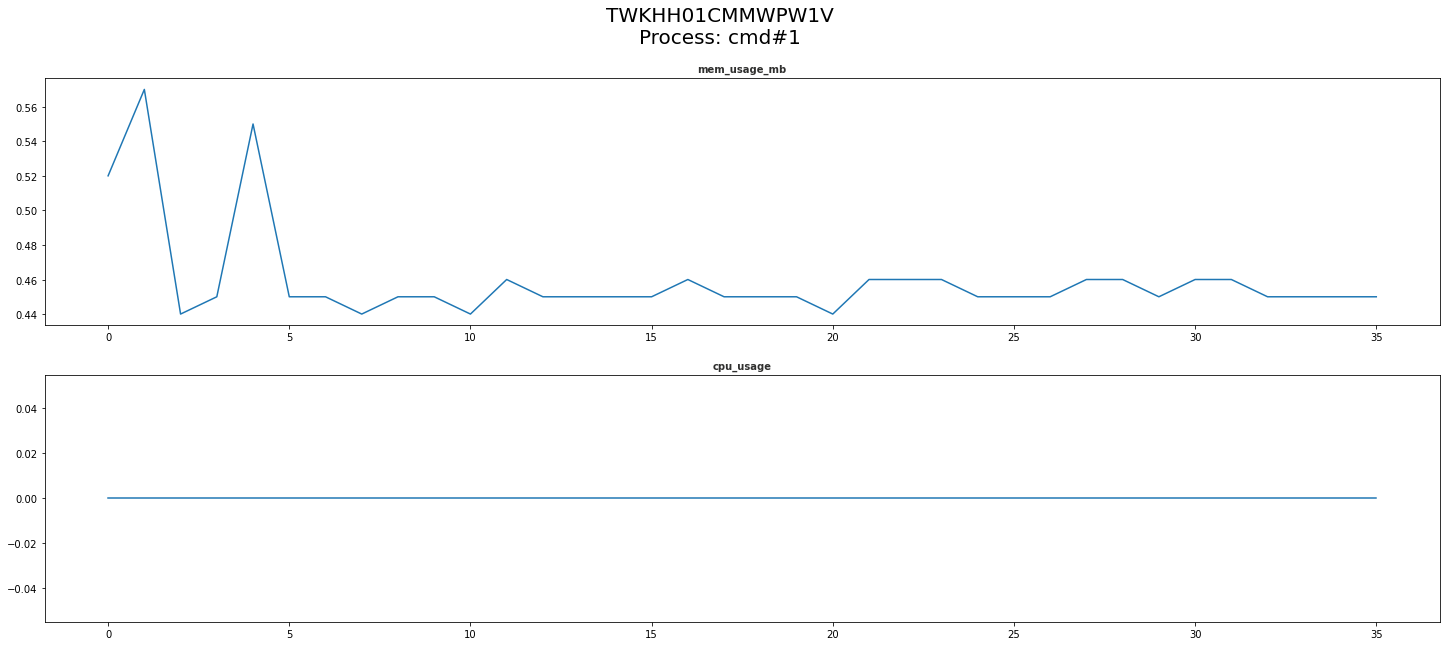

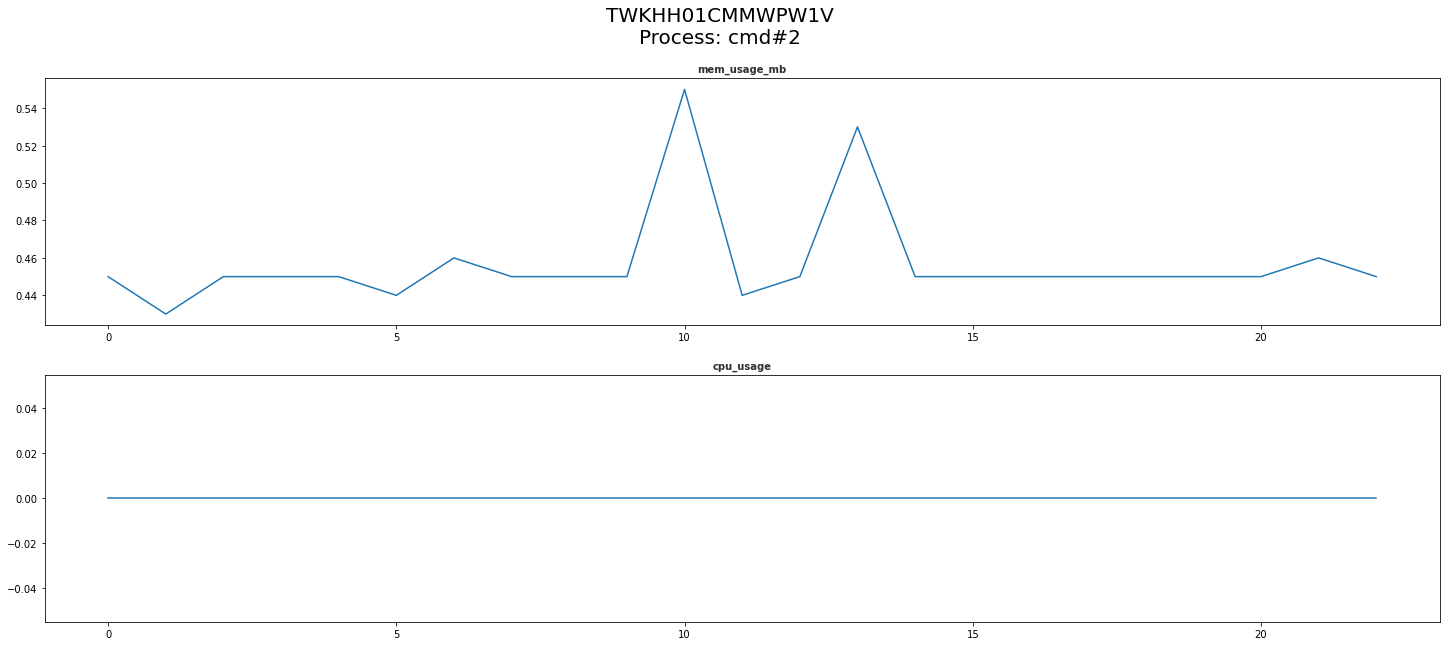

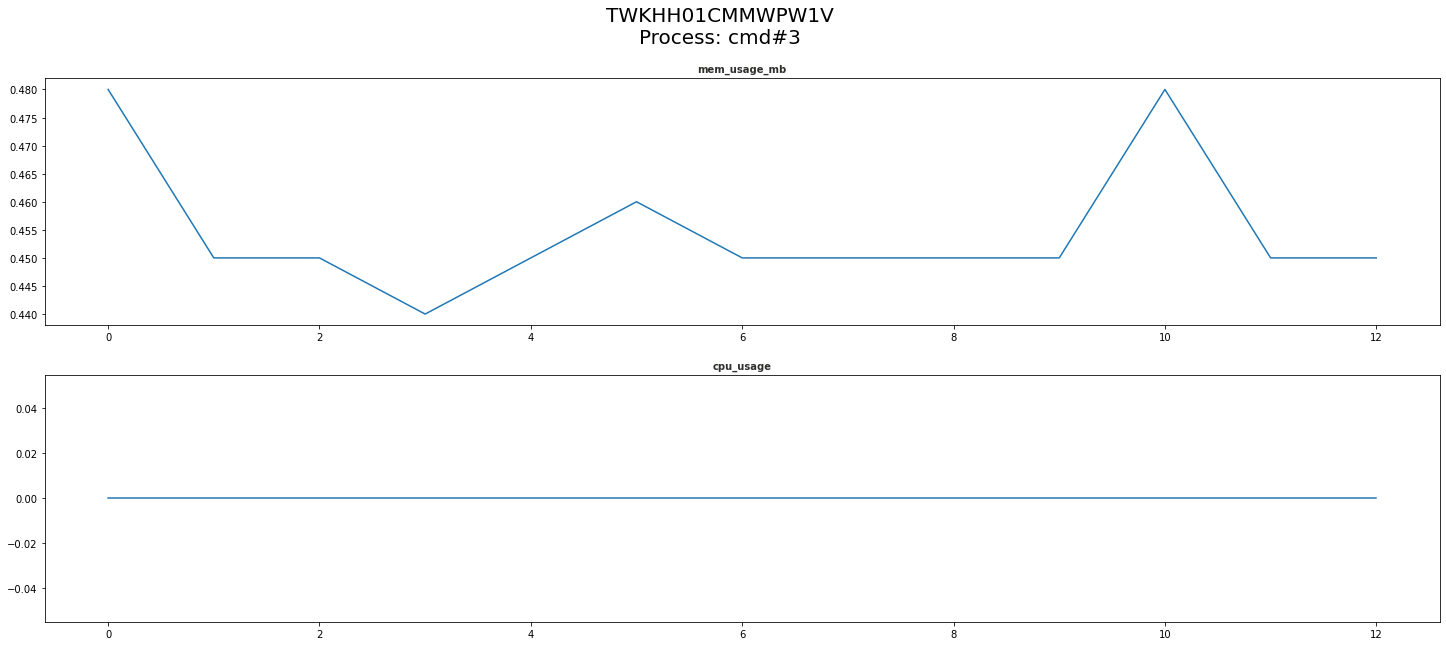

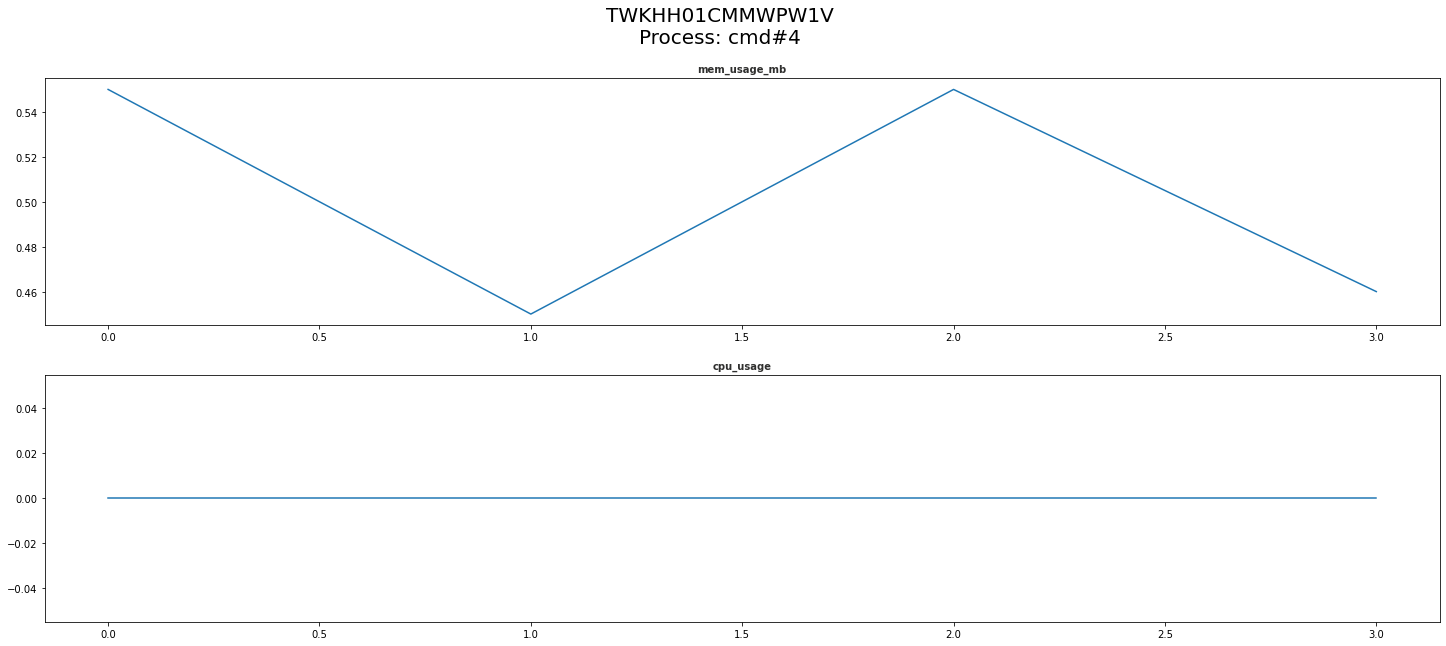

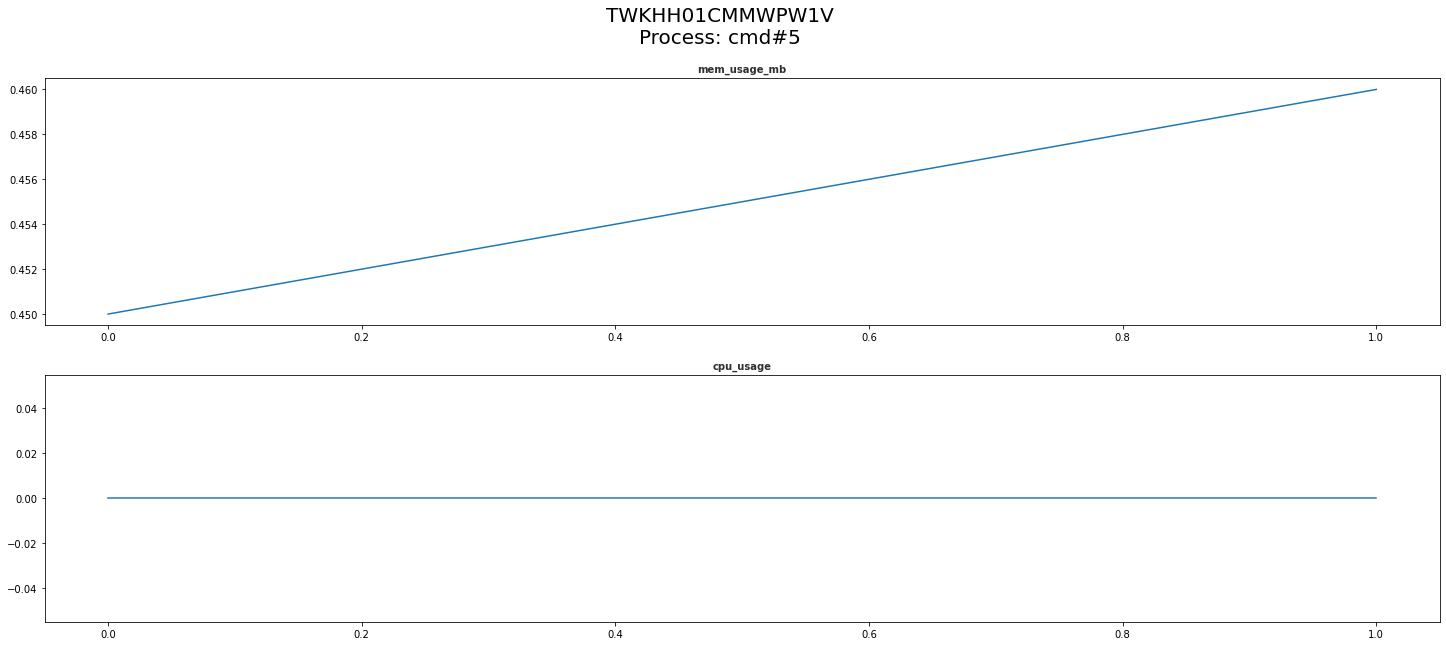

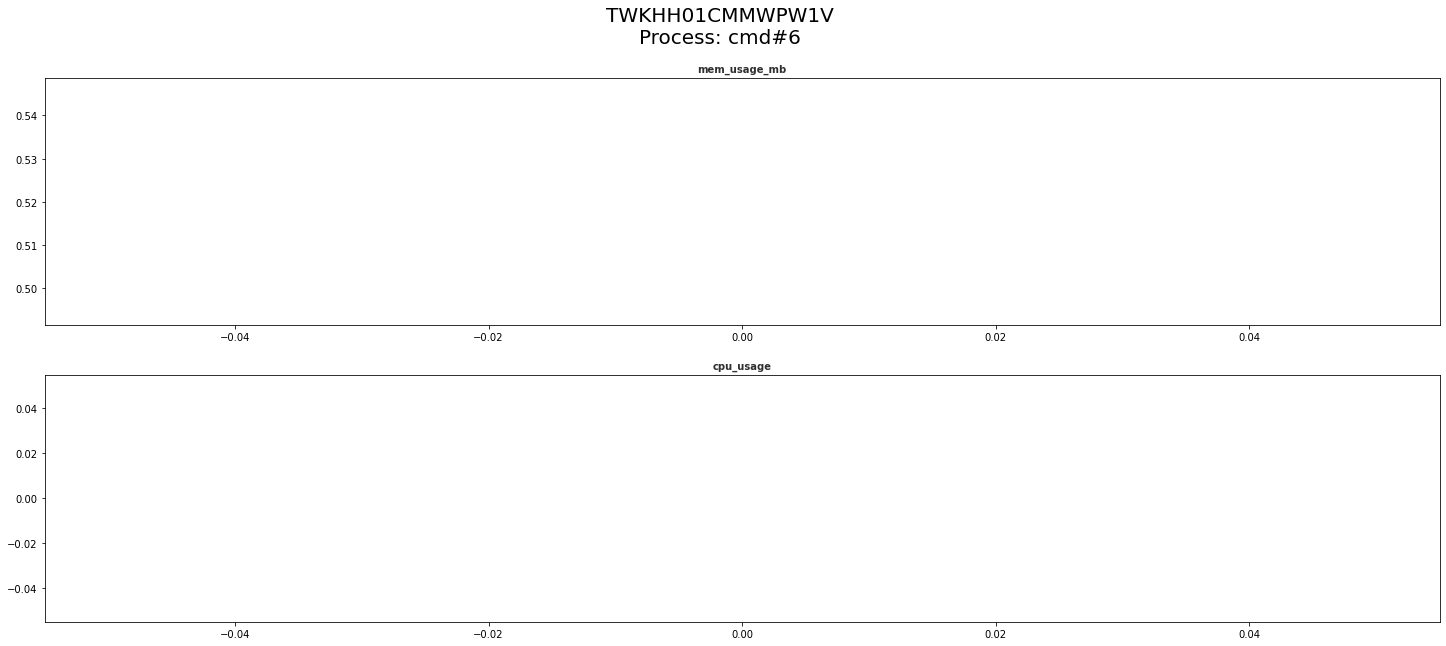

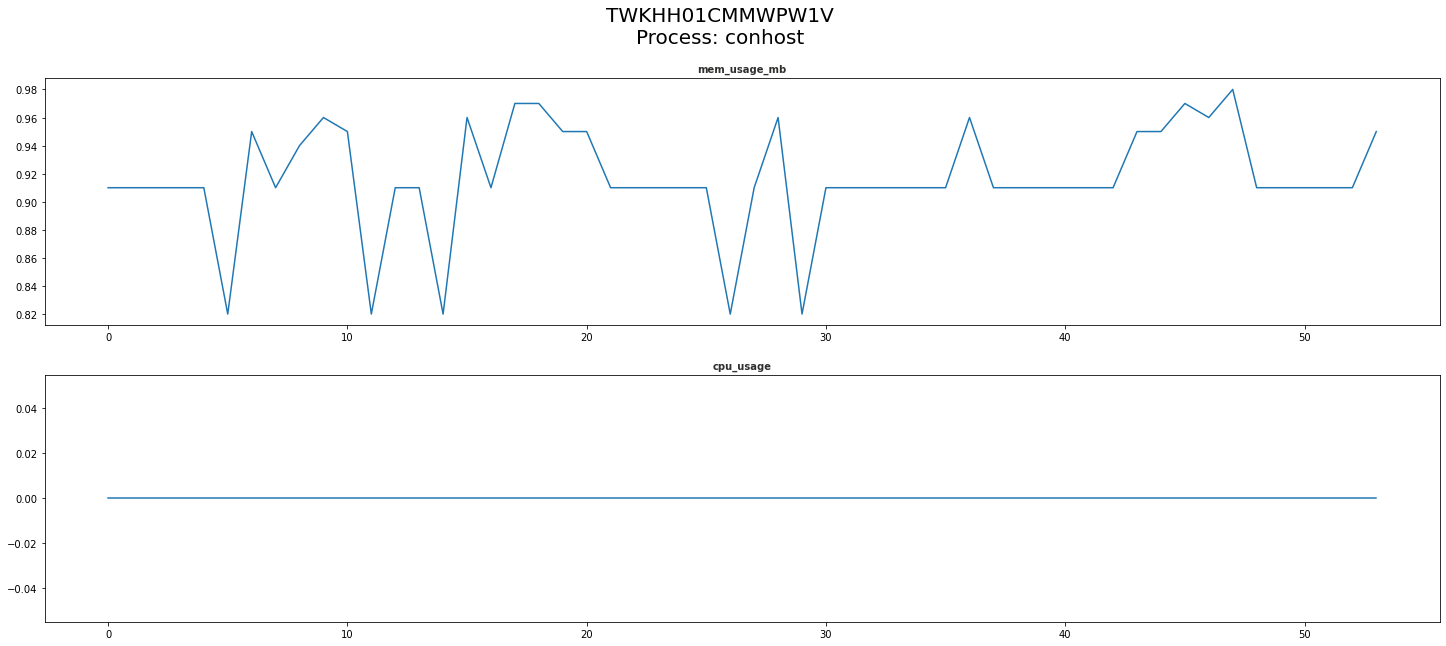

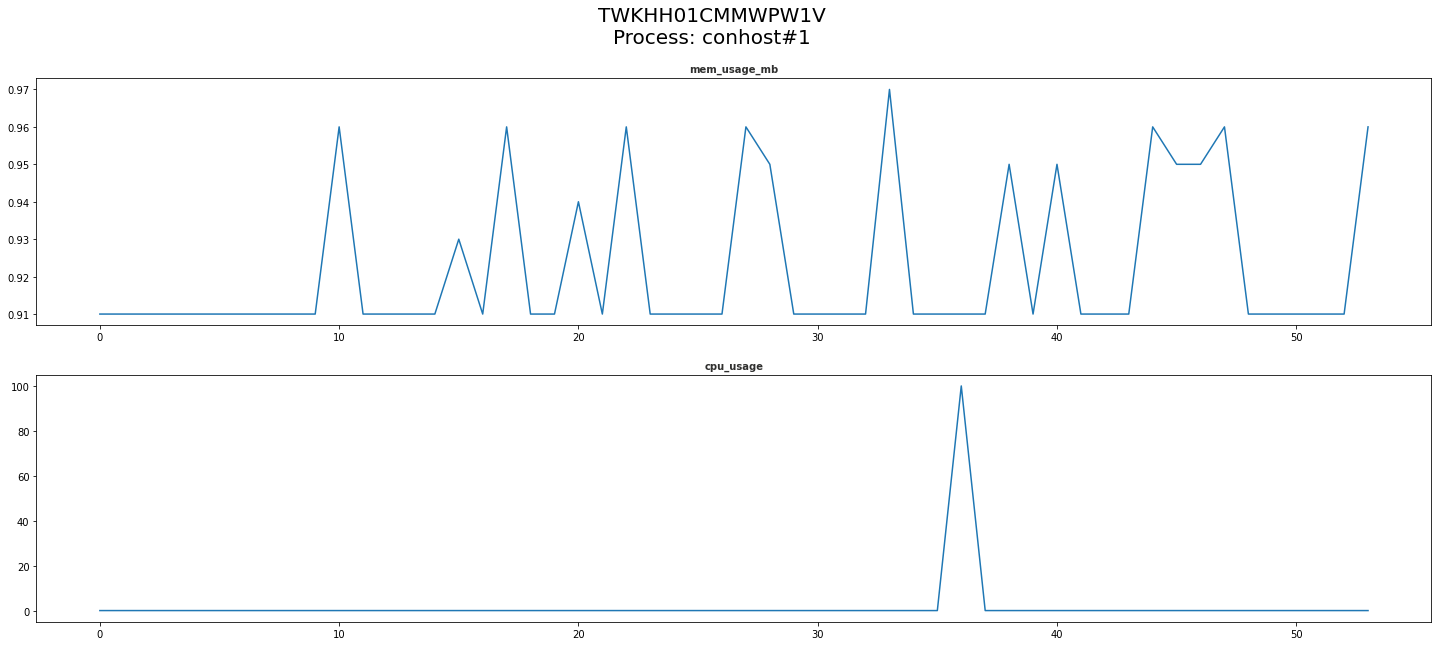

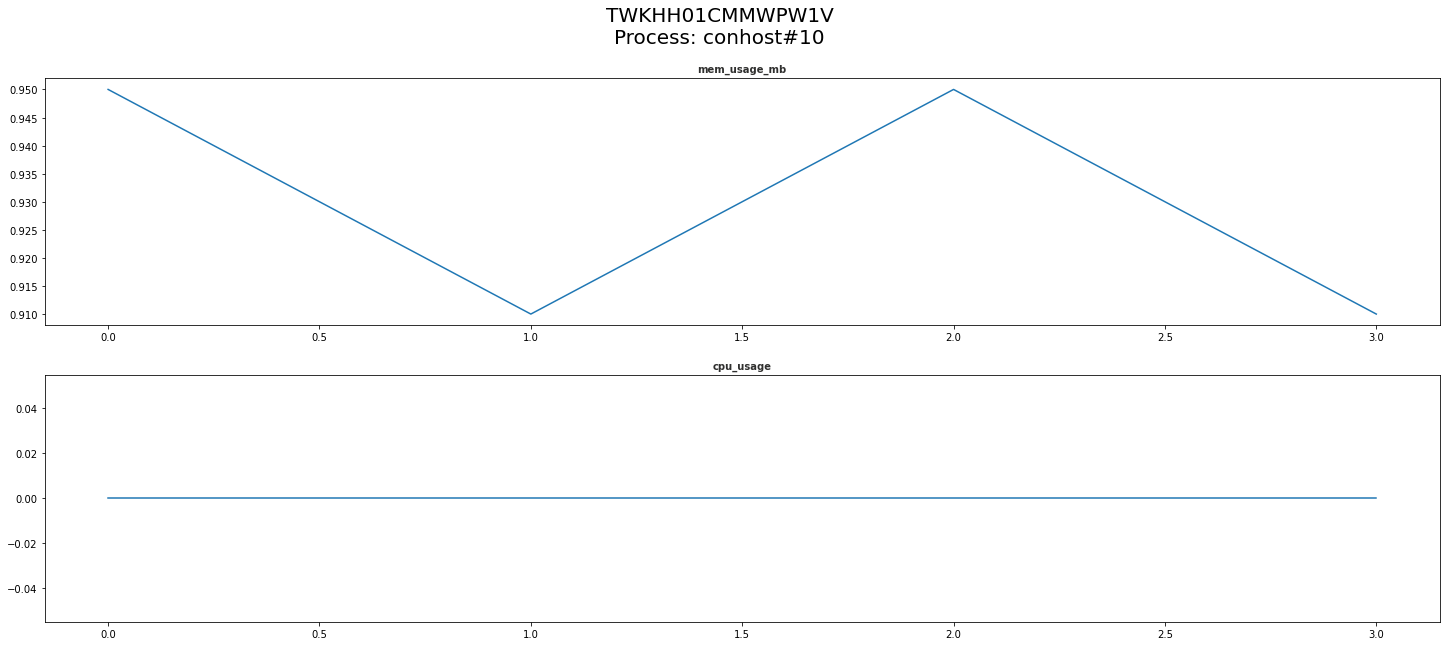

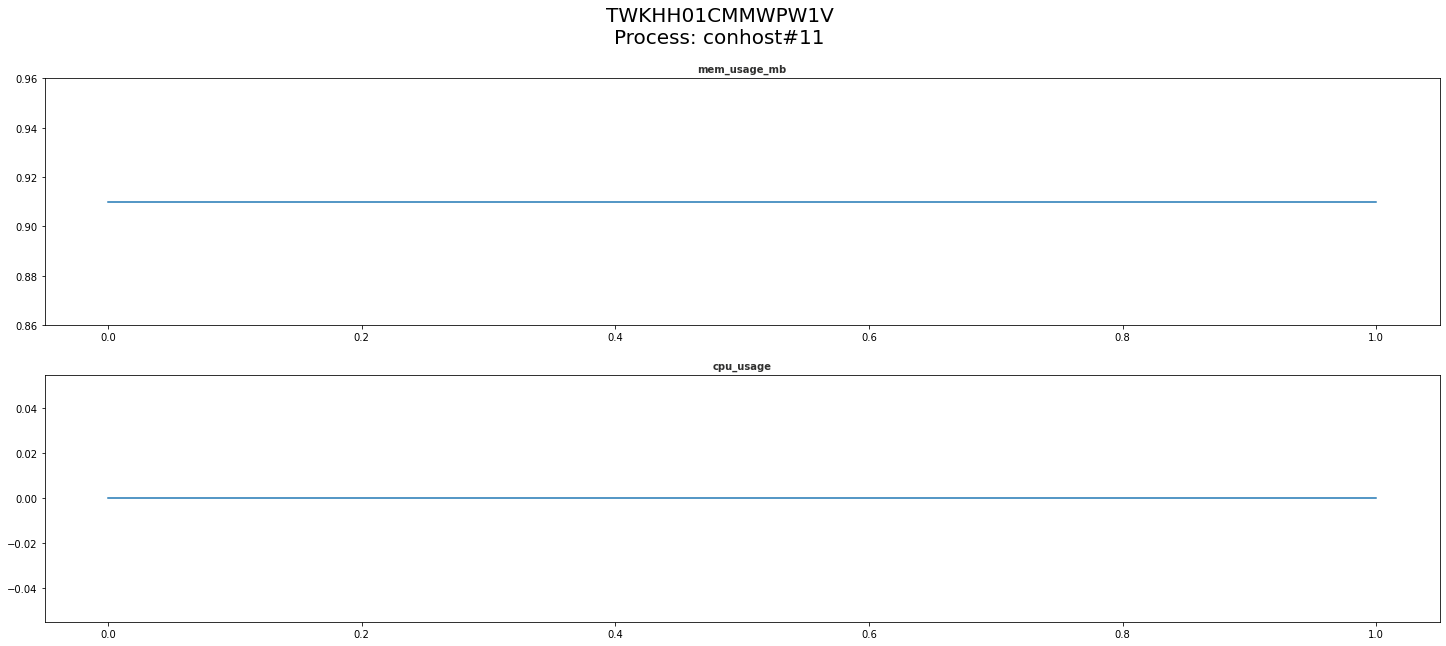

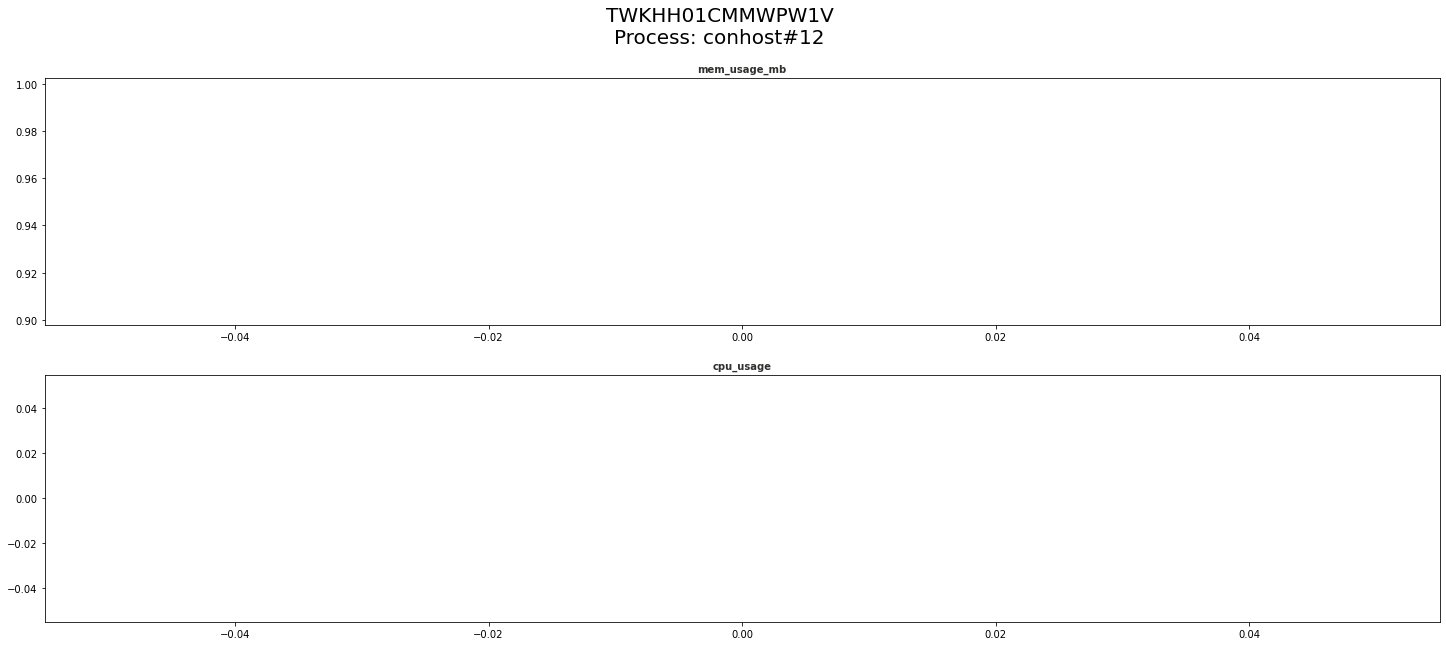

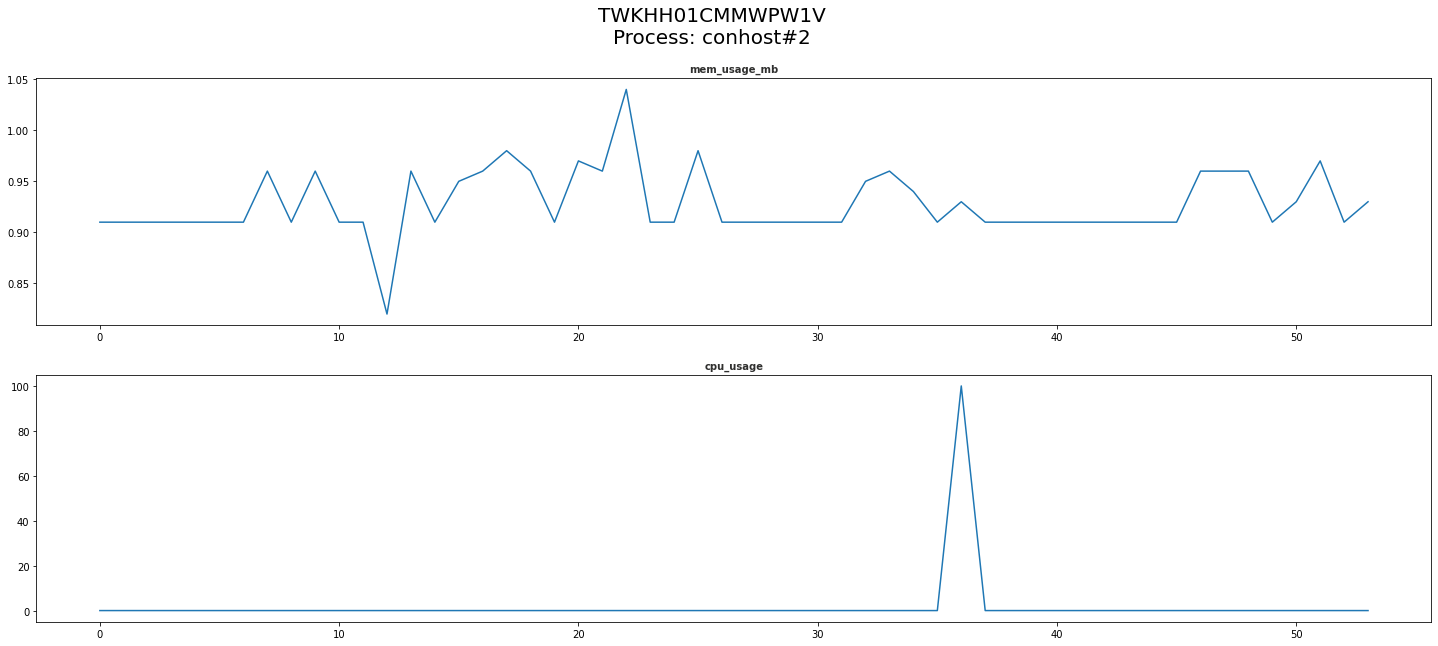

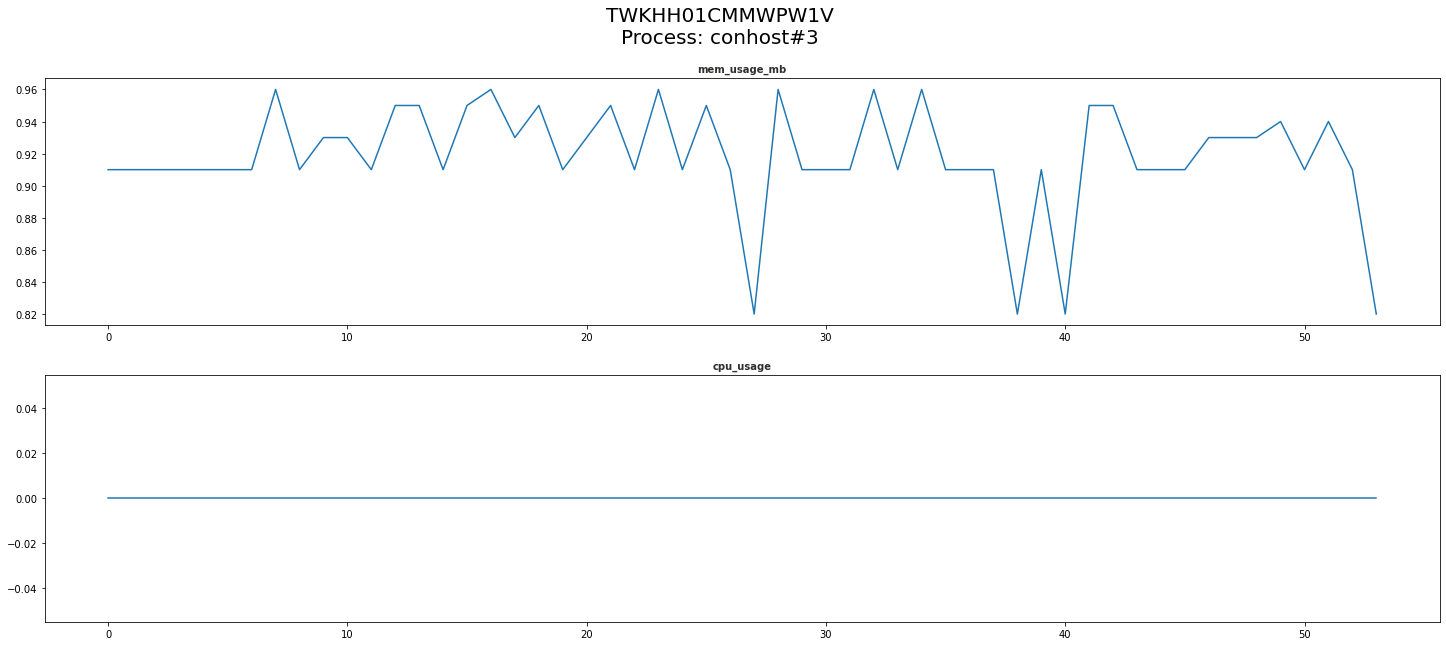

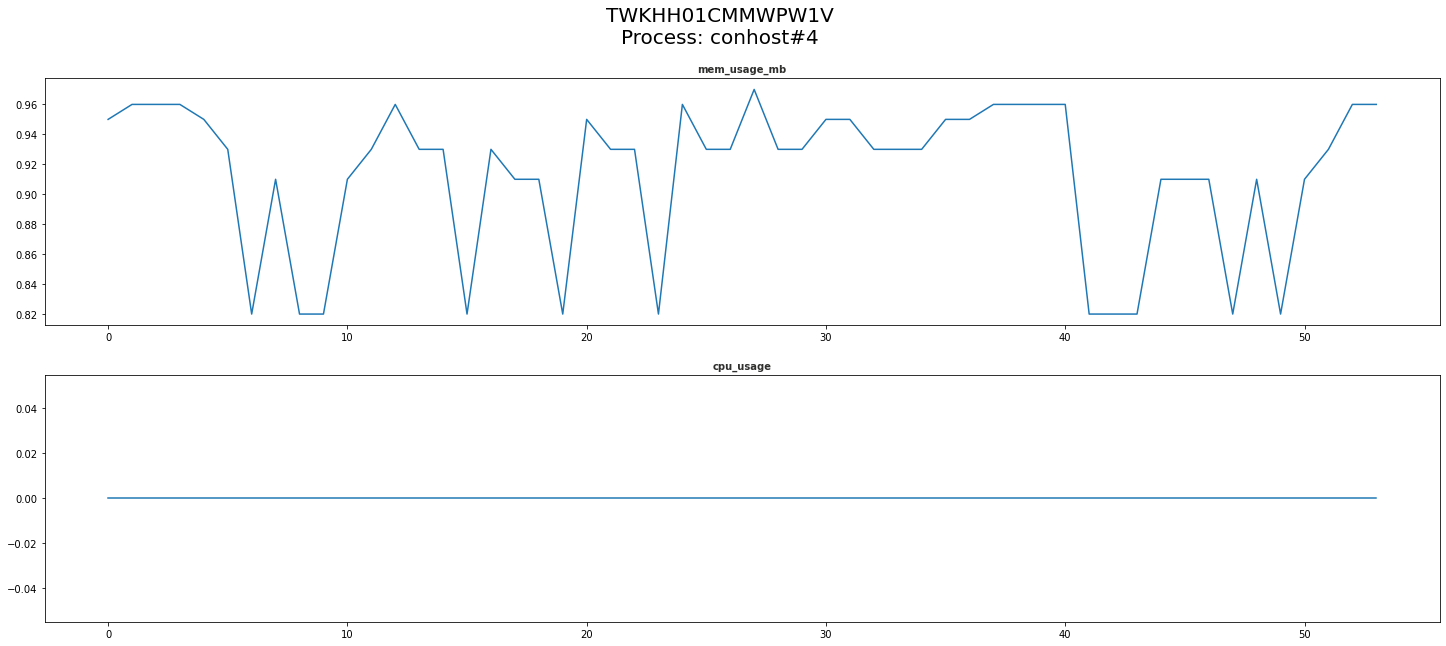

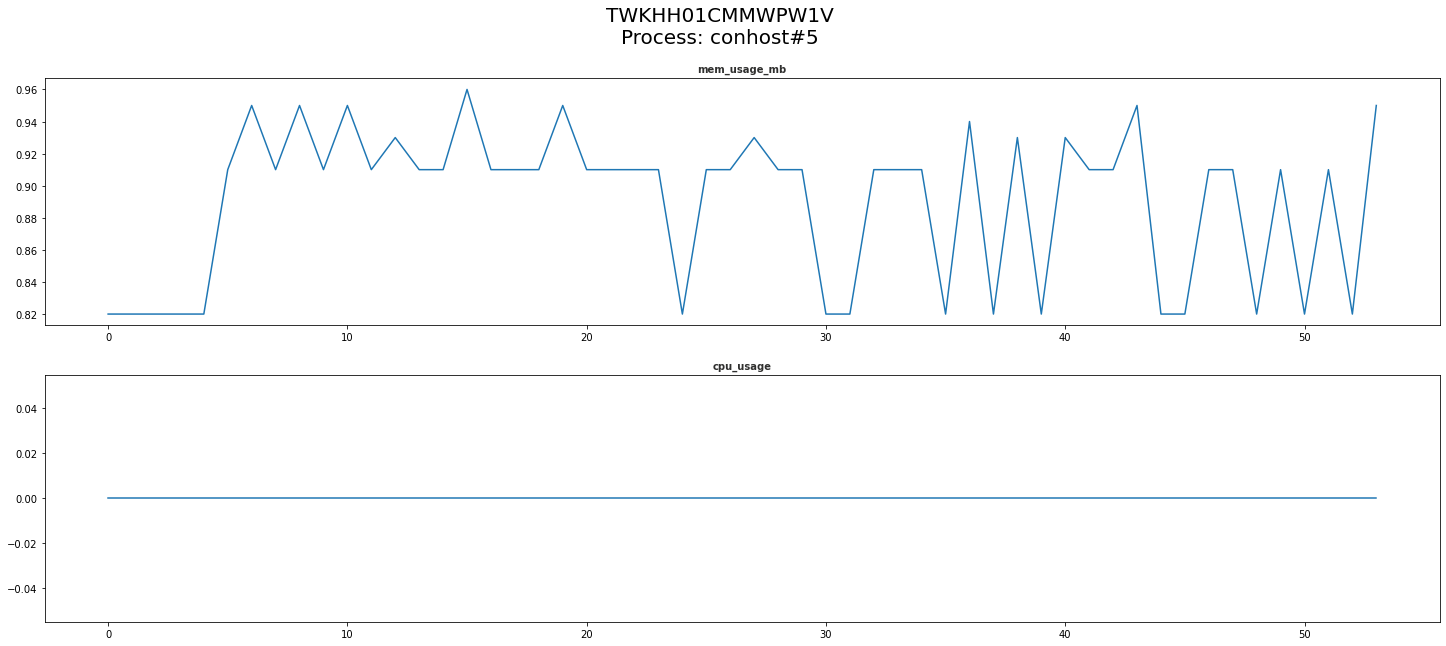

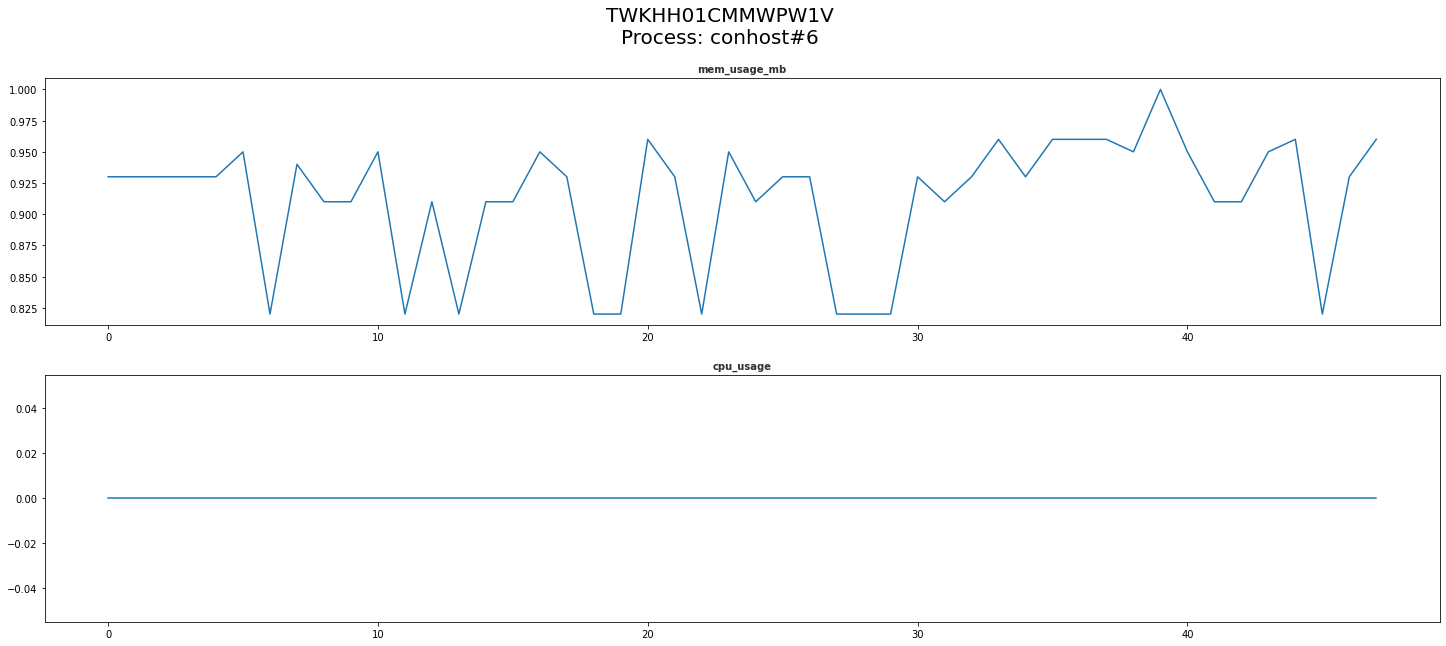

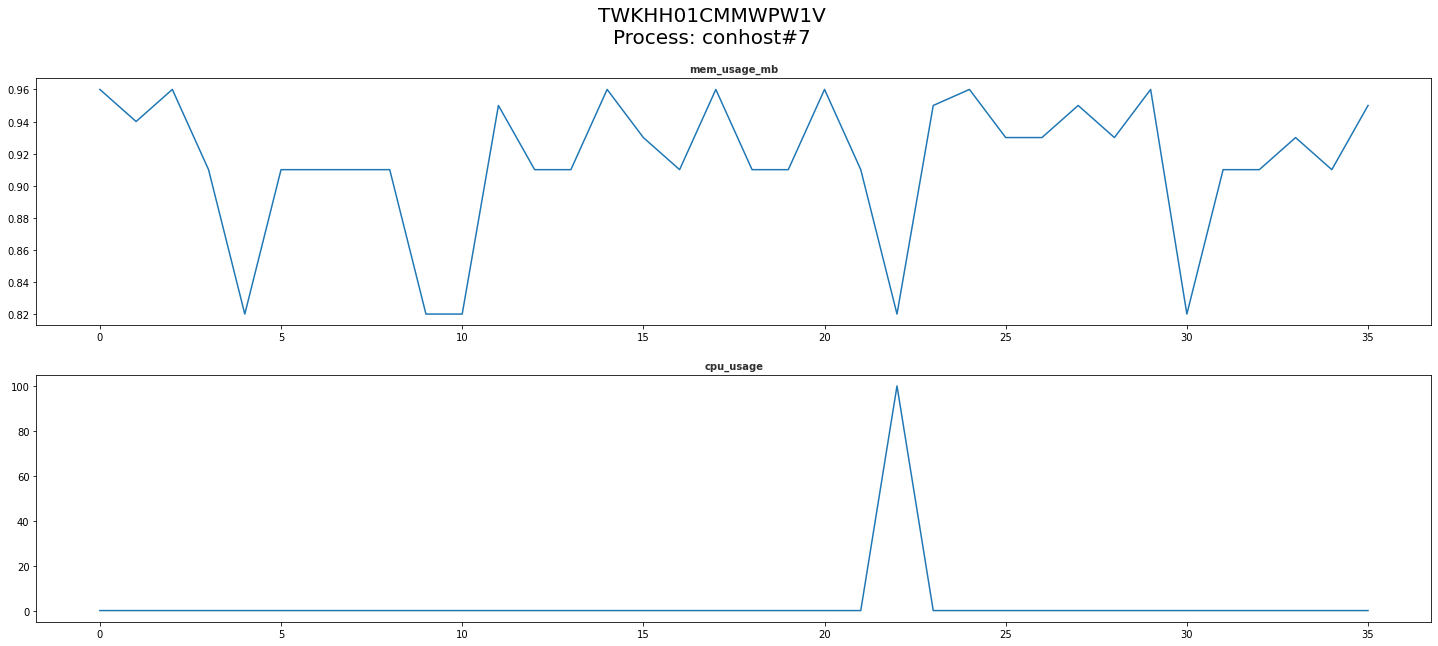

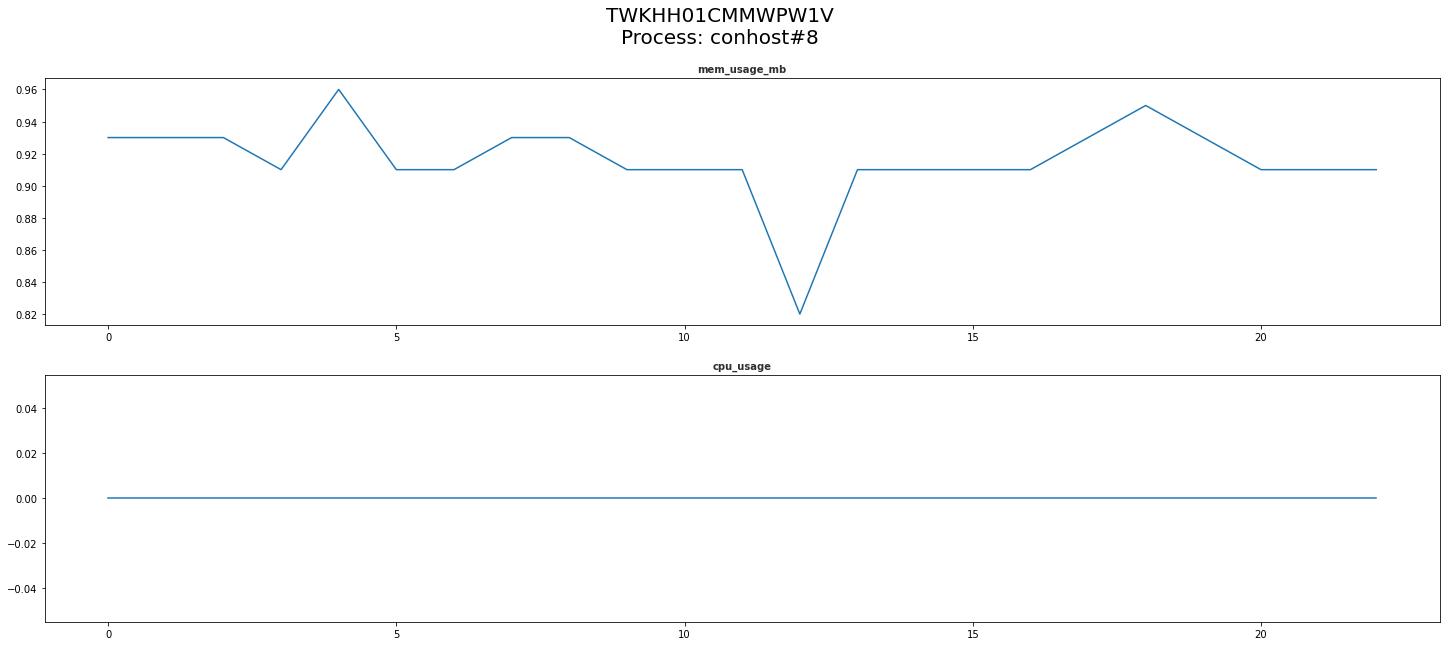

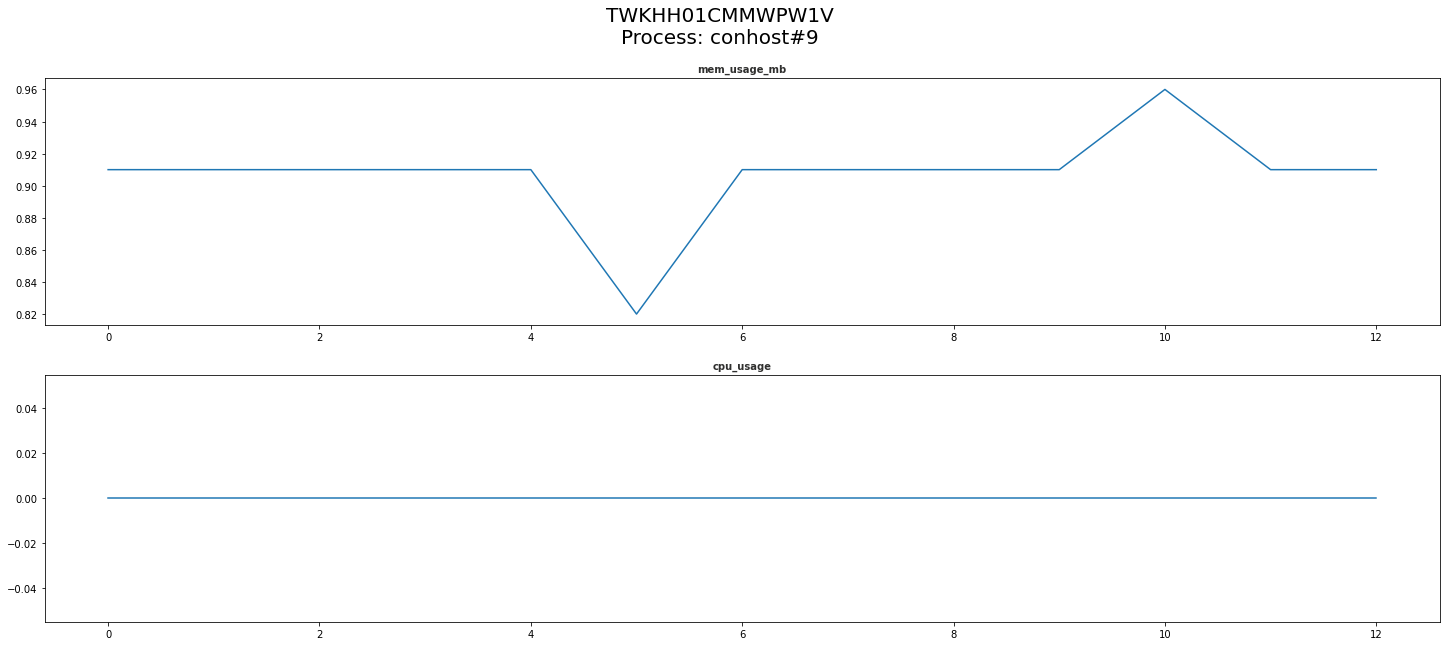

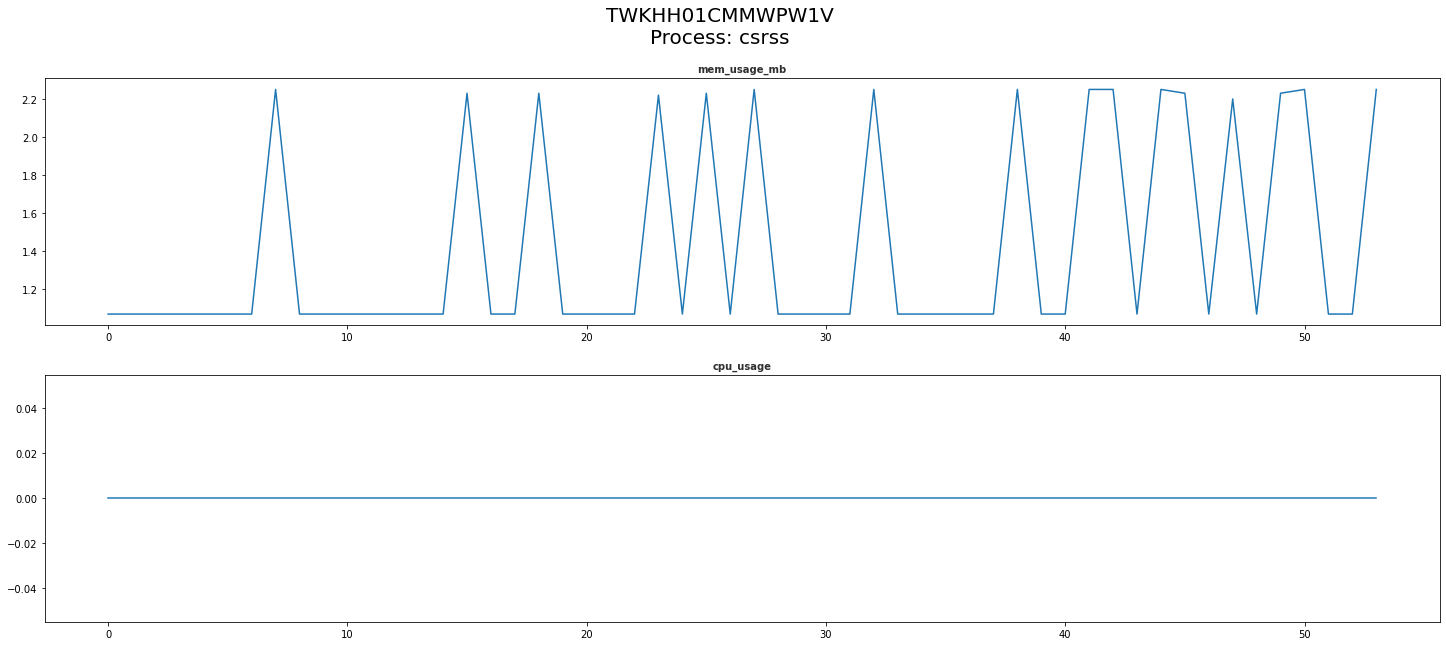

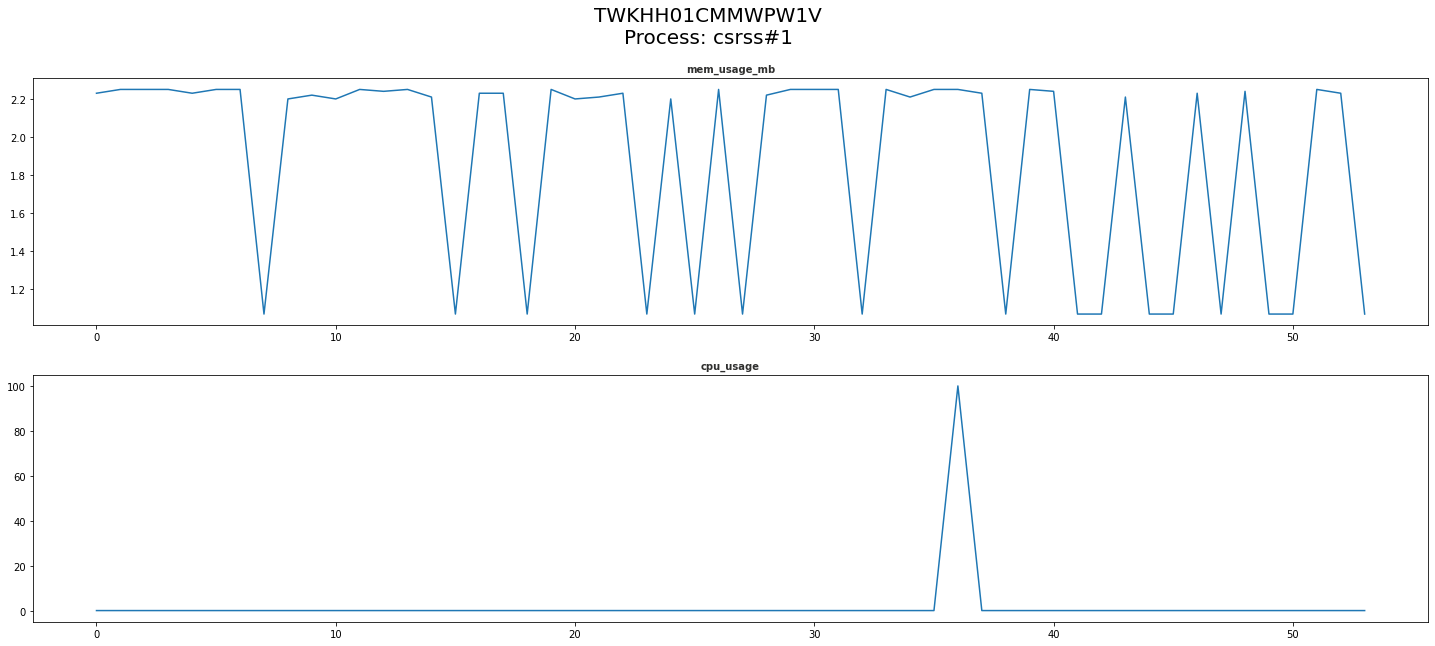

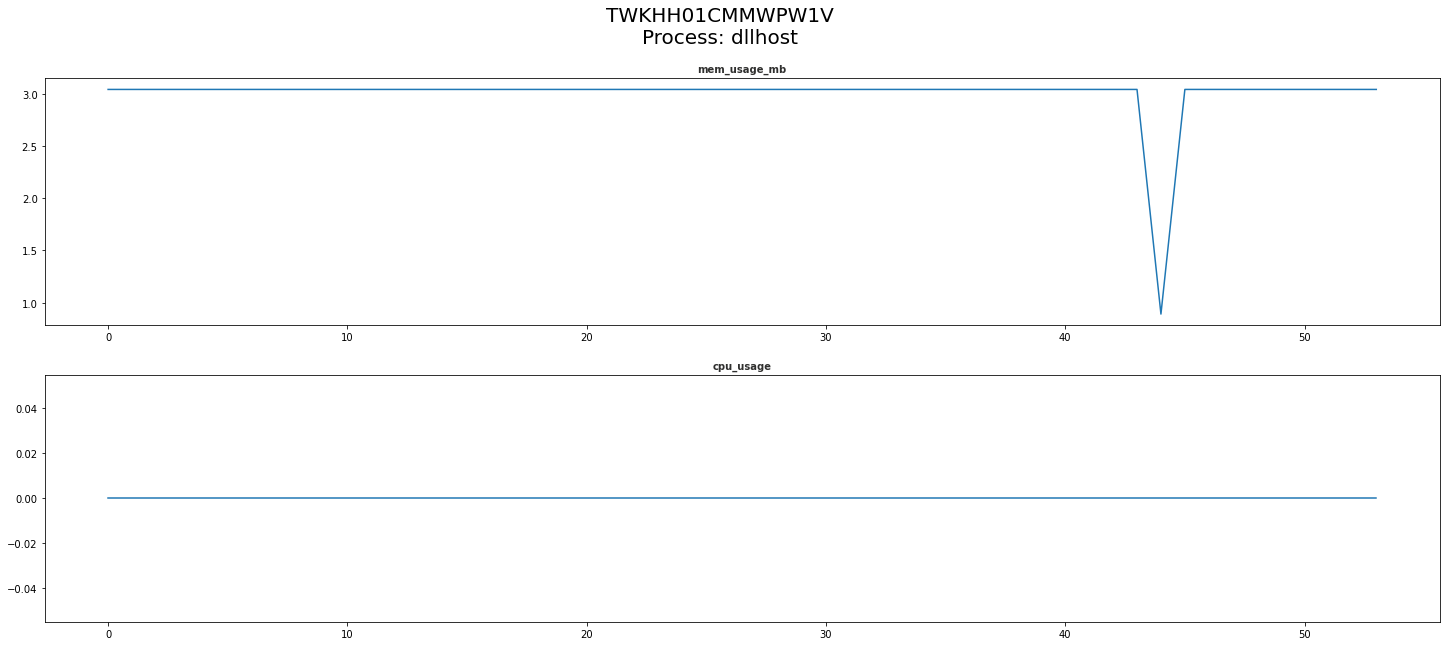

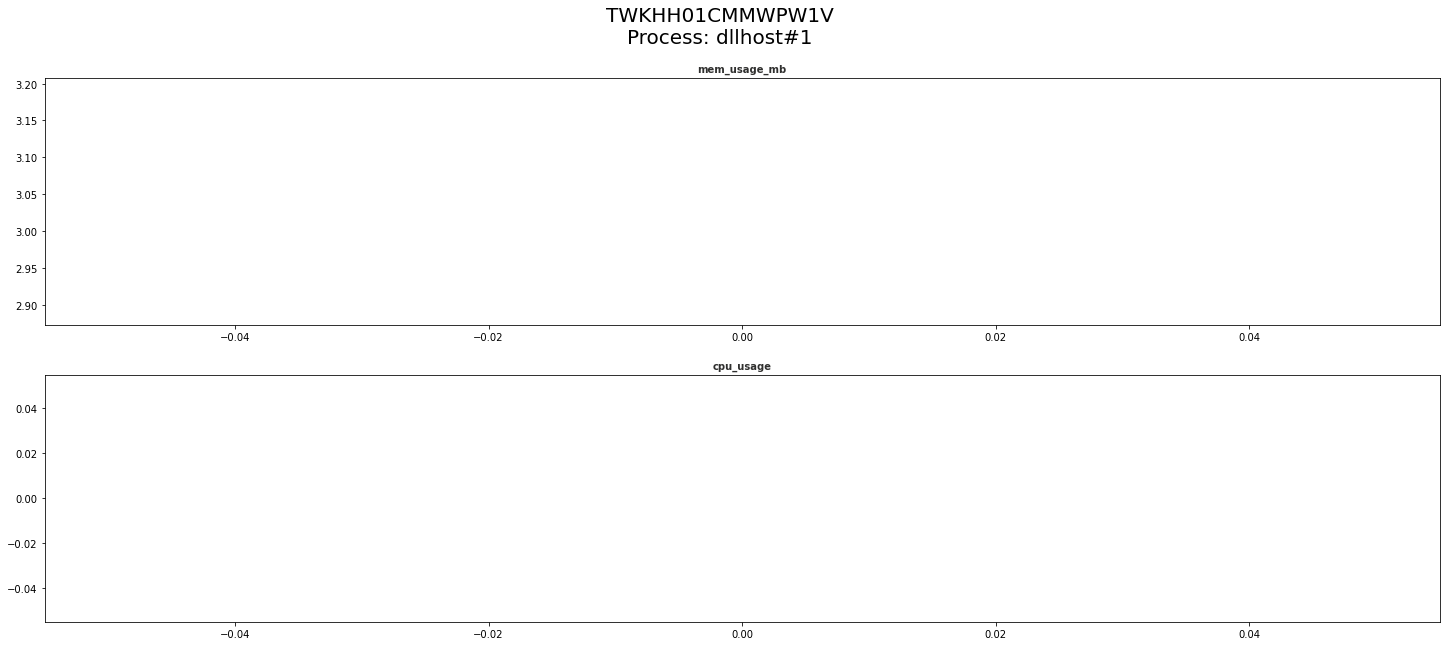

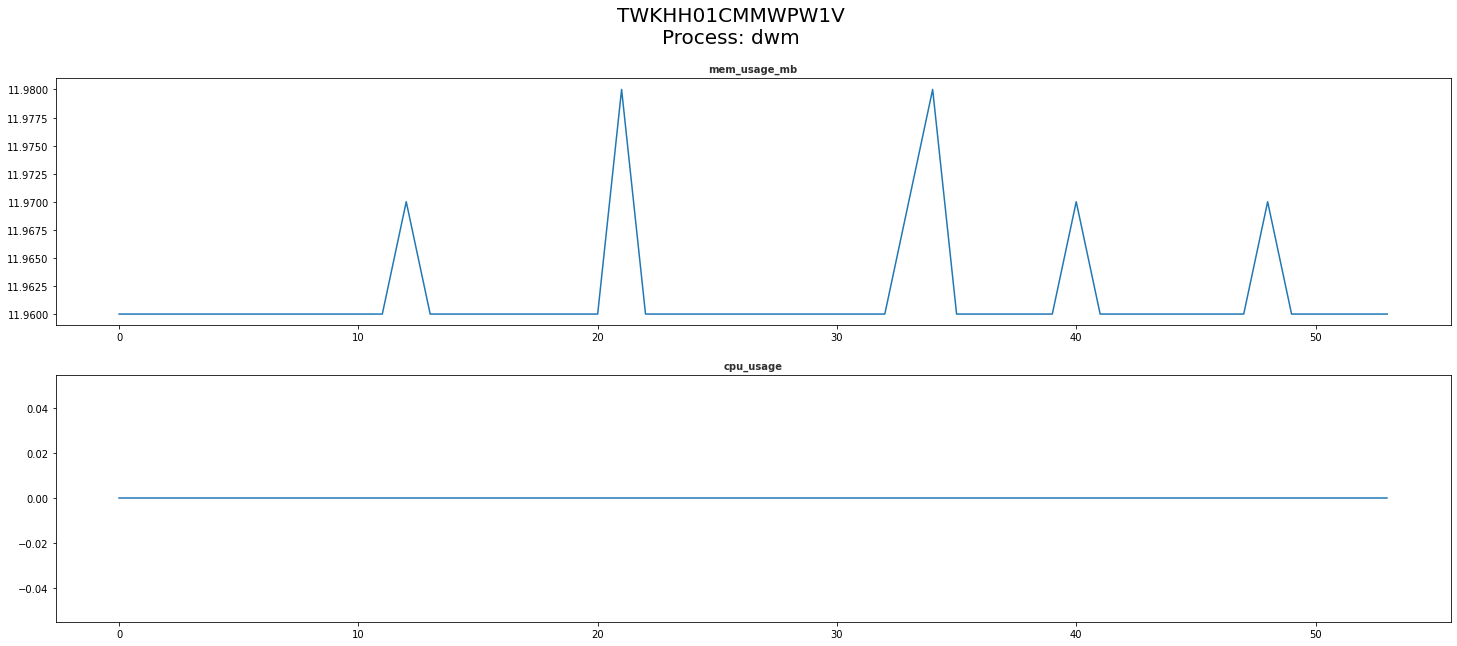

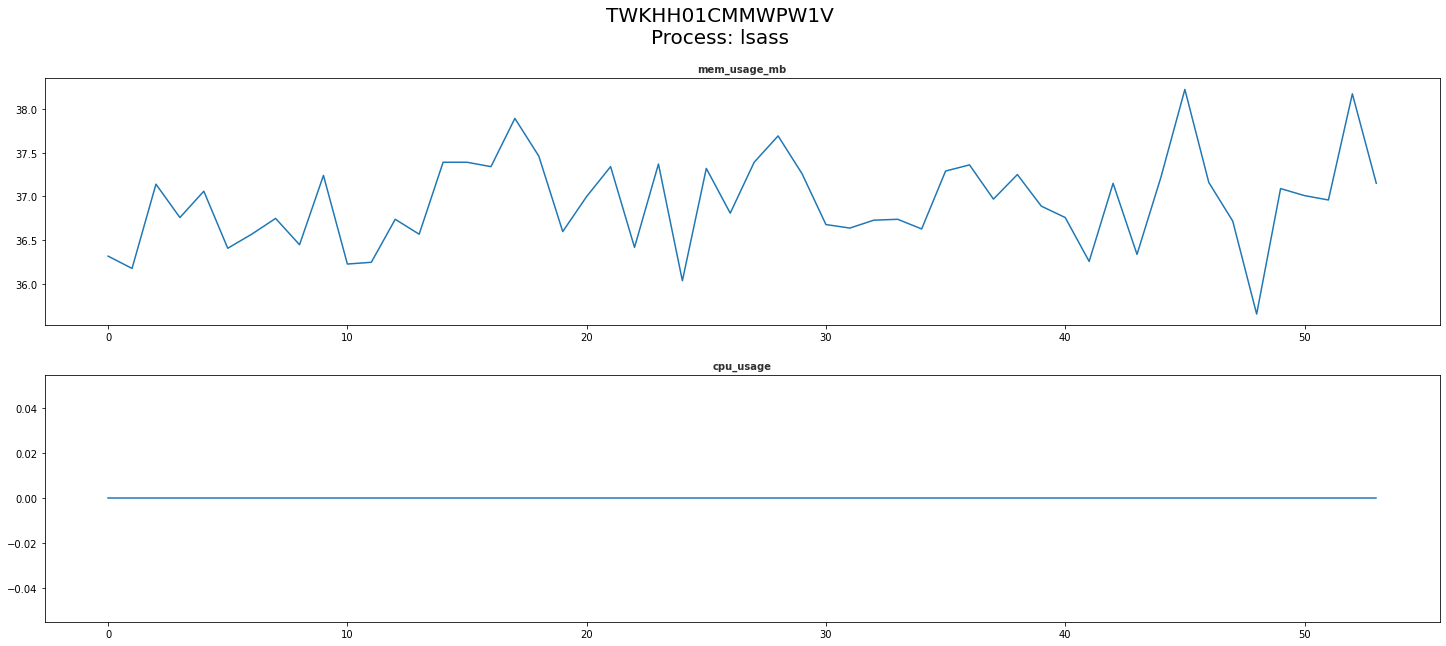

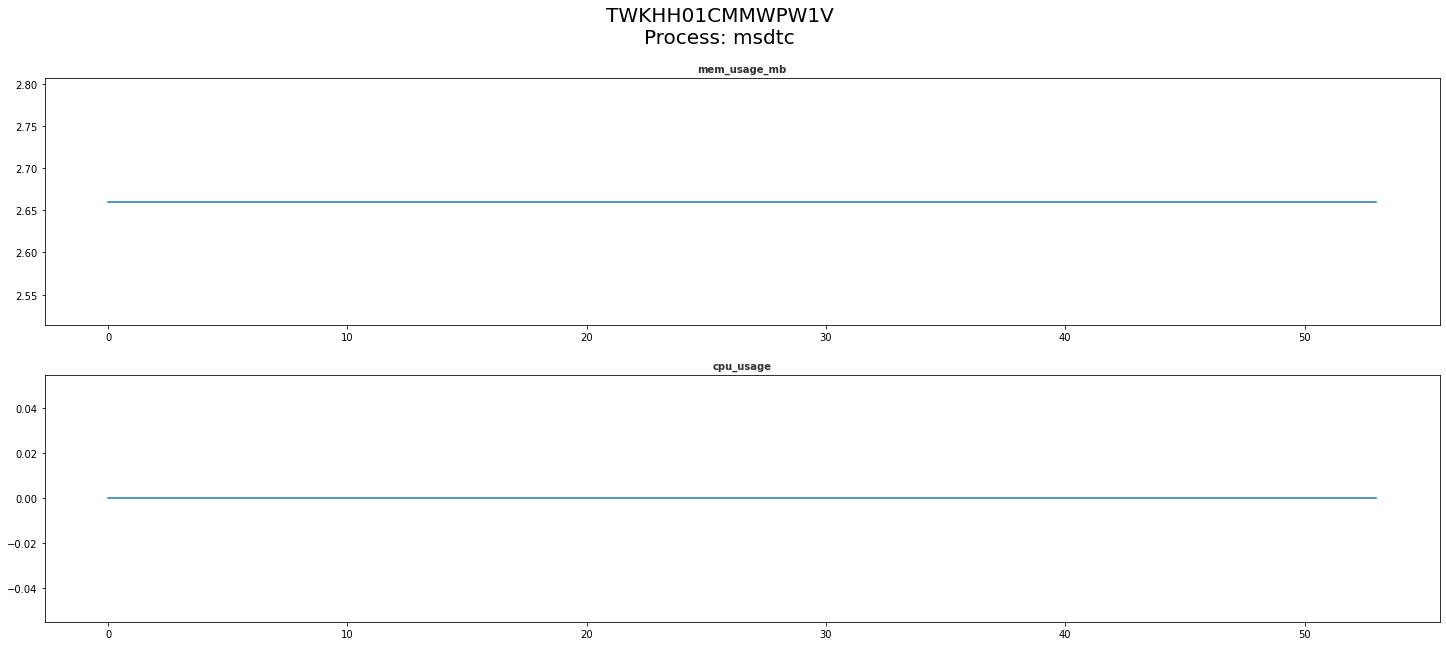

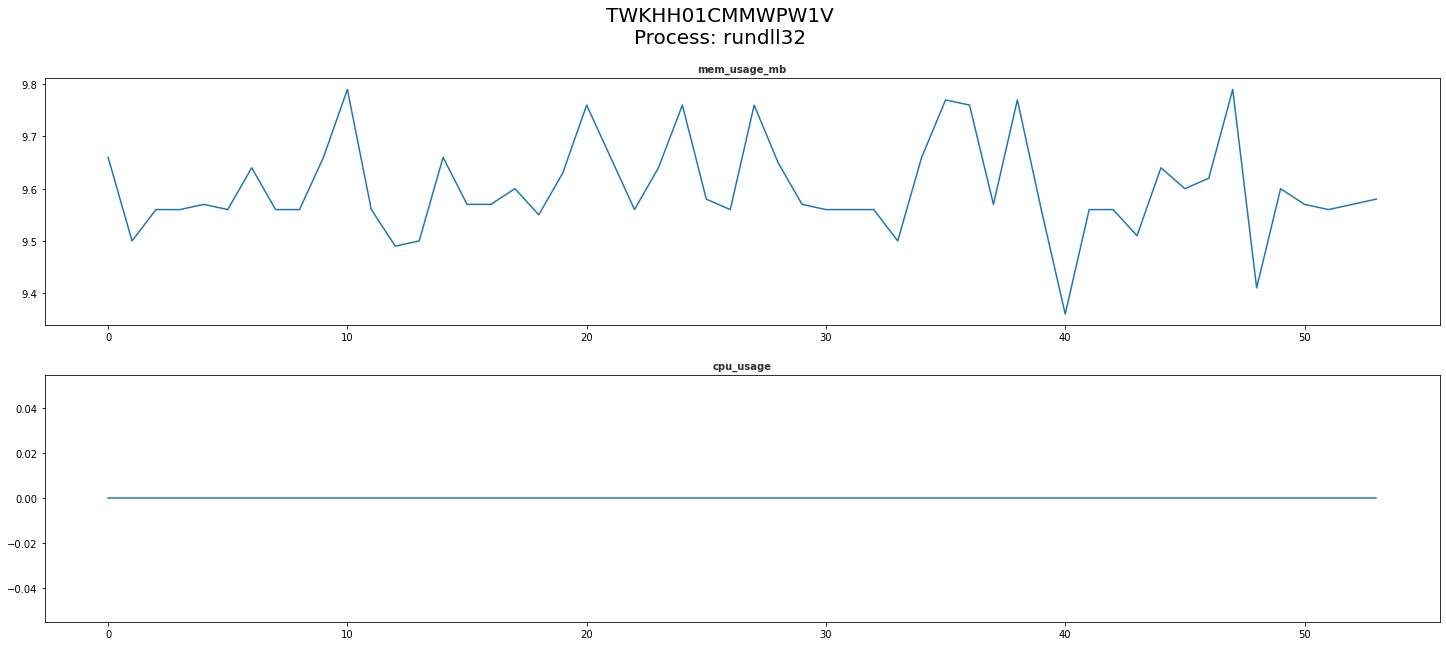

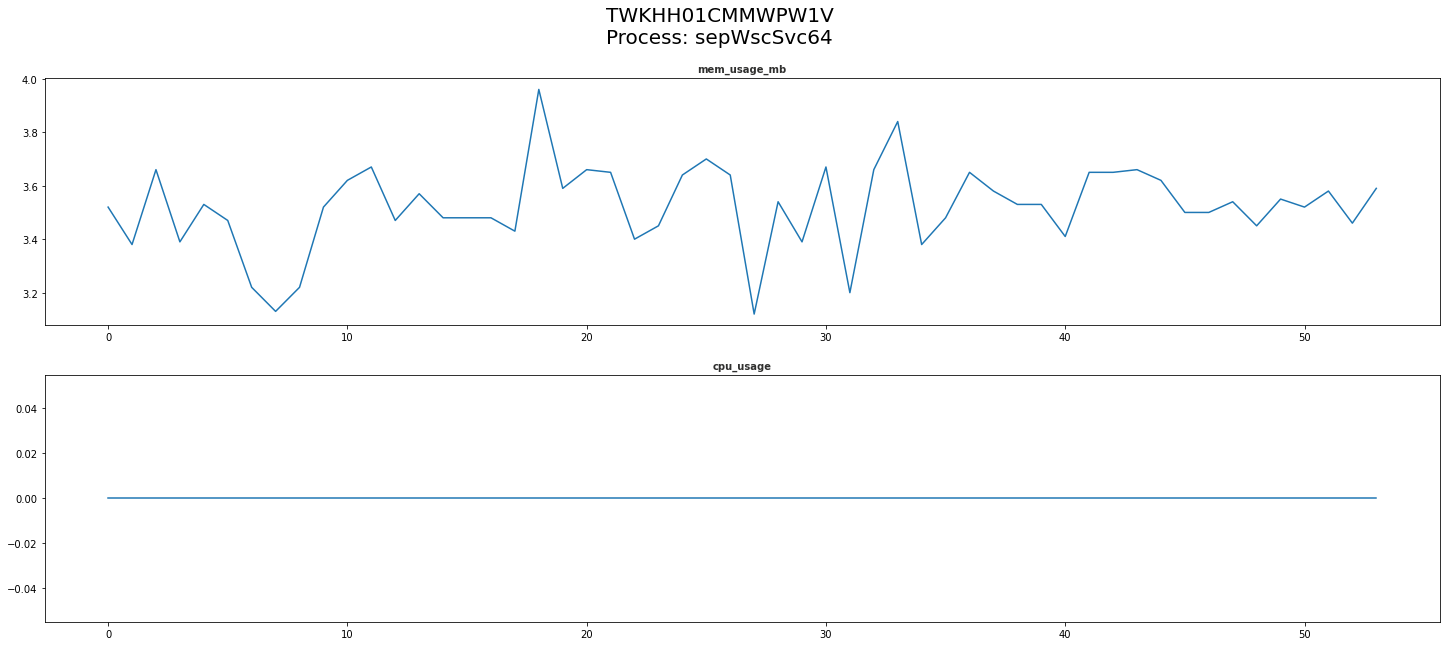

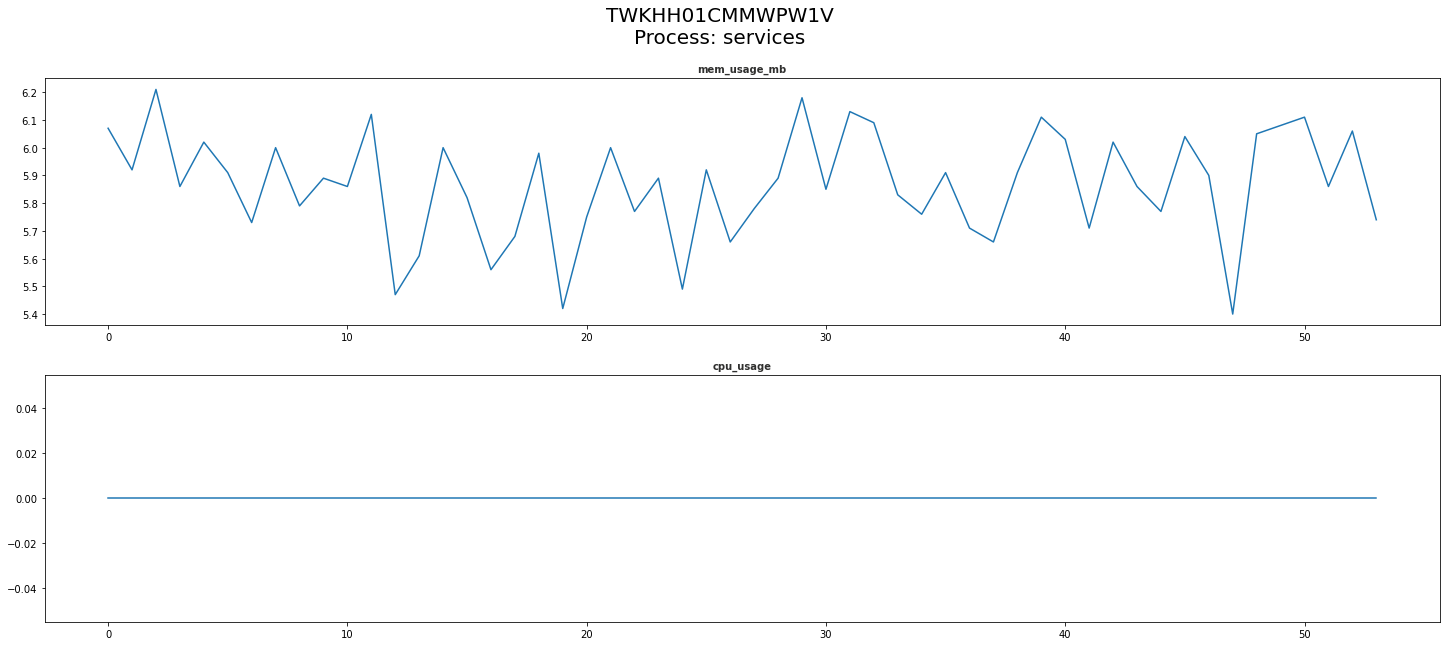

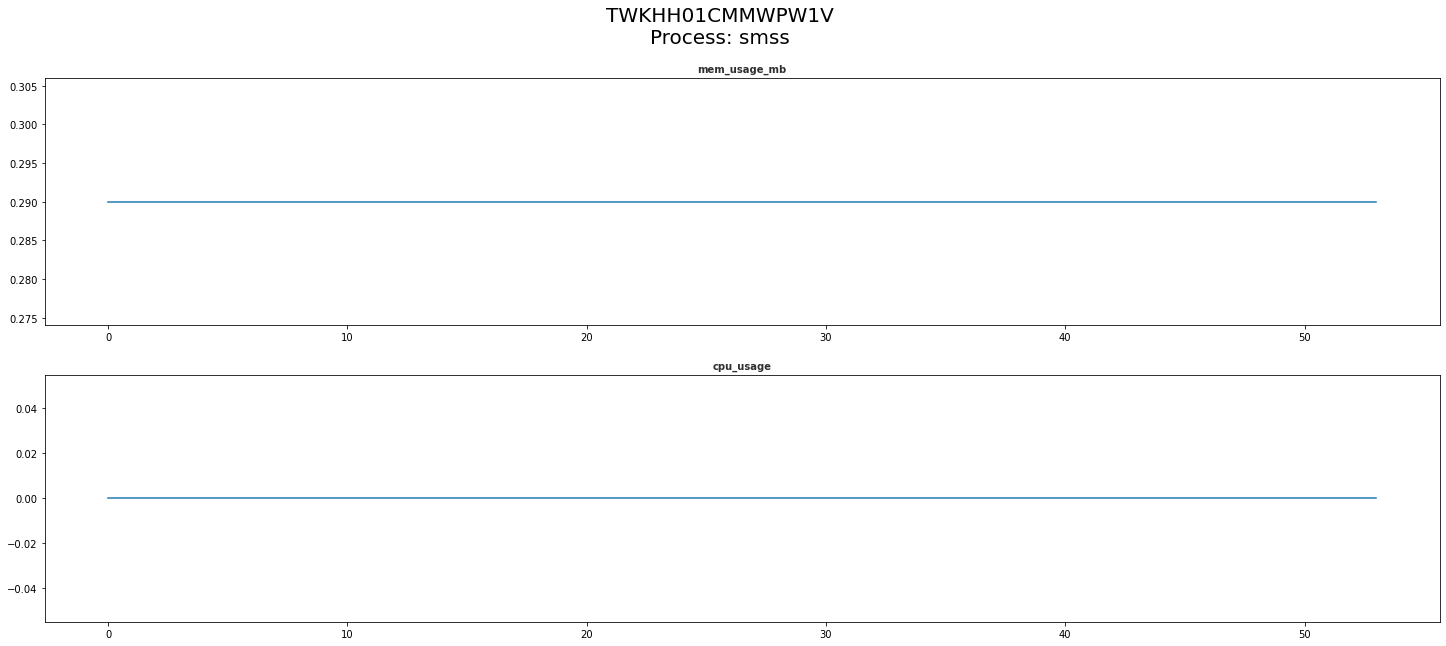

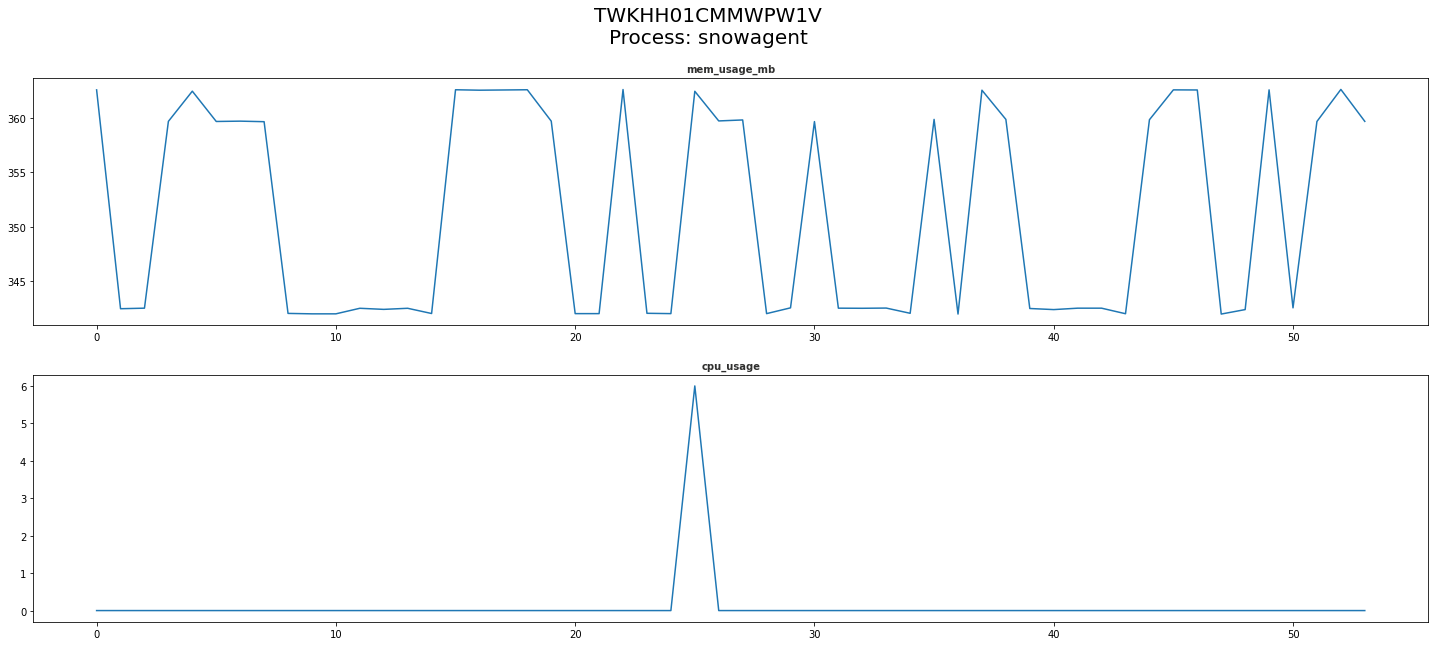

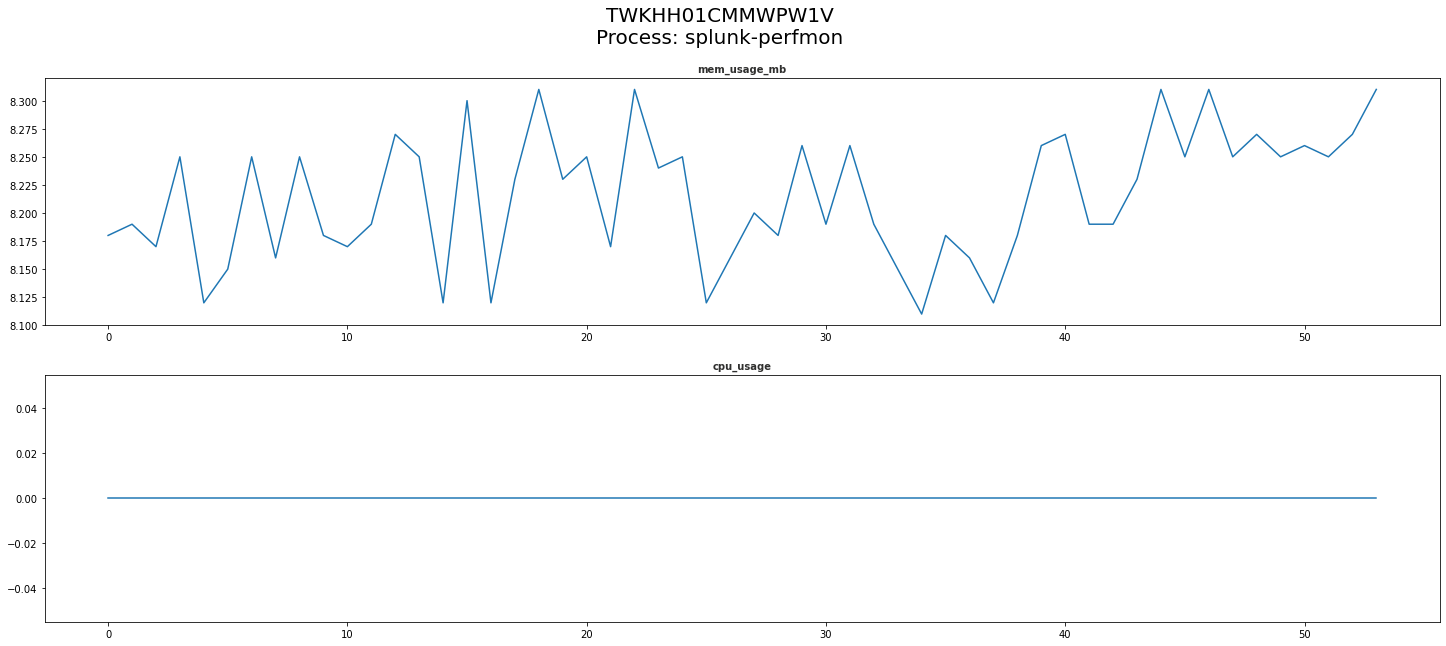

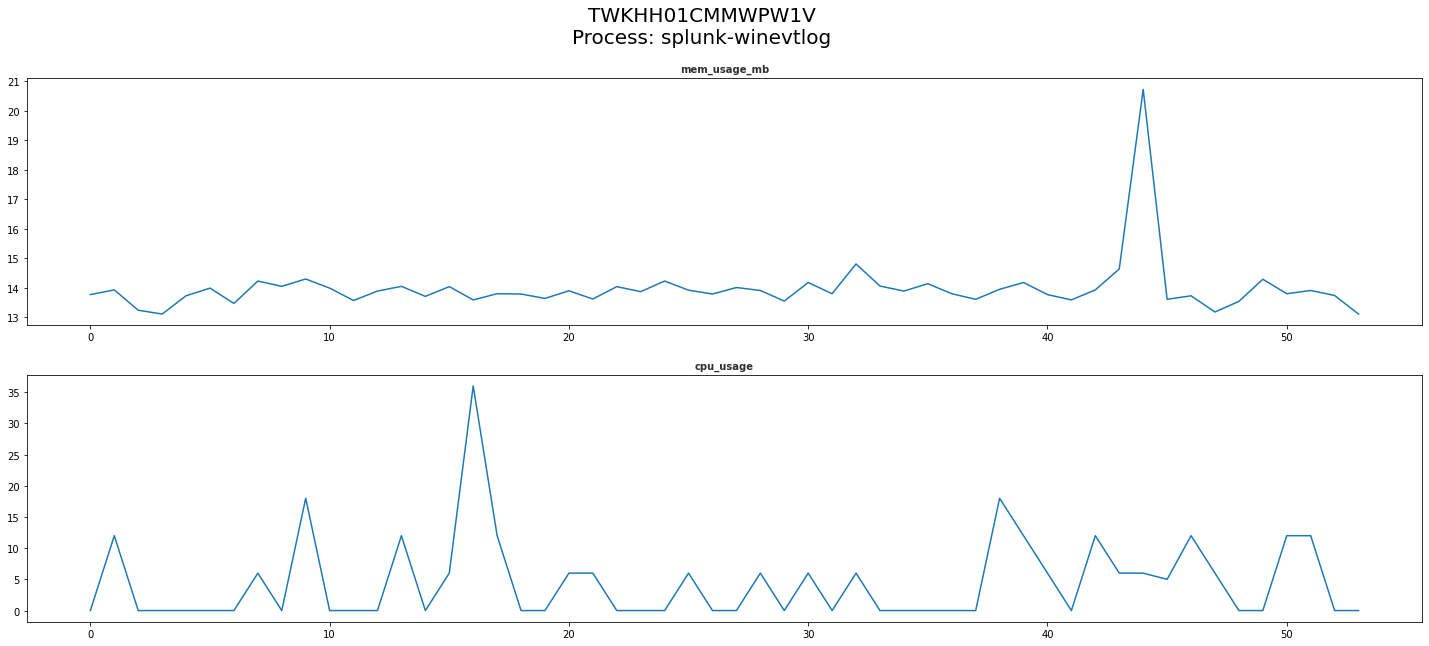

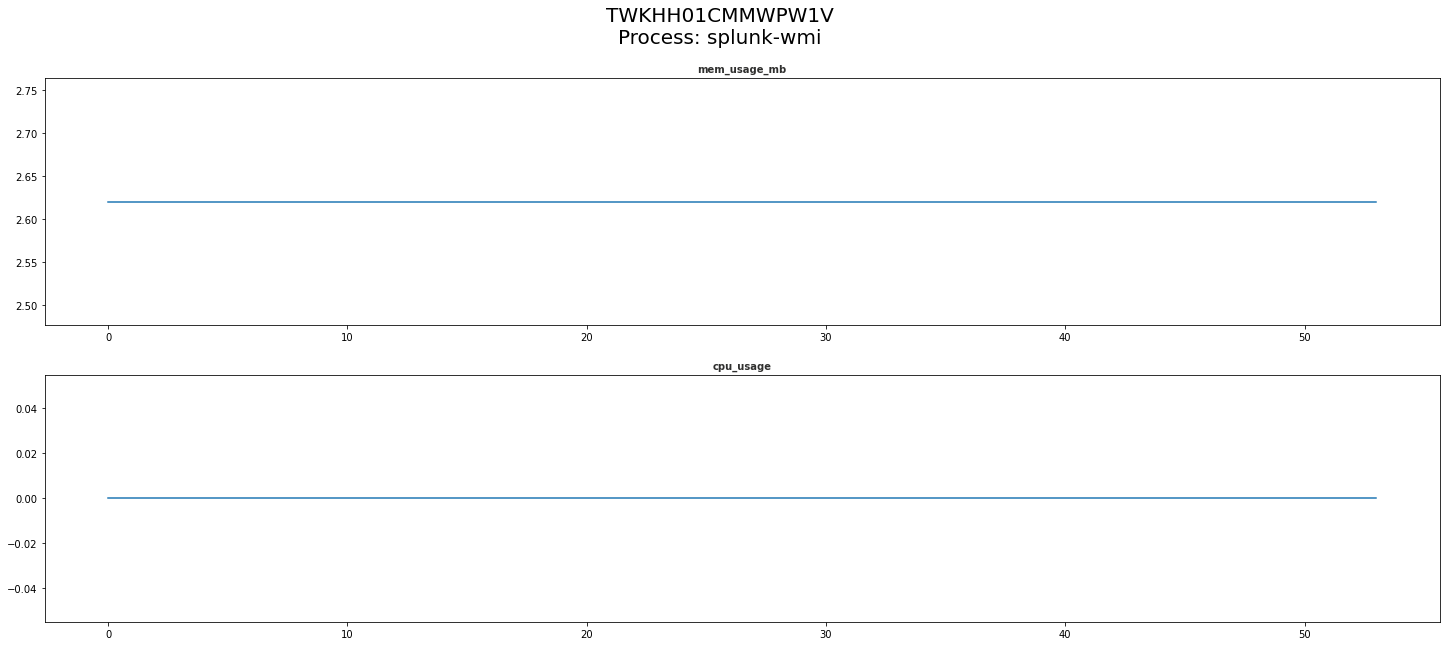

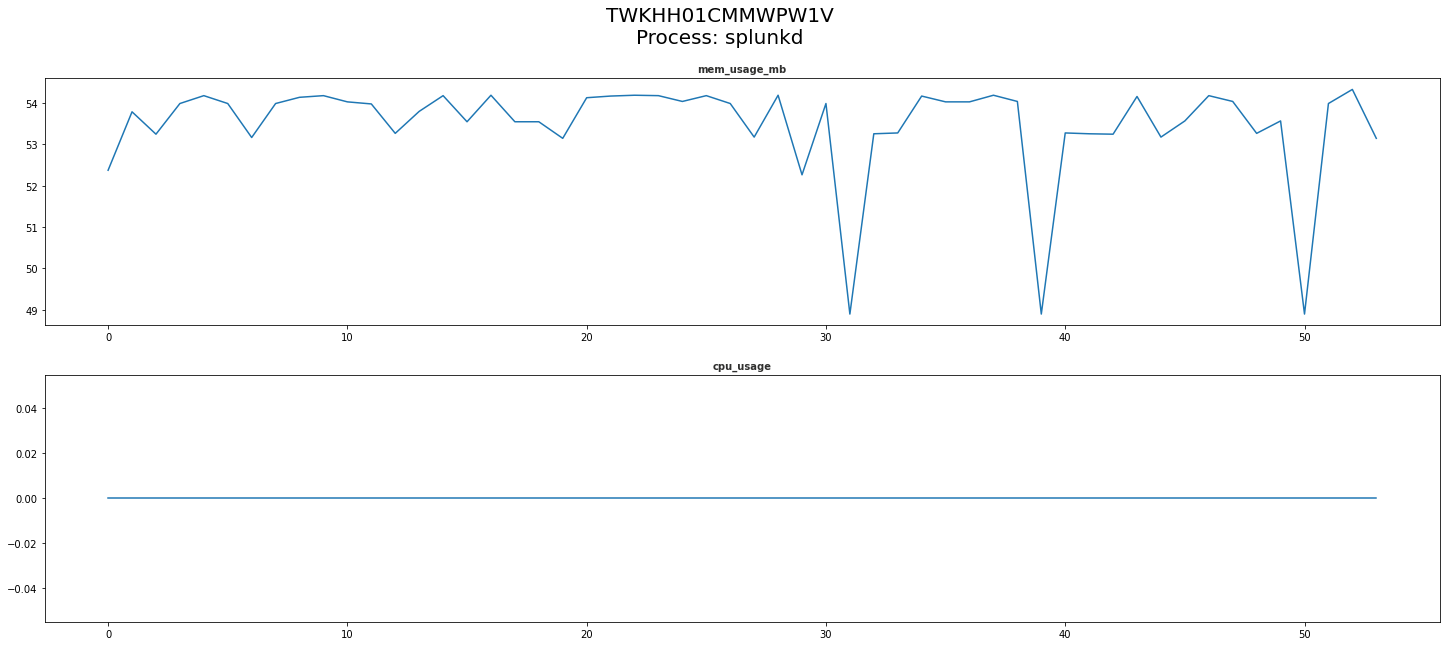

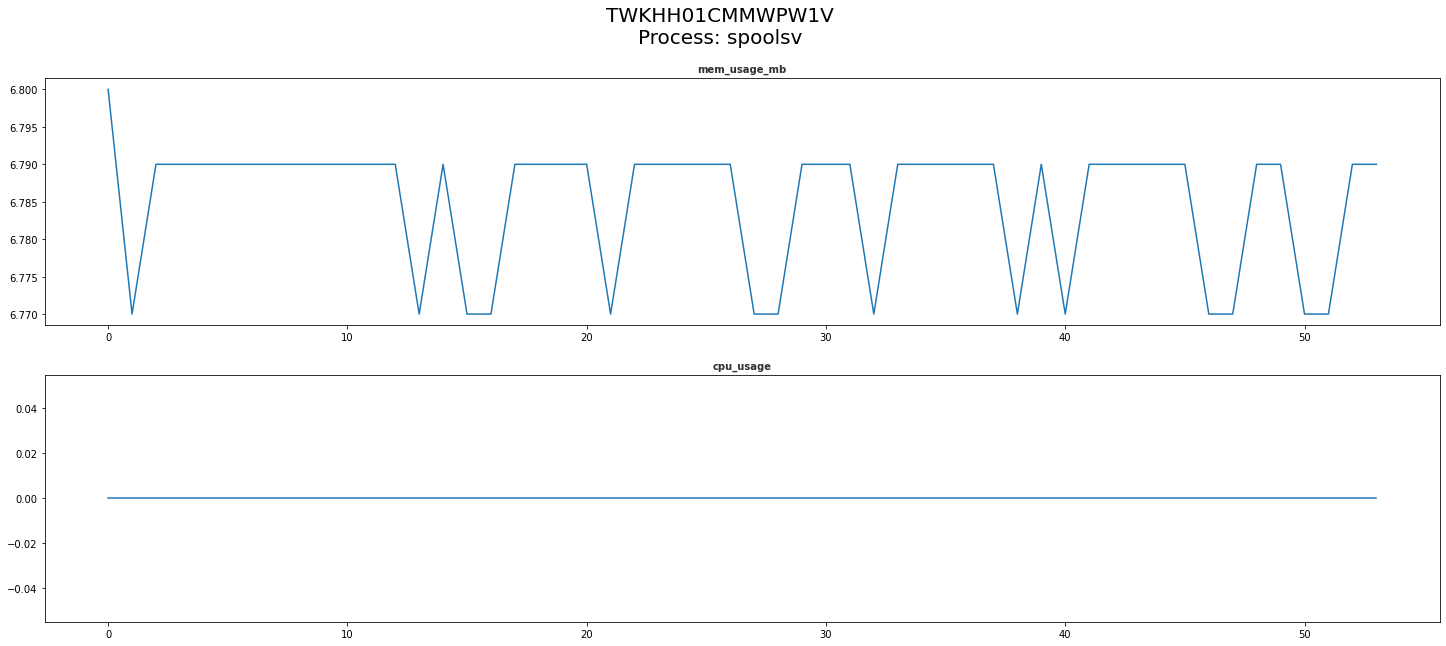

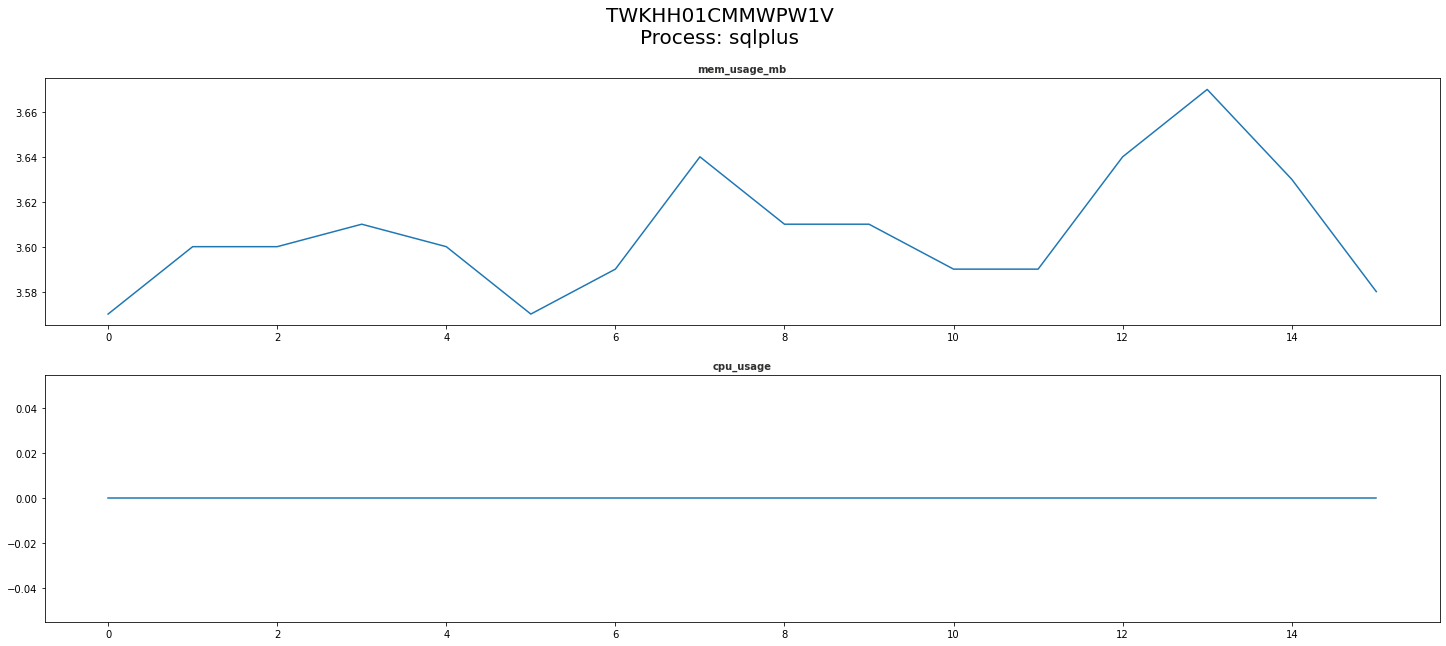

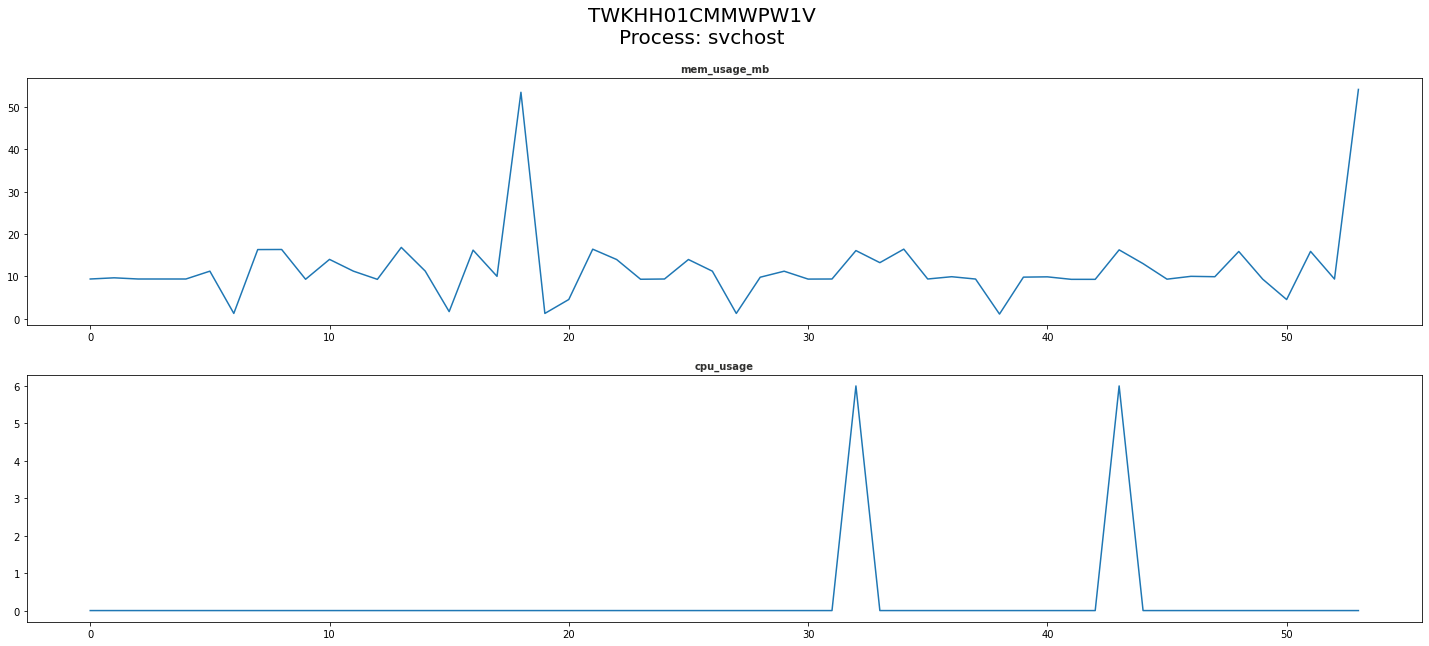

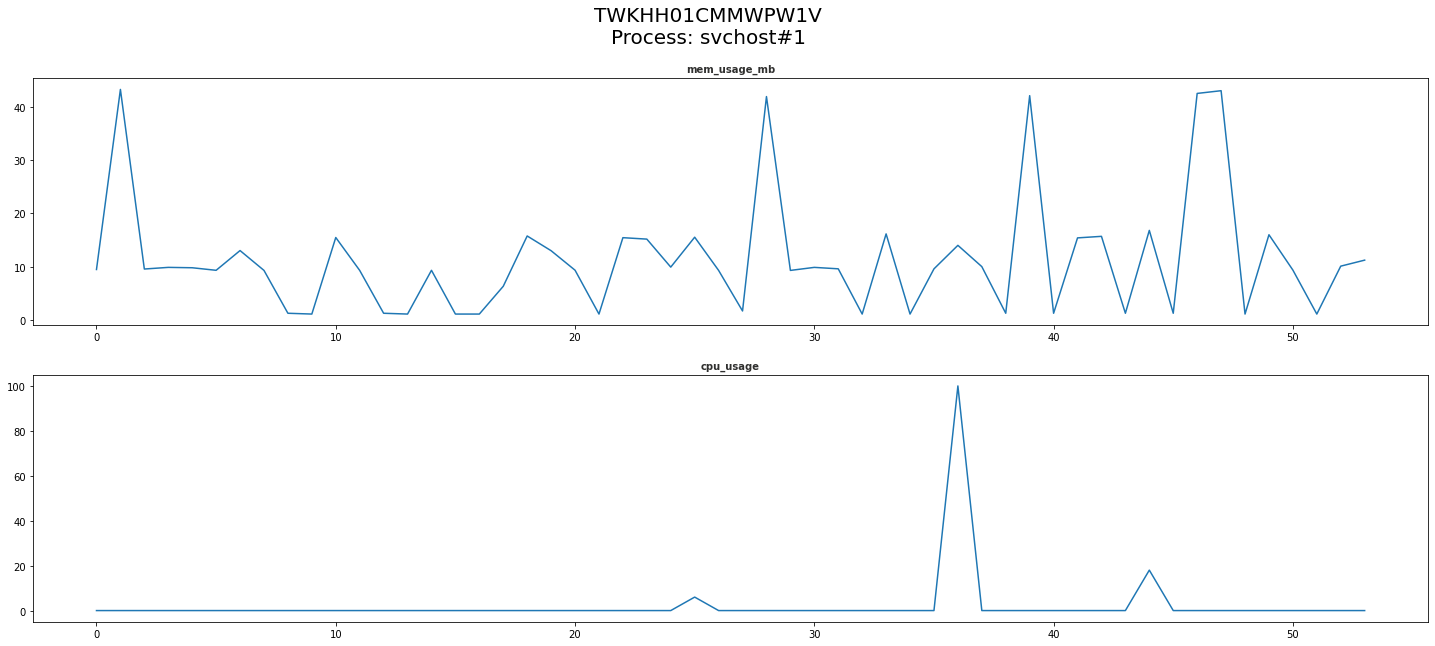

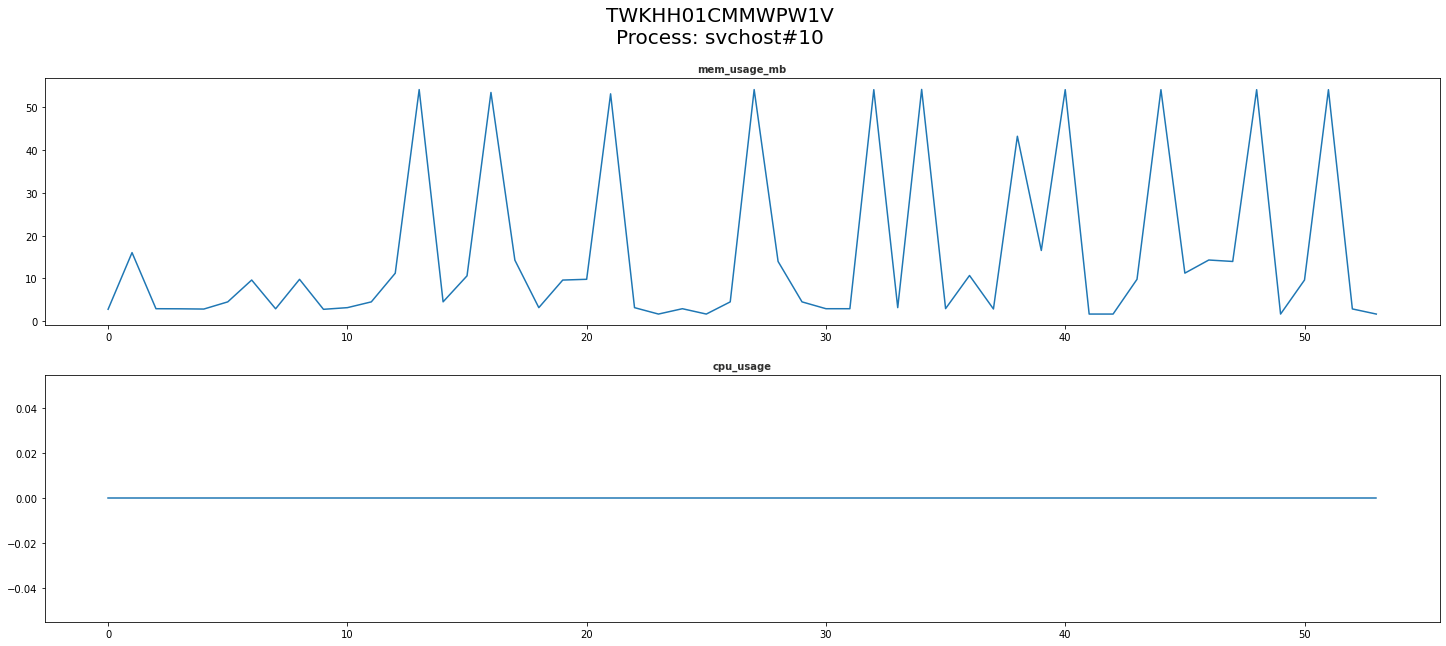

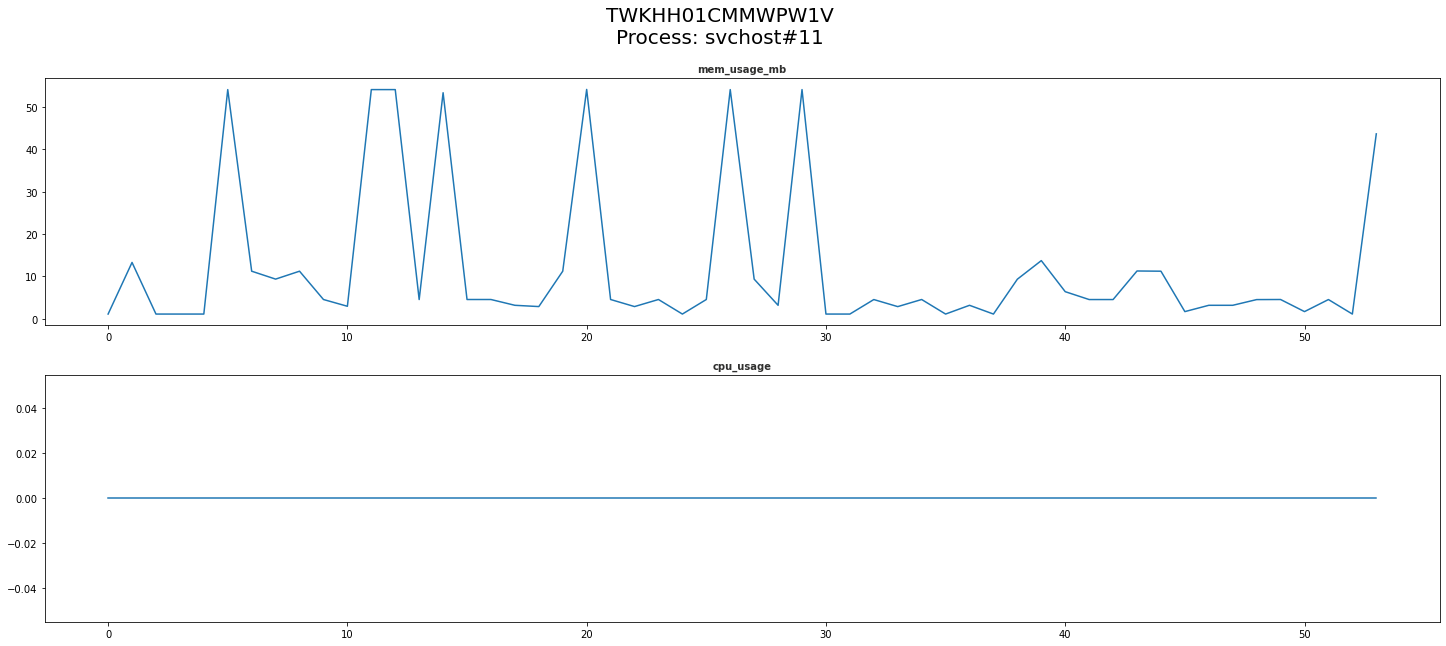

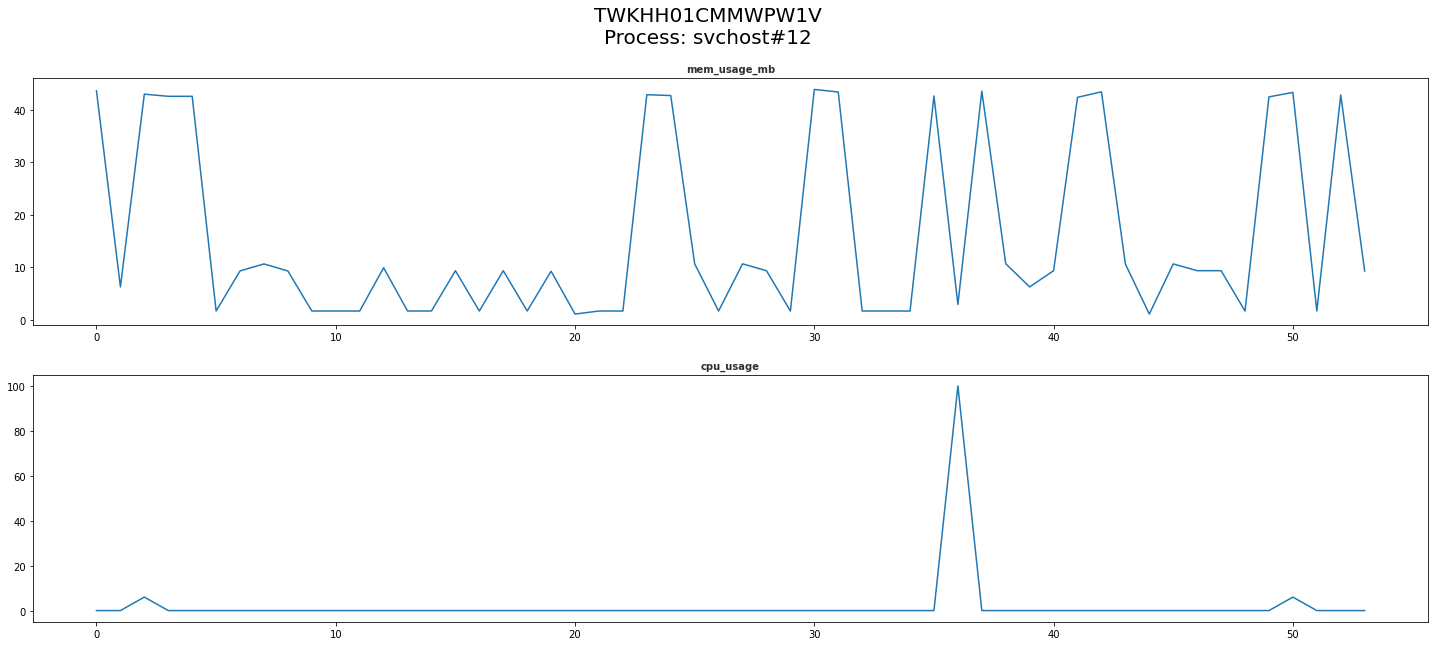

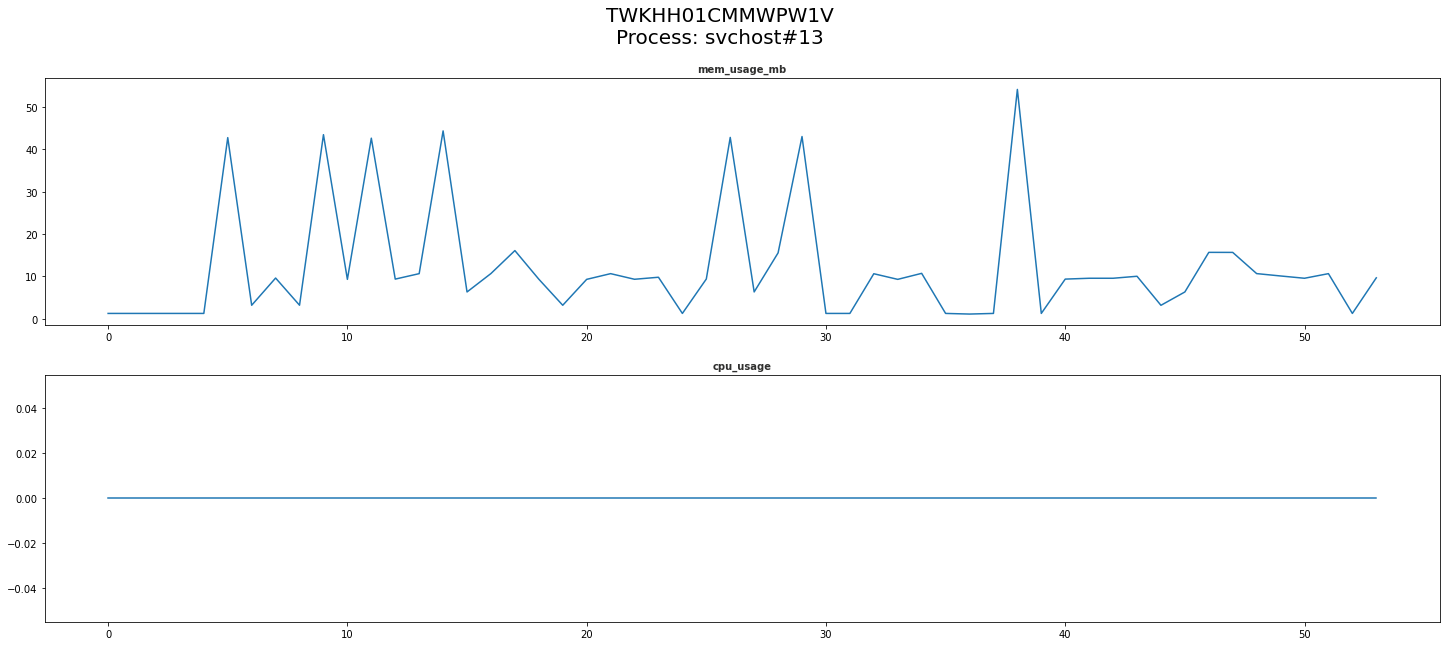

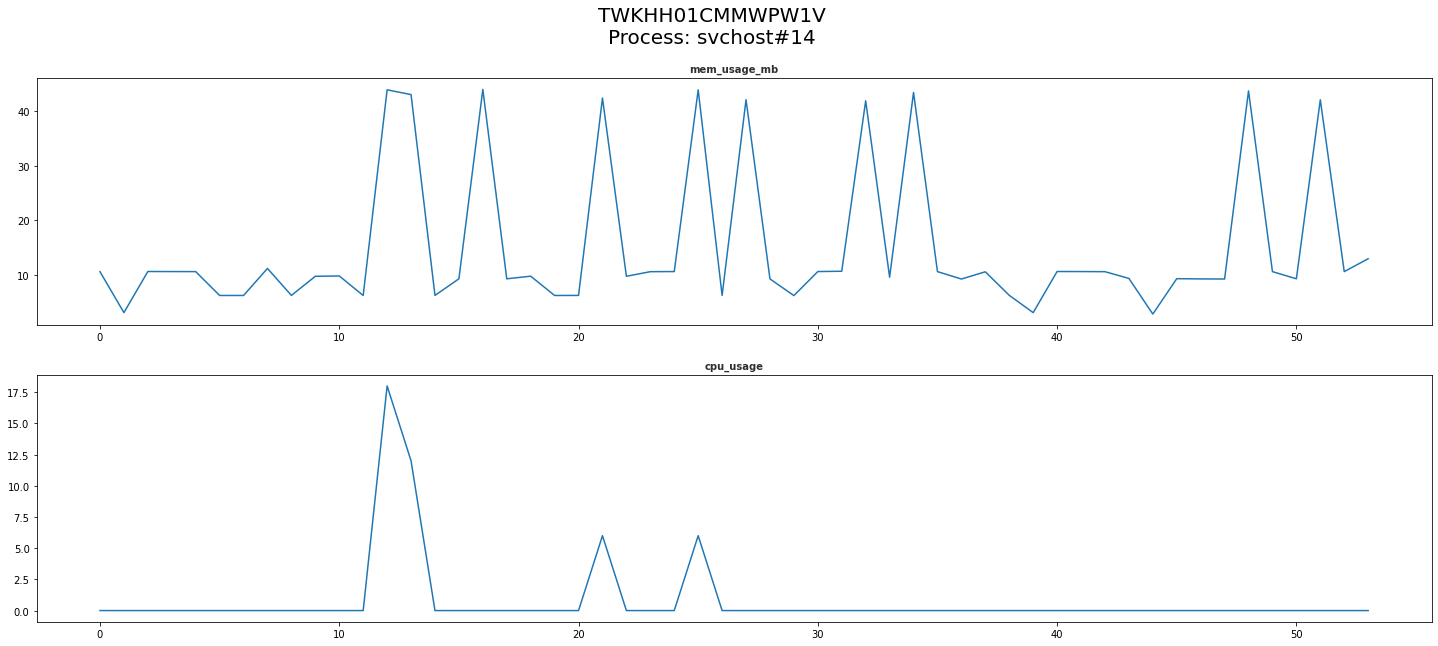

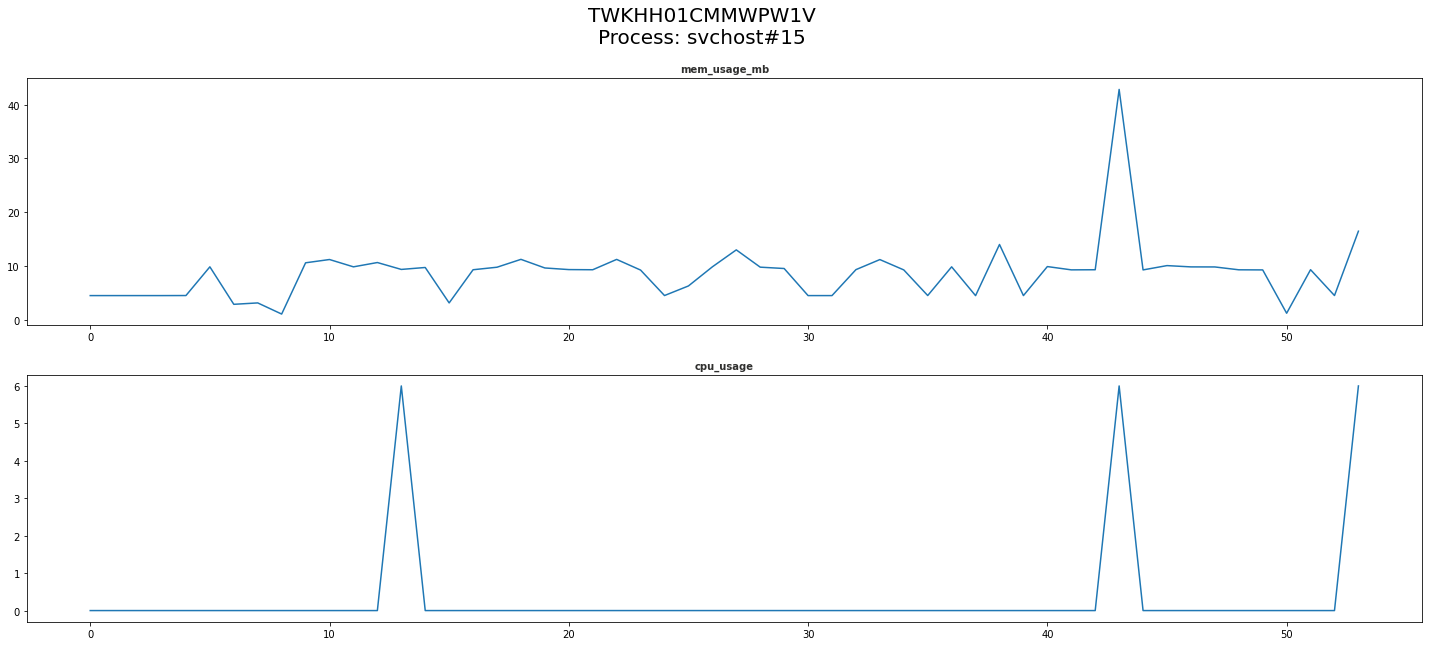

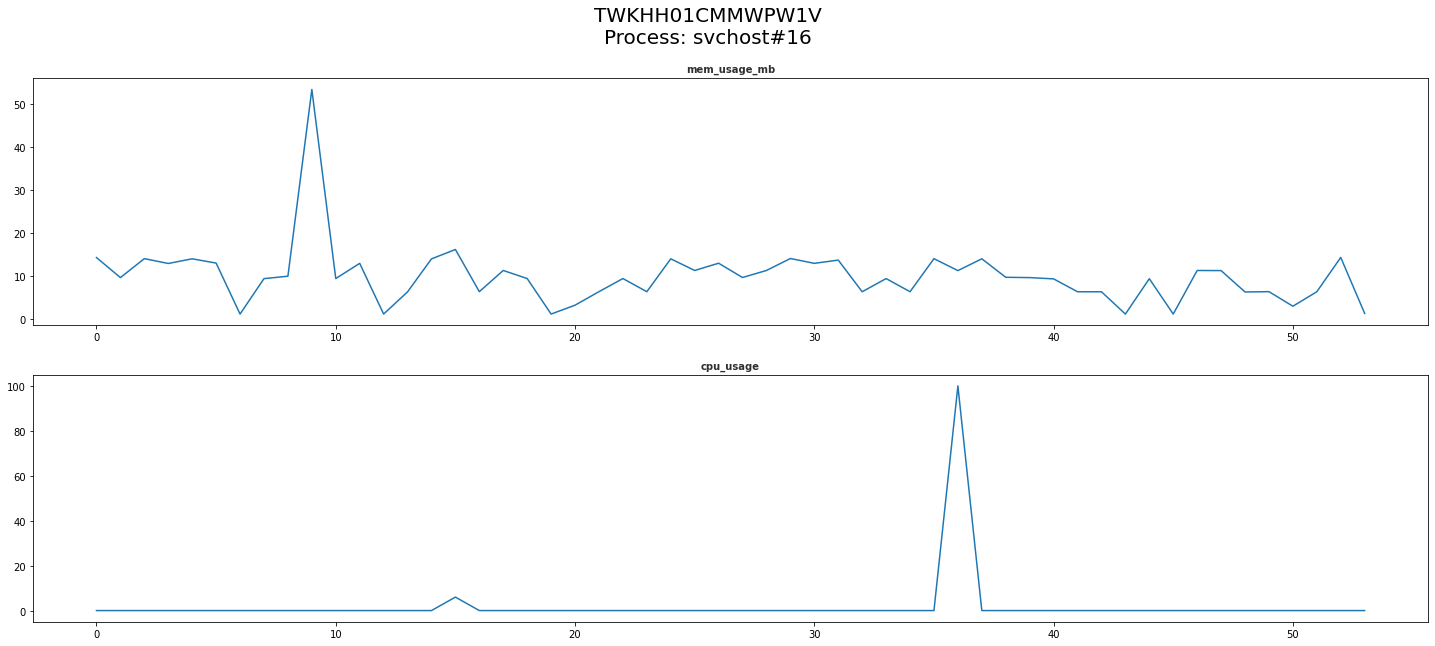

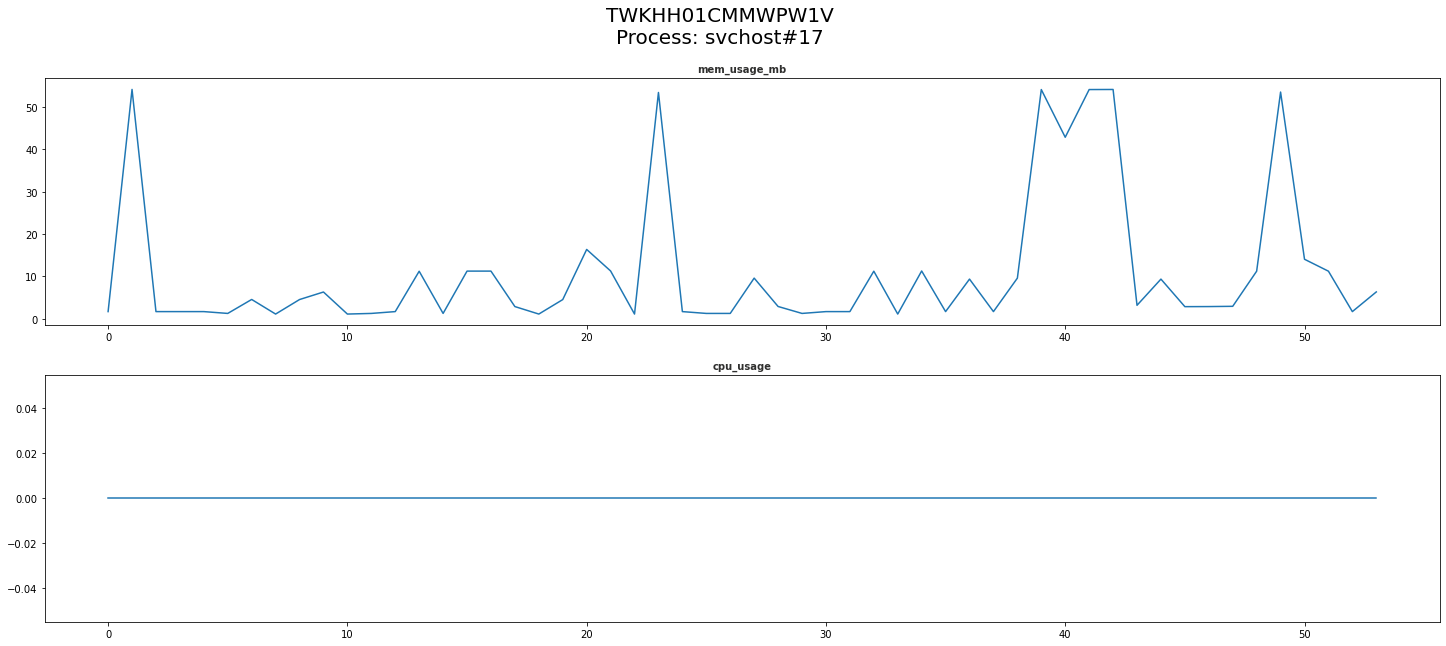

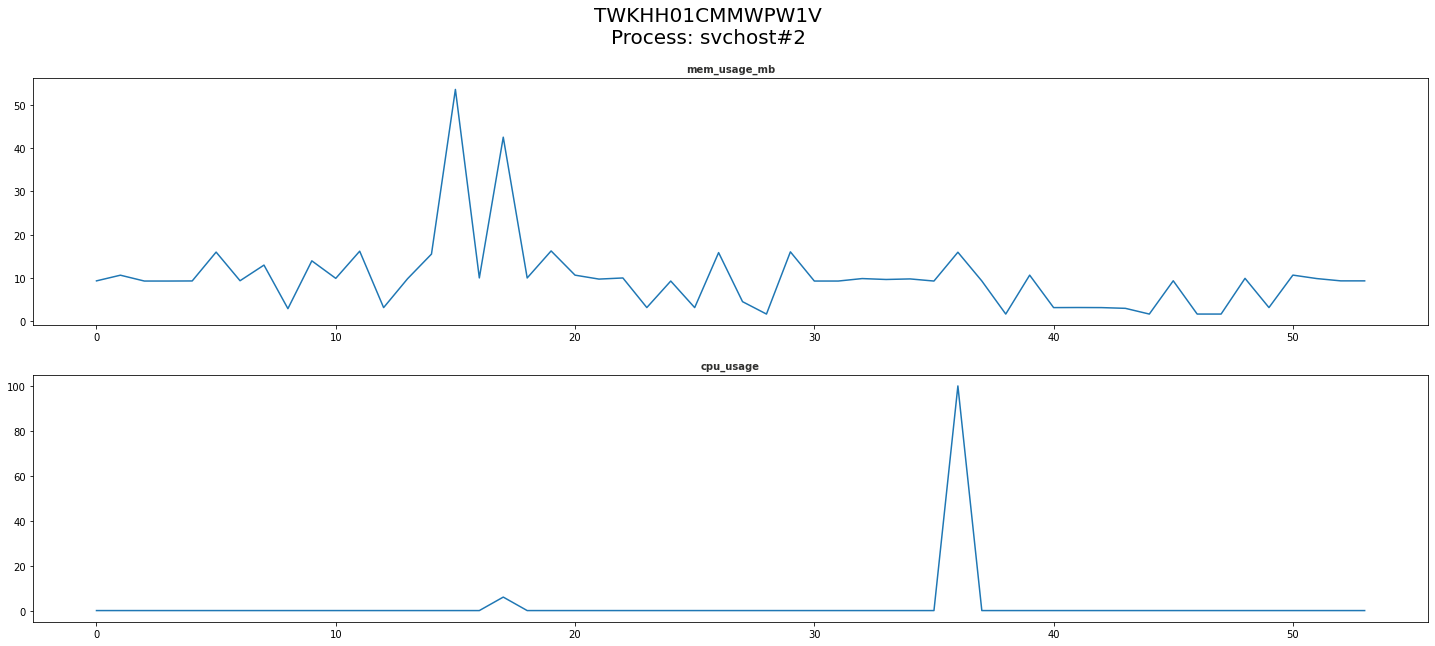

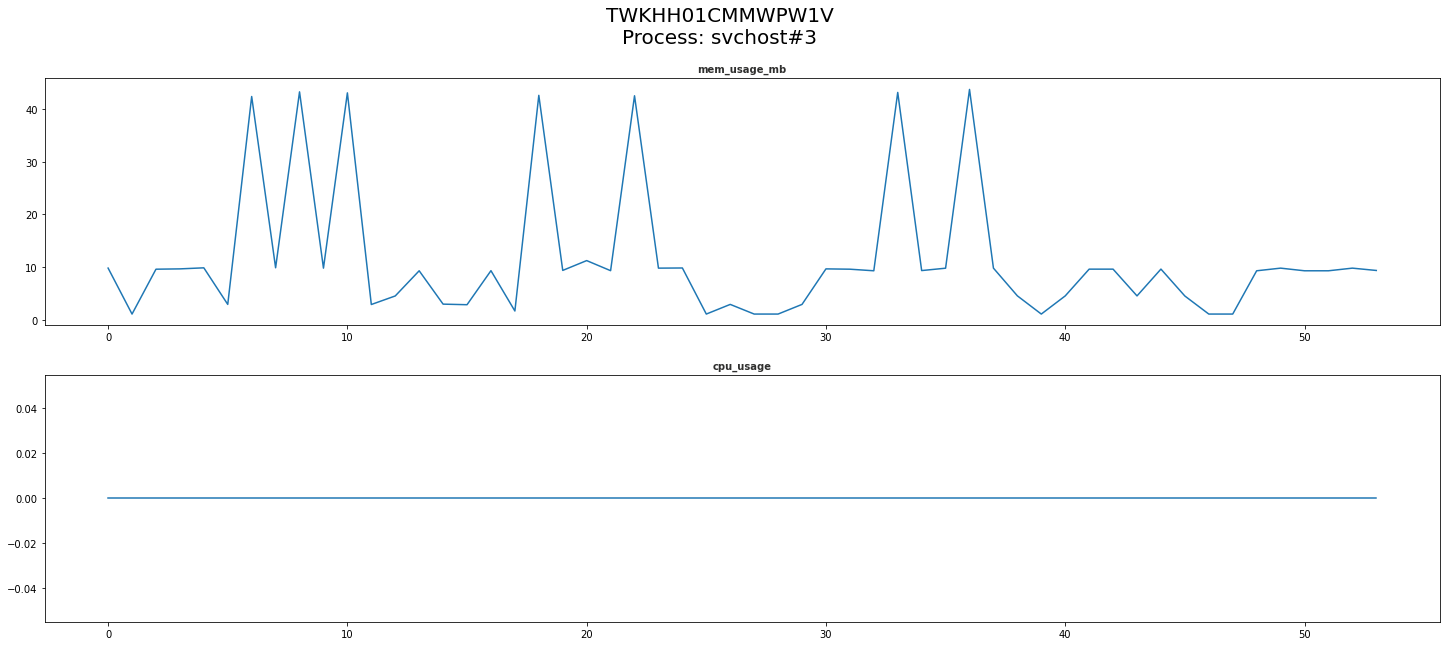

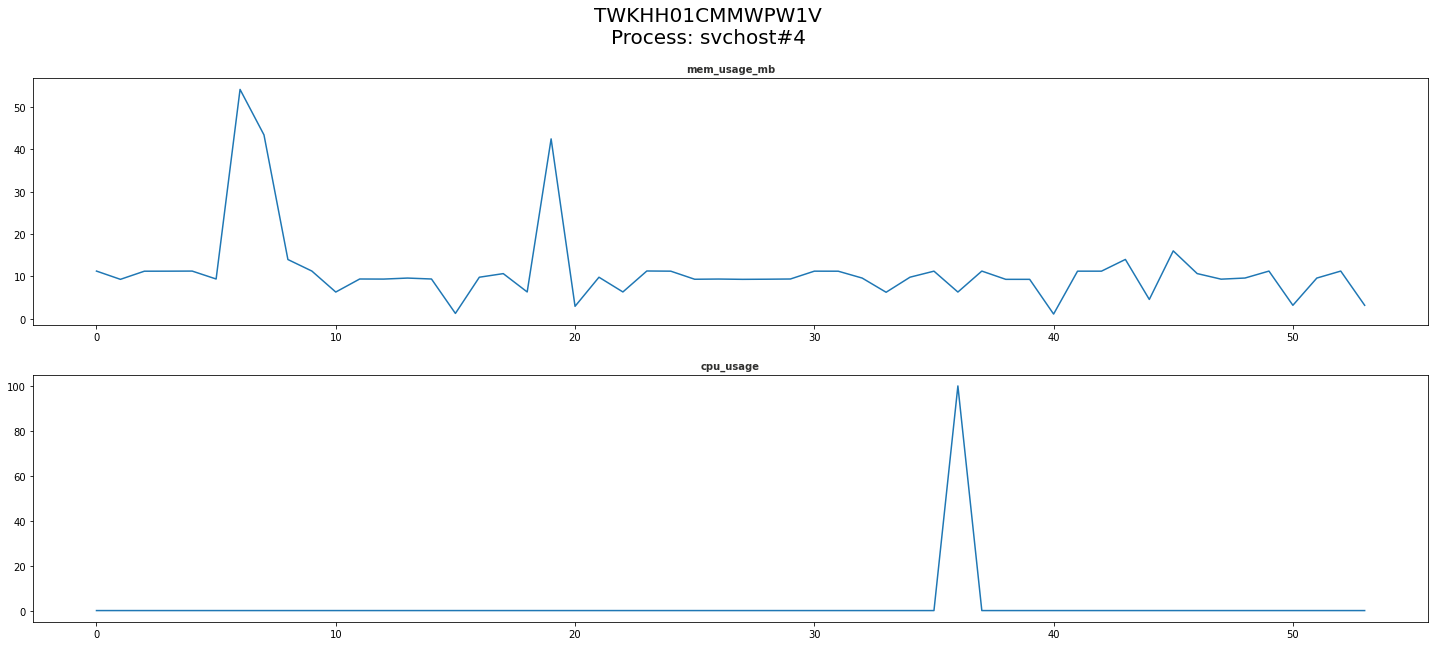

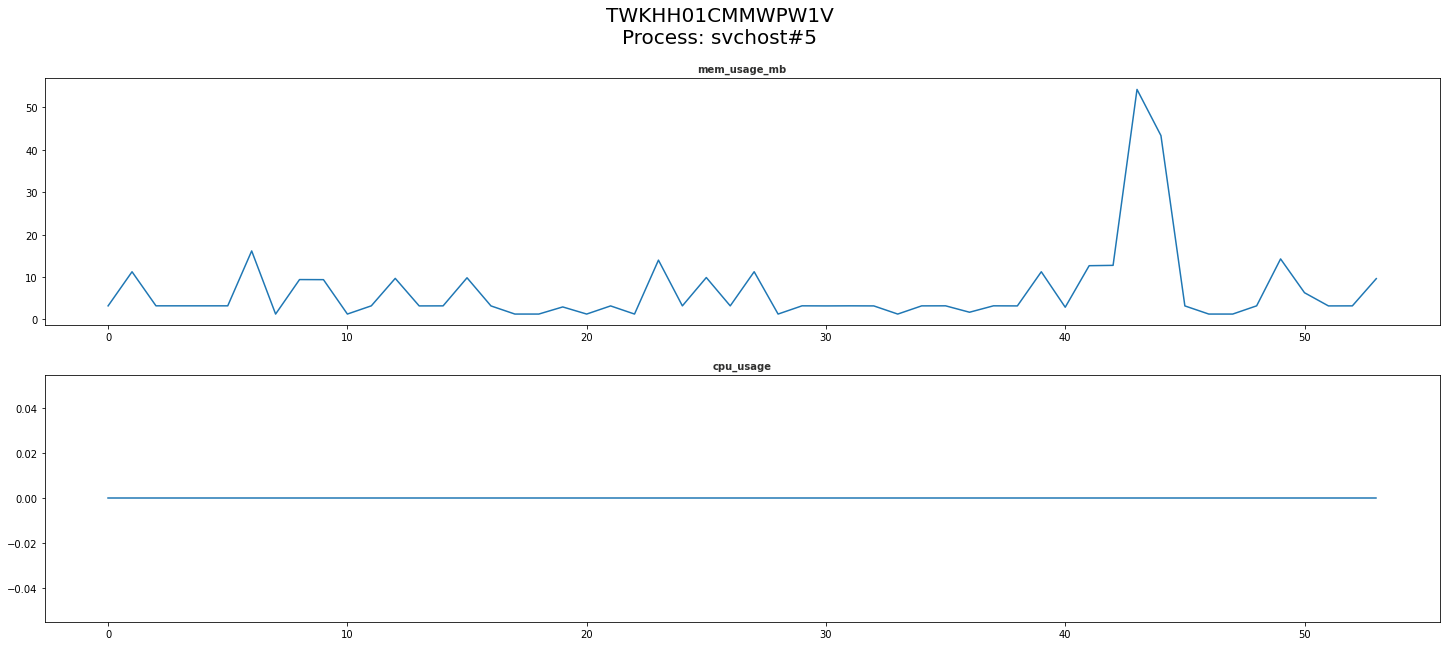

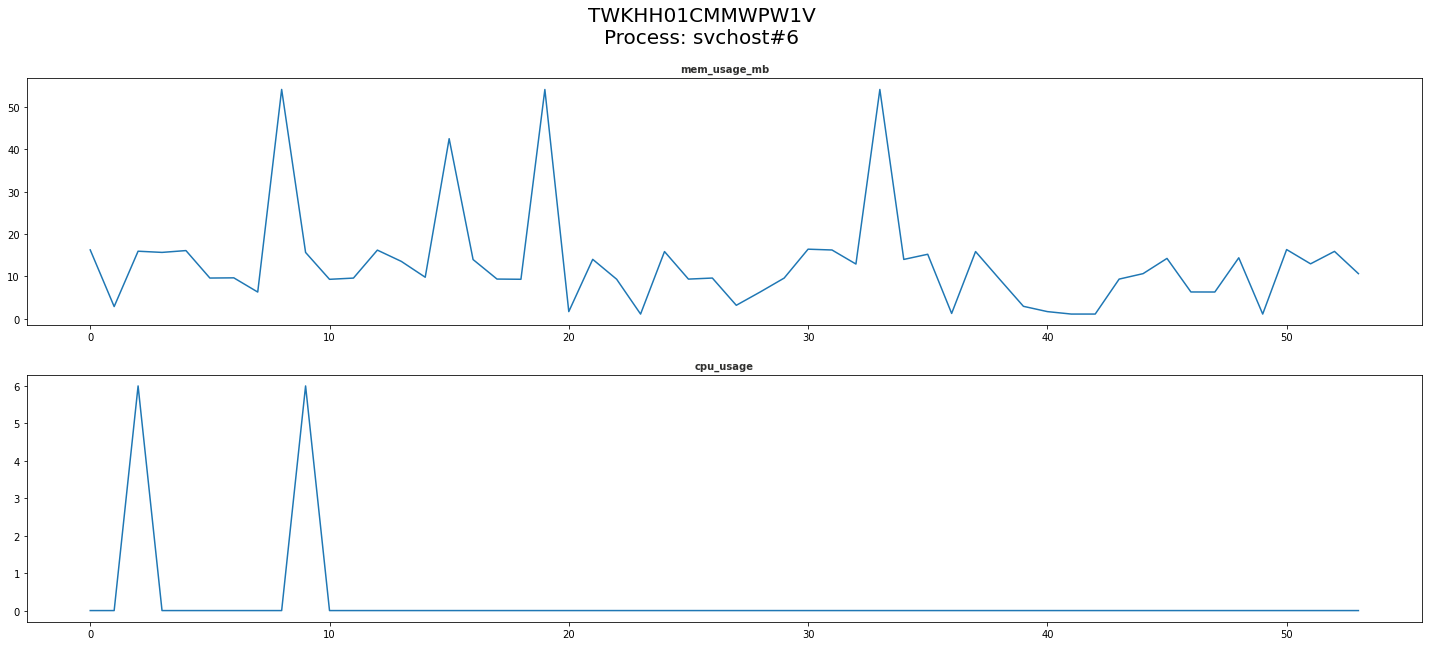

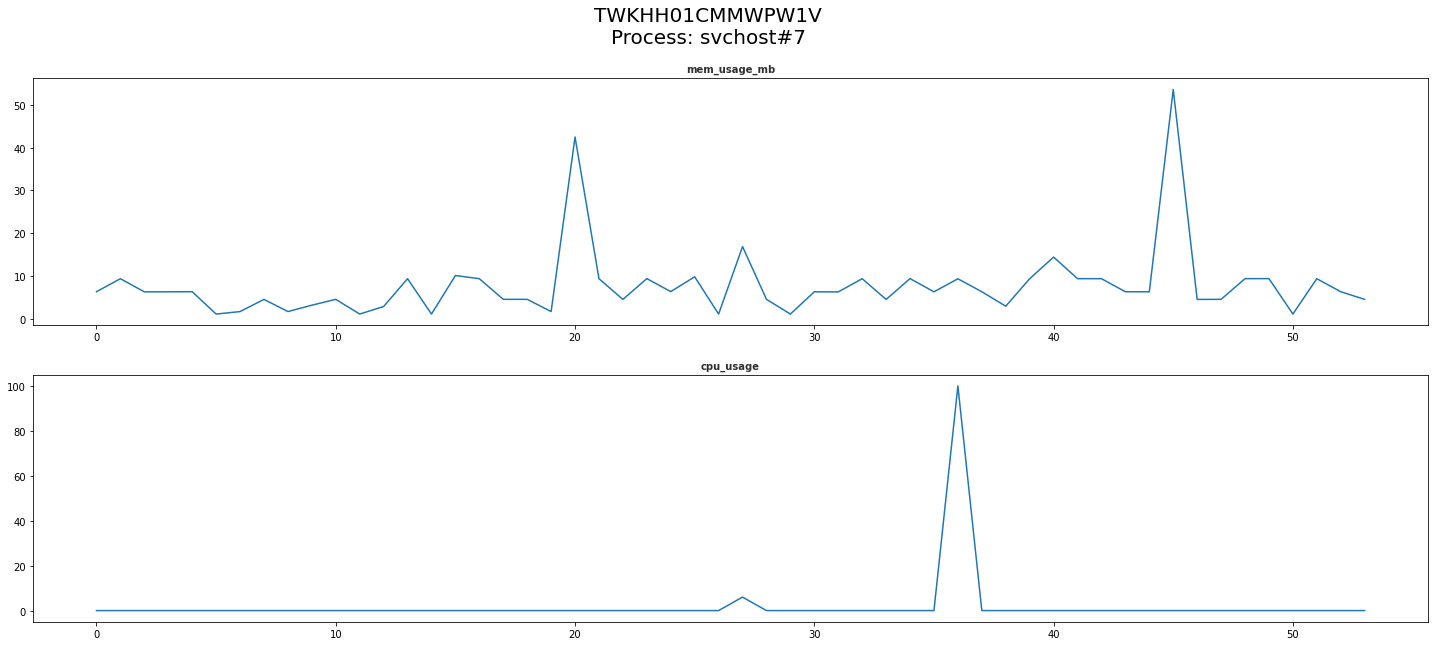

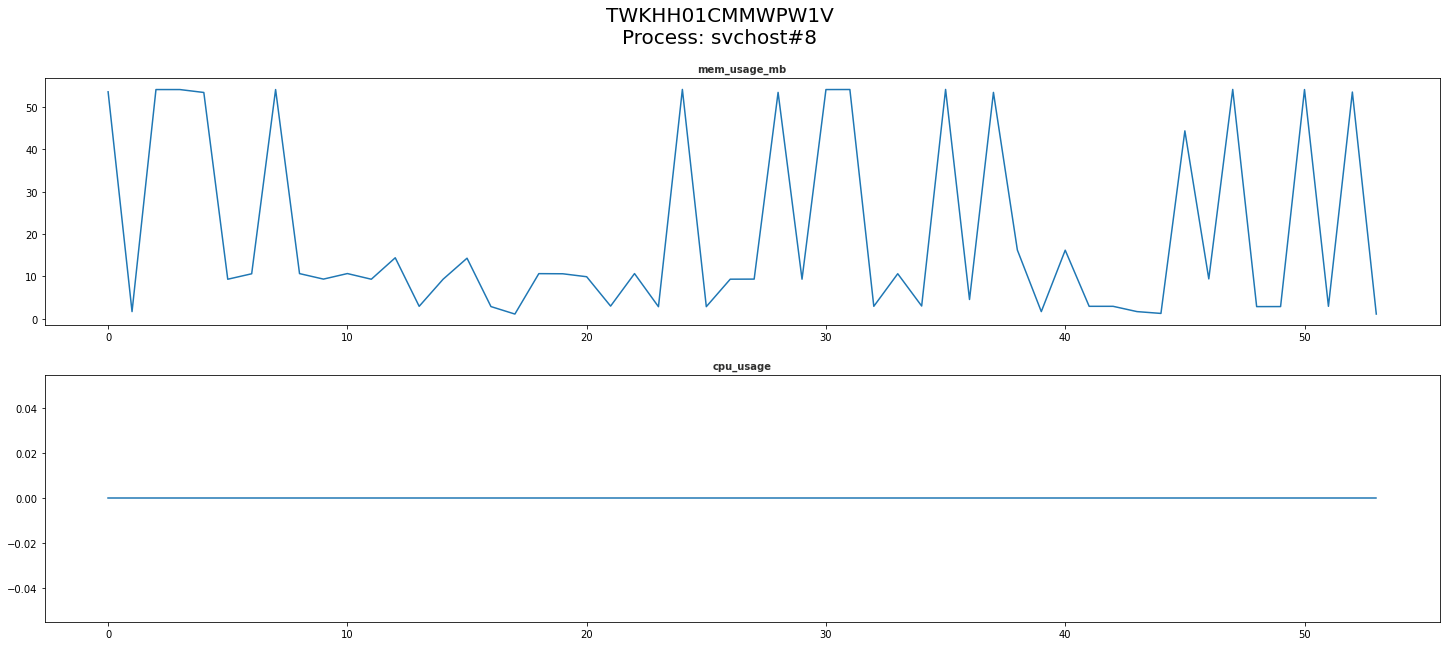

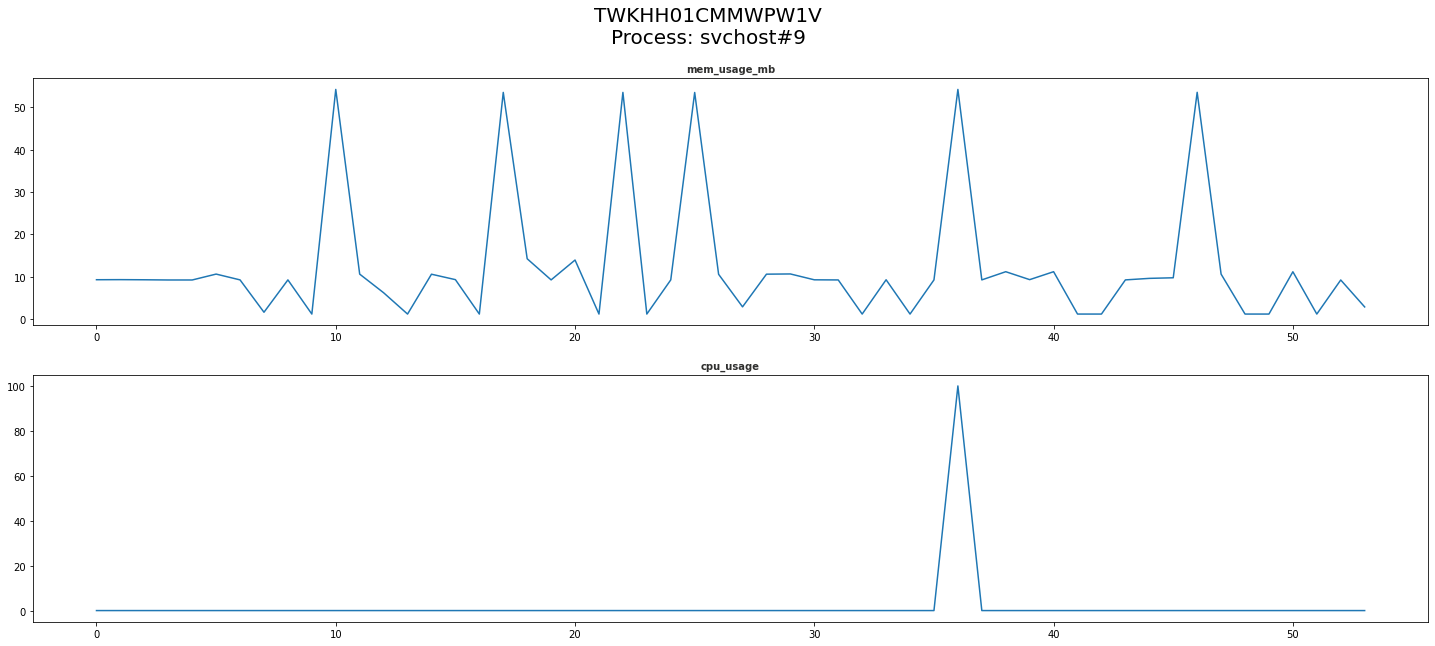

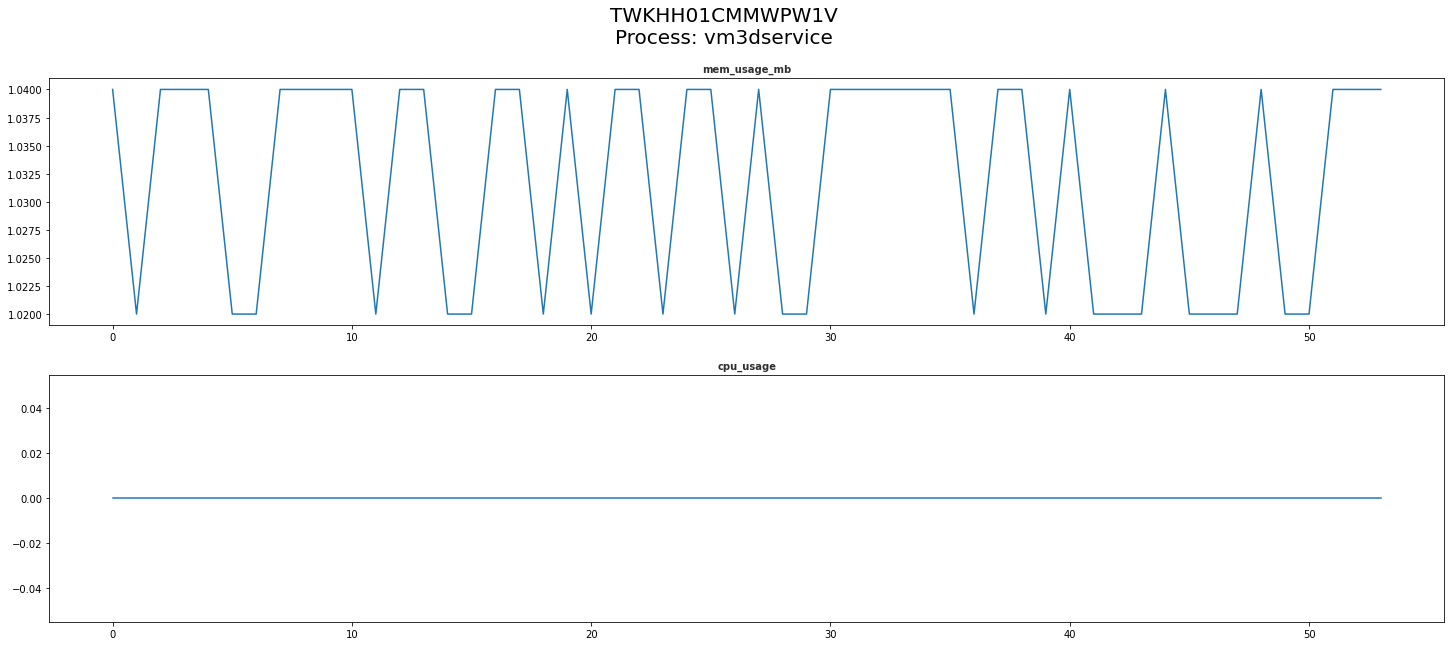

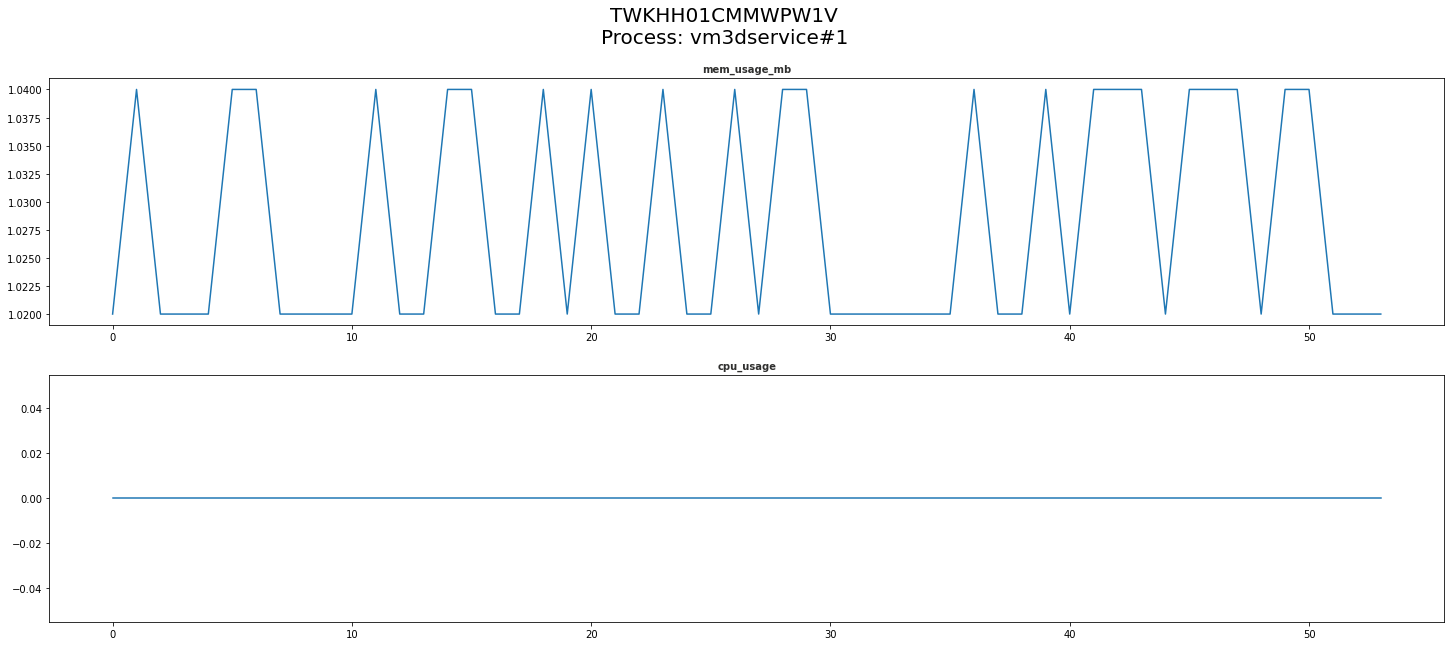

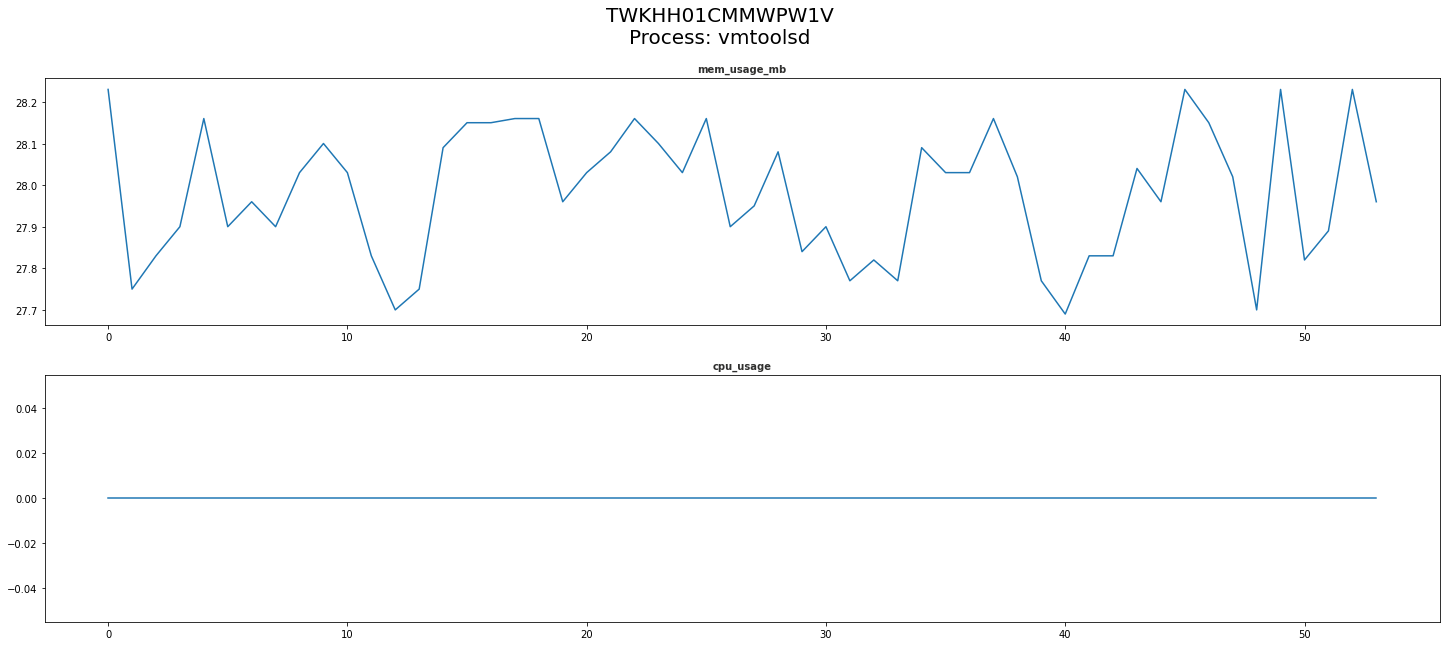

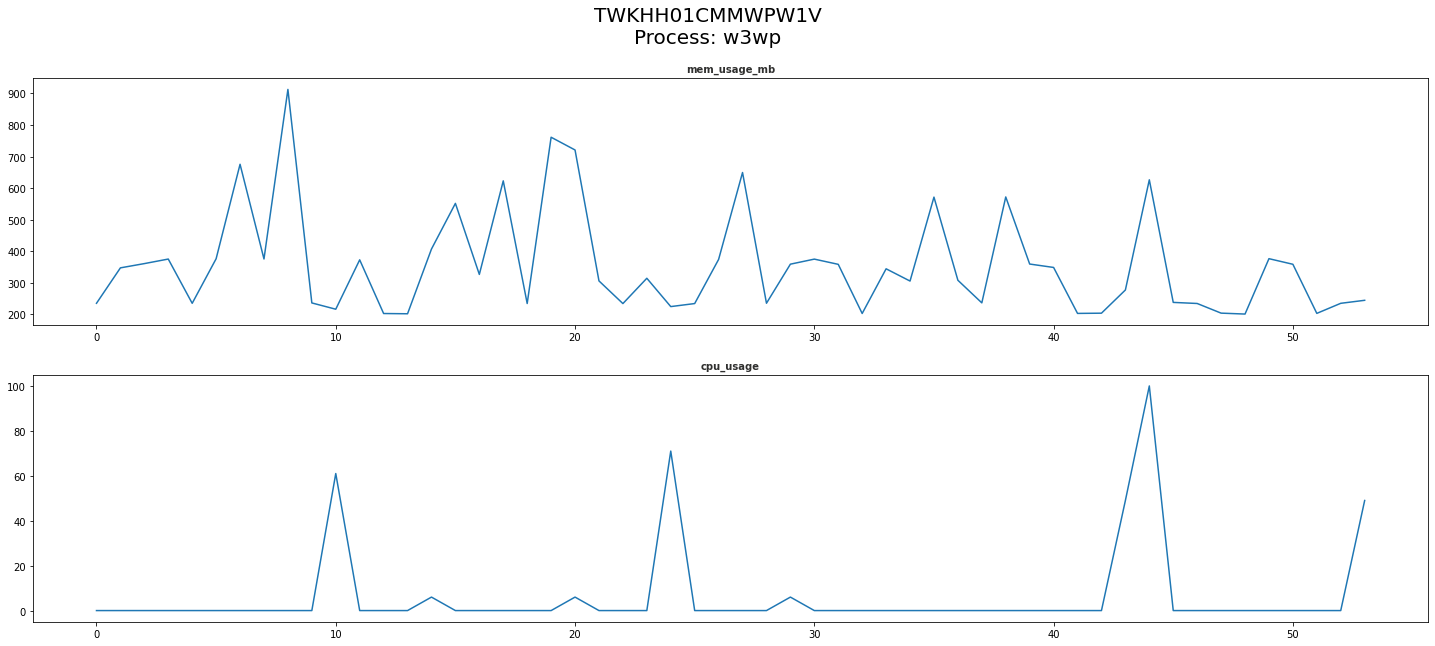

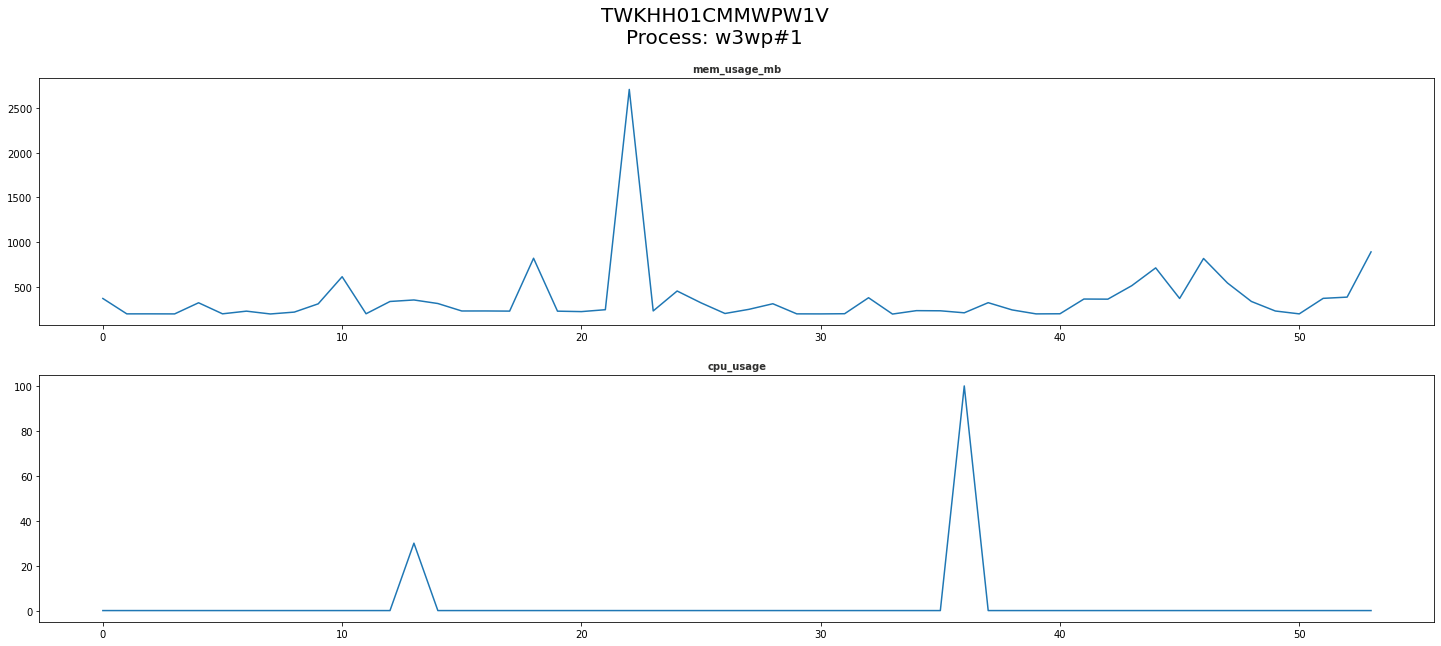

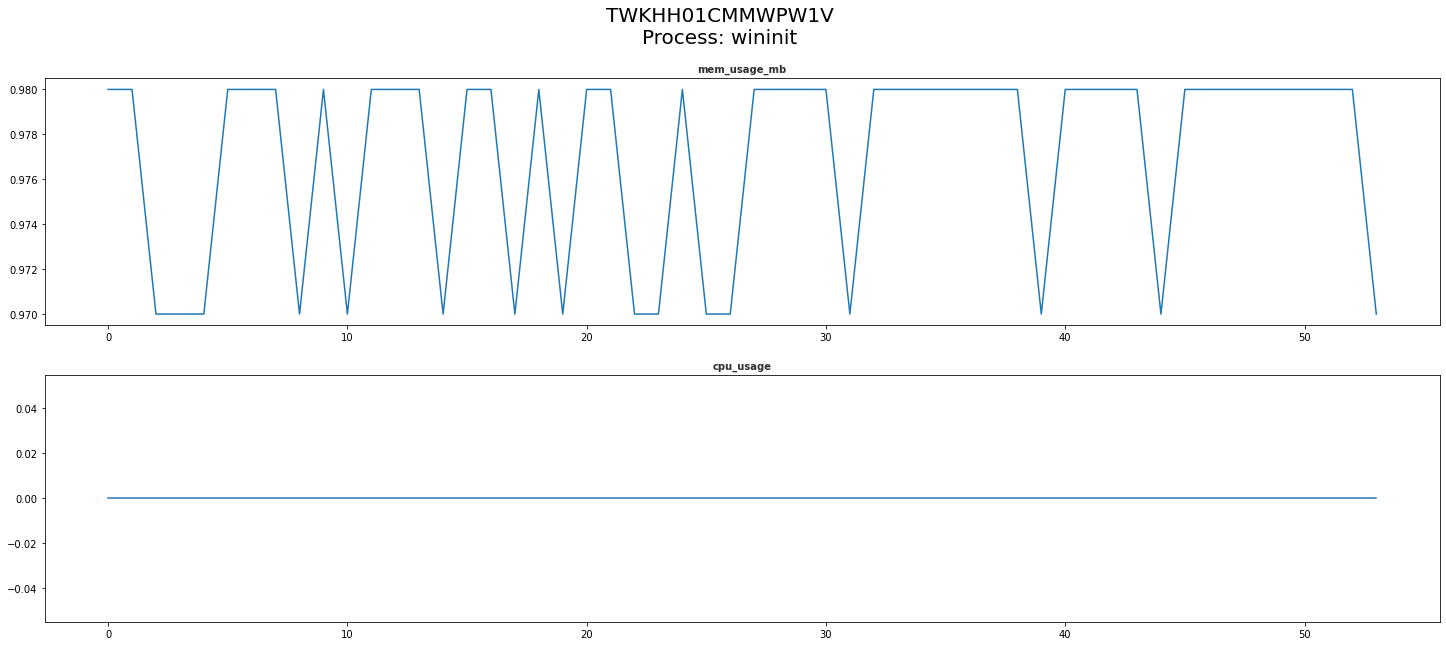

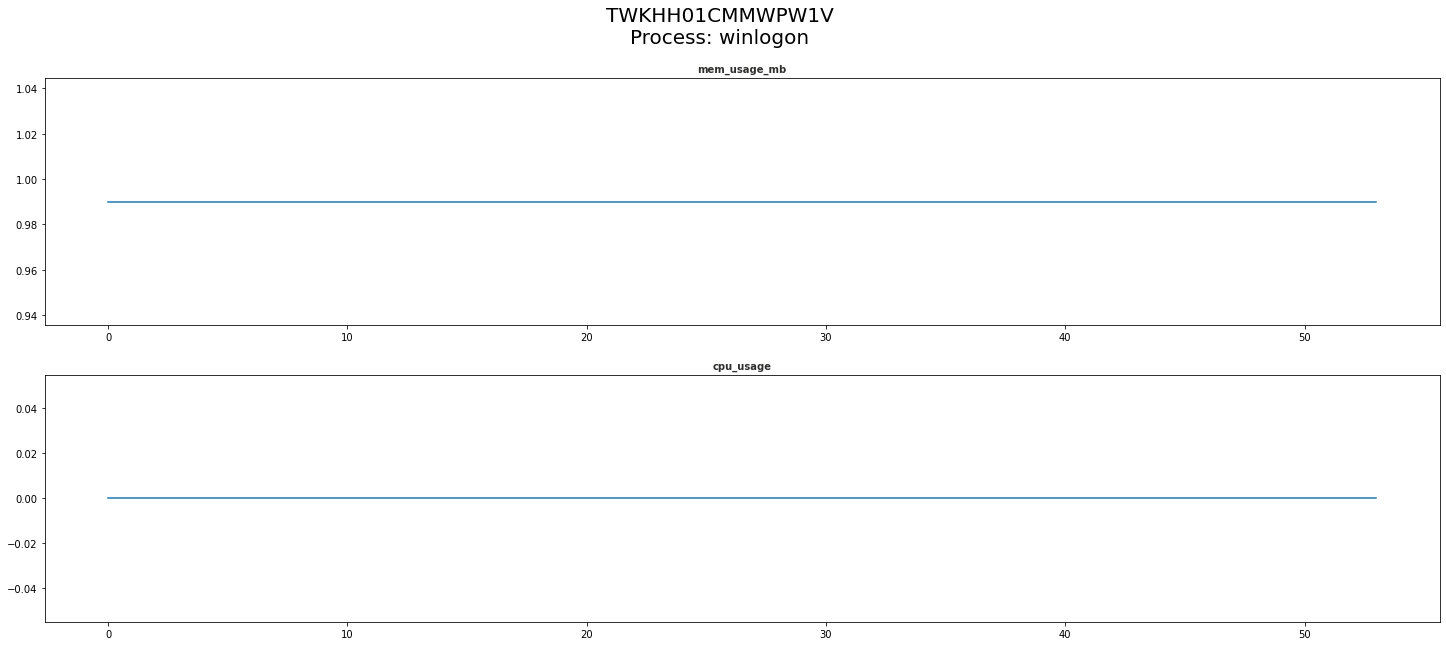

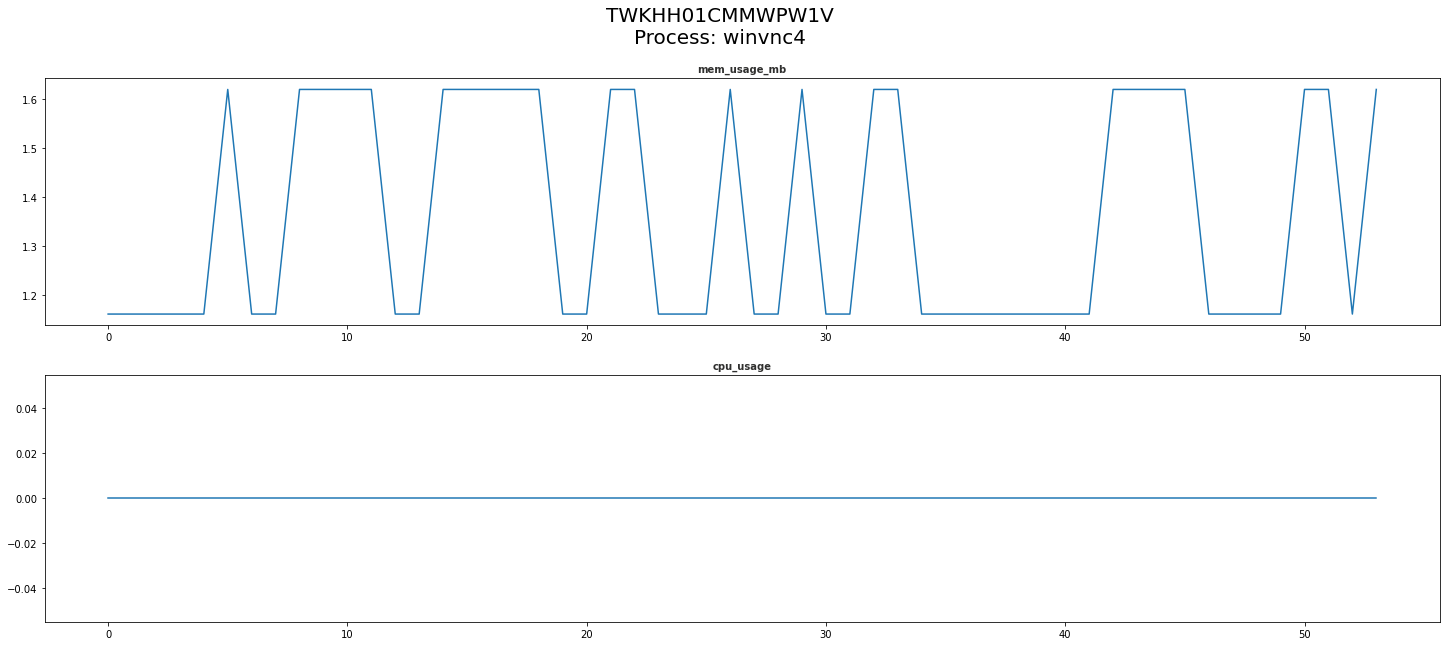

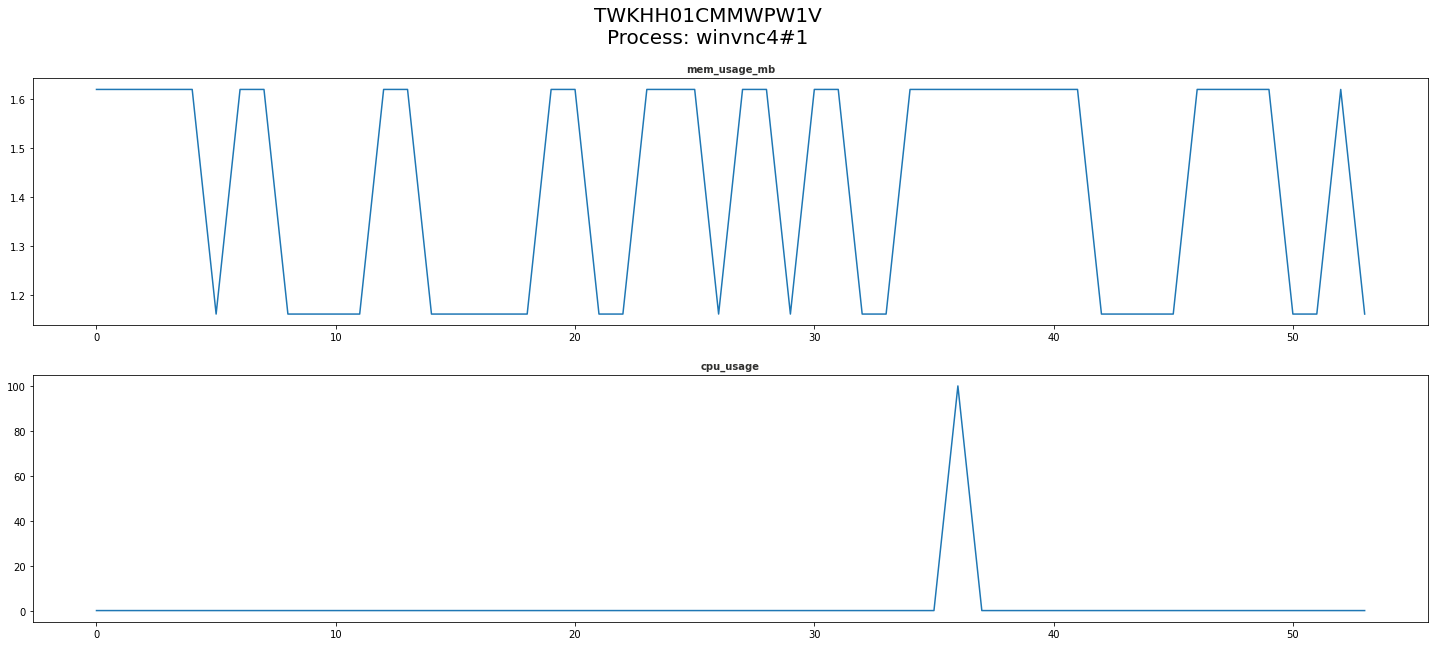

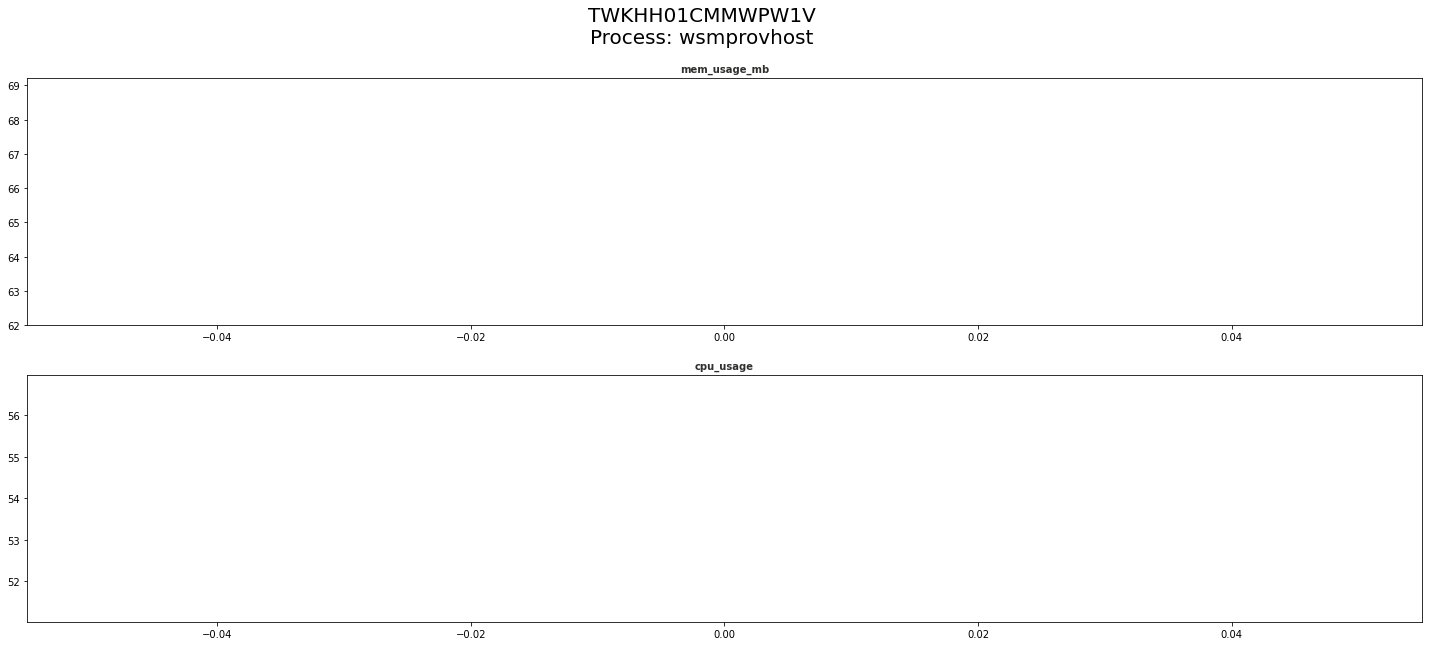

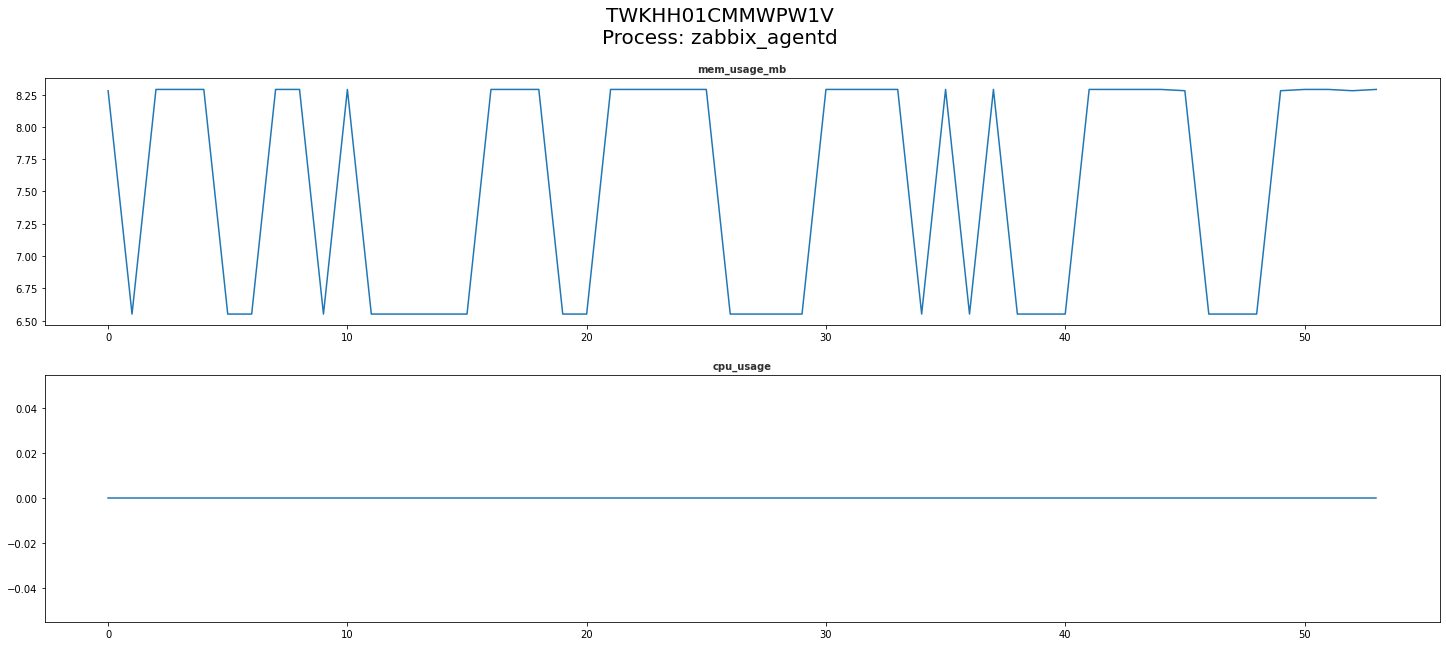

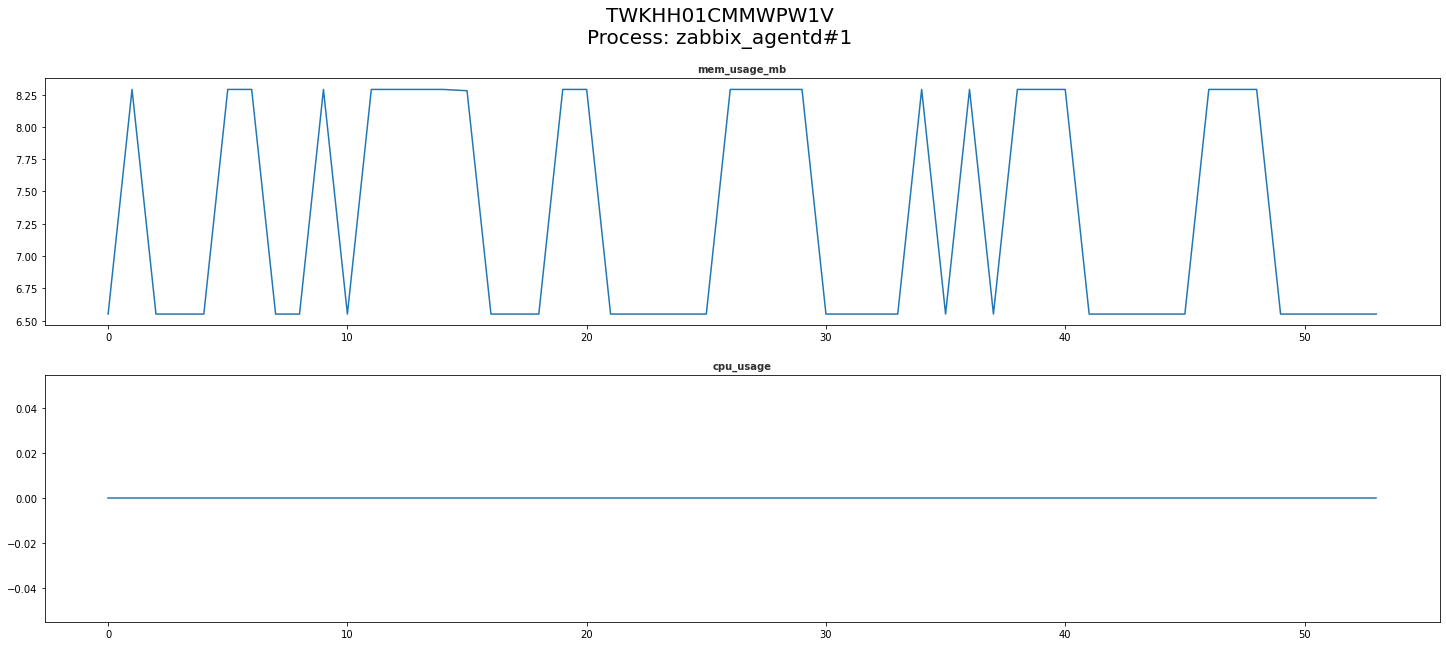

In [111]:
df_1V = df[df["machinename"]=="TWKHH01CMMWPW1V"].dropna()
res = df_1V.pivot_table(columns=['process'], aggfunc='size')
for i in res.index:
    col = -2
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(25,10))
    #plt.title(i)  
    #fig.figure()
    for f,ax in enumerate(axes.flatten(), start=1):
        
        # ax.title.set_text(f'Plot #{i}')
        ax.plot(df_1V[df_1V["process"]==i].iloc[:,col].values)
        ax.set_title(df_1V.columns[col], fontsize=10, fontweight='bold',
                     color='#30302f', loc='center')
        
        col += 1
        
    
    #plt.tight_layout()
    #plt.show()
    fig.suptitle("TWKHH01CMMWPW1V"+"\nProcess: "+i, fontsize=20)
    plt.savefig("./Dataset/MES_data_0408/process_usage/{}.jpg".format(i))
    
    
    """
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.title.set_text("Memory Usage")
    ax1.plot(df_1V[df_1V["process"]==i].iloc[:,-2])
    plt.xticks(rotation=30)
    ax2.title.set_text("Cpu Usage")
    ax2.plot(df_1V[df_1V["process"]==i].iloc[:,-1])
    plt.xticks(rotation=30)
    
    plt.title(i)
    plt.show()
    plt.savefig("./Dataset/MES_data_0408/process_usage/{}.jpg".format(i))
    """
#df_1V
#df_1V[df_1V["process"]=="Automate Schedule Agent Process"]
#res = df_1V.pivot_table(columns=['process'], aggfunc='size')
#res

In [34]:
import pandas as pd
import numpy as np
import glob


DataSet_path = "./Dataset/MES_data_0408/*.xlsx"
excel_data = glob.glob(DataSet_path)

#timewritten
#timegenerated
df = pd.read_excel(excel_data[0],index_col="timegenerated")
#res = df.pivot_table(columns=['process'], aggfunc='size')
#df[df["entrytype"] == "Warning"]["message"]
df

eventid      machinename           data   index category  \
timegenerated                                                                   
2022-04-06 23:50:28    16969  TWKHH01CMWAPW1v  System.Byte[]  410879      (0)   
2022-04-06 23:50:02    10016  TWKHH01CMWAPW1v  System.Byte[]  410878      (0)   
2022-04-06 23:40:02    10016  TWKHH01CMWAPW1v  System.Byte[]  410874      (0)   
2022-04-06 23:30:02    10016  TWKHH01CMWAPW1v  System.Byte[]  410870      (0)   
2022-04-06 23:20:02    10016  TWKHH01CMWAPW1v  System.Byte[]  410869      (0)   
...                      ...              ...            ...     ...      ...   
2022-04-06 00:00:02    10016  TWKHH01CMWAPW8v  System.Byte[]  394557      (0)   
2022-04-06 07:47:16       64  TWKHH01CMWAPW8v  System.Byte[]  135357      (0)   
2022-04-06 07:47:16       64  TWKHH01CMWAPW8v  System.Byte[]  135356      (0)   
2022-04-06 07:47:16       64  TWKHH01CMWAPW8v  System.Byte[]  135355      (0)   
2022-04-06 05:01:20     1008  TWKHH01CMWAPW8v  System.Byte[]  135335      (0)   

                     categorynumber entrytype  \
timegenerated                                   
2022-04-06 23:50:28               0   Warning   
2022-04-06 23:50:02               0     Error   
2022-04-06 23:40:02               0     Error   
2022-04-06 23:30:02               0     Error   
2022-04-06 23:20:02               0     Error   
...                             ...       ...   
2022-04-06 00:00:02               0     Error   
2022-04-06 07:47:16               0   Warning   
2022-04-06 07:47:16               0   Warning   
2022-04-06 07:47:16               0   Warning   
2022-04-06 05:01:20               0     Error   

                                                               message  \
timegenerated                                                            
2022-04-06 23:50:28  1 remote calls to the SAM database have been d...   
2022-04-06 23:50:02  The description for Event ID "10016" in Source...   
2022-04-06 23:40:02  The description for Event ID "10016" in Source...   
2022-04-06 23:30:02  The description for Event ID "10016" in Source...   
2022-04-06 23:20:02  The description for Event ID "10016" in Source...   
...                                                                ...   
2022-04-06 00:00:02  The description for Event ID "10016" in Source...   
2022-04-06 07:47:16  The description for Event ID "-2147483584" in ...   
2022-04-06 07:47:16  The description for Event ID "-2147483584" in ...   
2022-04-06 07:47:16  The description for Event ID "-2147483584" in ...   
2022-04-06 05:01:20  The description for Event ID "-1073740816" in ...   

                                                       source  \
timegenerated                                                   
2022-04-06 23:50:28  Microsoft-Windows-Directory-Services-SAM   
2022-04-06 23:50:02                                      DCOM   
2022-04-06 23:40:02                                      DCOM   
2022-04-06 23:30:02                                      DCOM   
2022-04-06 23:20:02                                      DCOM   
...                                                       ...   
2022-04-06 00:00:02                                      DCOM   
2022-04-06 07:47:16                            AutoEnrollment   
2022-04-06 07:47:16                            AutoEnrollment   
2022-04-06 07:47:16                            AutoEnrollment   
2022-04-06 05:01:20                                   Perflib   

                                                    replacementstrings  \
timegenerated                                                            
2022-04-06 23:50:28                                              900 1   
2022-04-06 23:50:02  application-specific Local Activation {D63B10C...   
2022-04-06 23:40:02  application-specific Local Activation {D63B10C...   
2022-04-06 23:30:02  application-specific Local Activation {D63B10C...   
2022-04-06 23:20:02  application-specific Local Activation {D63B10C...   
..